In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


In [149]:
iso3_dict = {'PLW':'Palau', 'MEX':'Mexico', 'AUS':'Australia', 'FJI':'Fiji', 'NOR':'Norway', 'IDN':'Indonesia', 'JAM':'Jamaica', 'KEN':'Kenya', 'GBR':'United Kingdom',
    'GHA':'Ghana', 'JPN':'Japan', 'CAN':'Canada'}

In [147]:
tsm_files = glob.glob('TSM*.xlsx')
tsm_files

['TSM_seagrass_PLW.xlsx',
 'TSM_seagrass_MEX.xlsx',
 'TSM_seagrass_AUS.xlsx',
 'TSM_seagrass_FJI.xlsx',
 'TSM_seagrass_NOR.xlsx',
 'TSM_seagrass_IDN.xlsx',
 'TSM_seagrass_JAM.xlsx',
 'TSM_seagrass_KEN.xlsx',
 'TSM_seagrass_GBR.xlsx',
 'TSM_seagrass_GHA.xlsx',
 'TSM_seagrass_JPN.xlsx',
 'TSM_seagrass_CAN.xlsx']

Loop through files to generate plots of max TSM value for each year.
Missing GEE index graphs did not have intersecting seagrass polygons and raster data.
Empty graphs at the end of figure are extra graphs when there were not enough regions to fill all subplots.

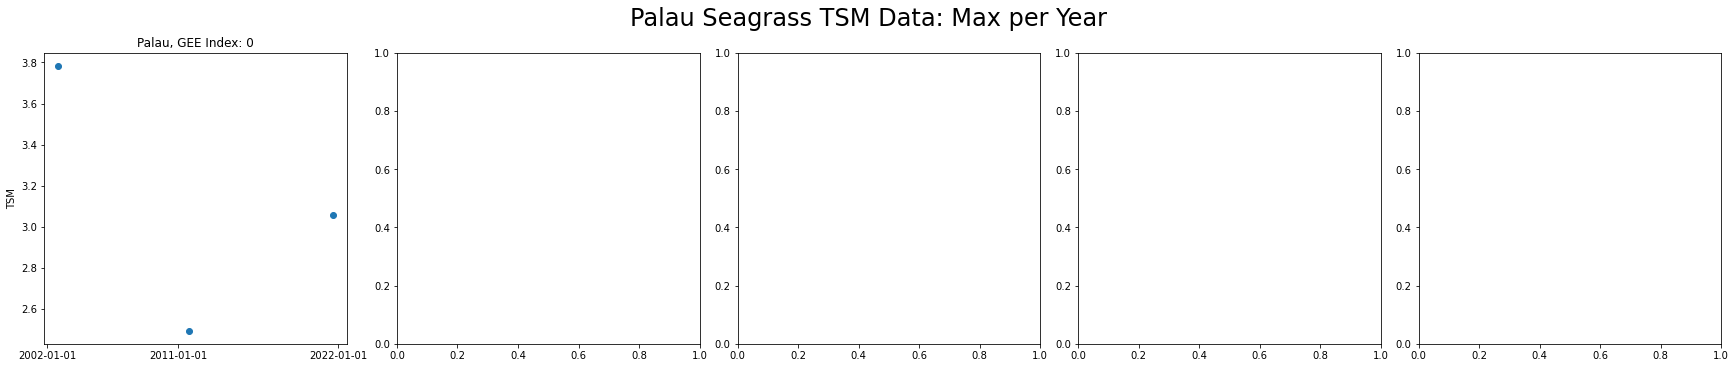

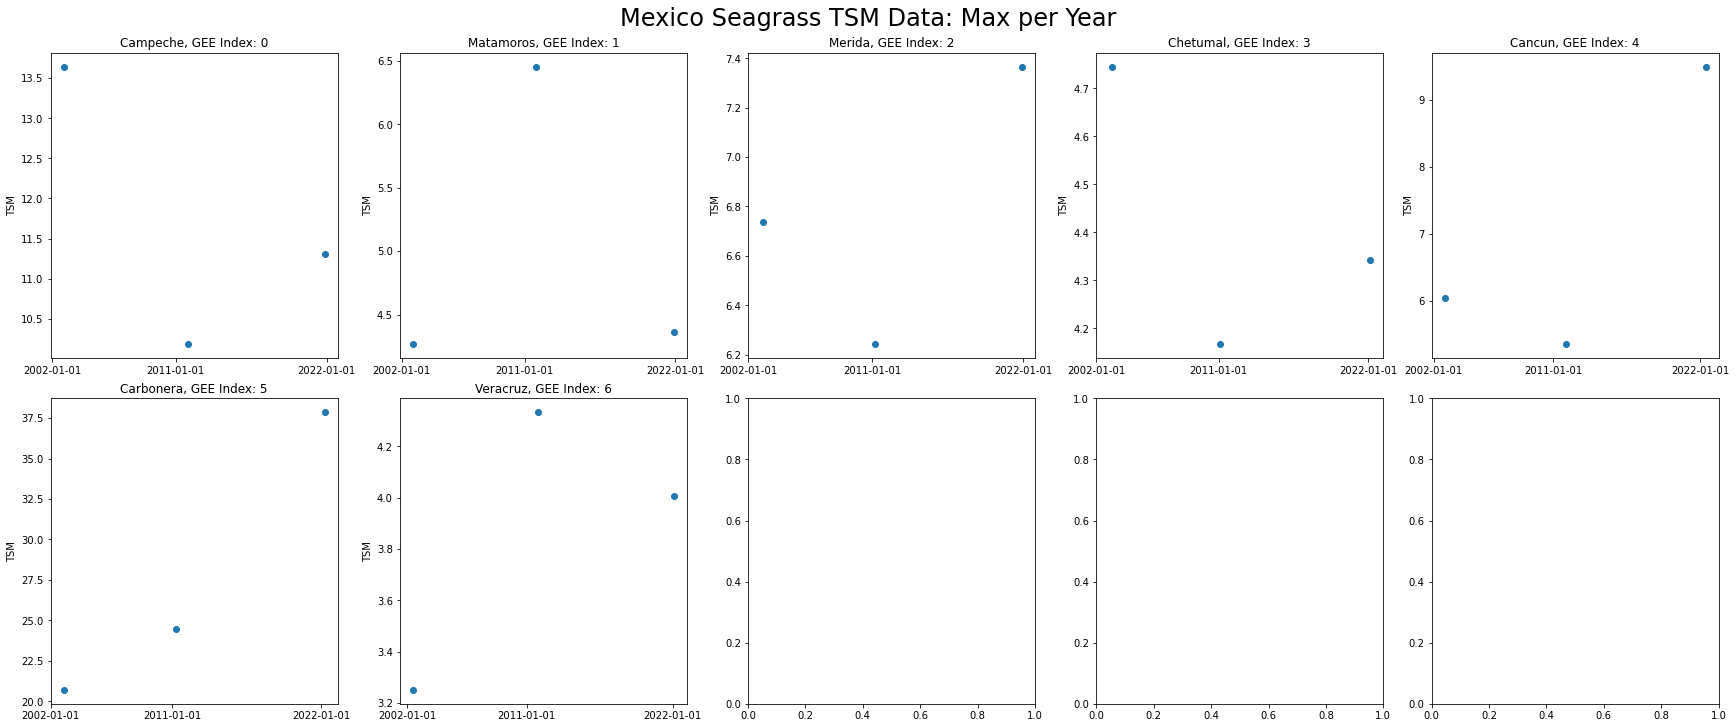

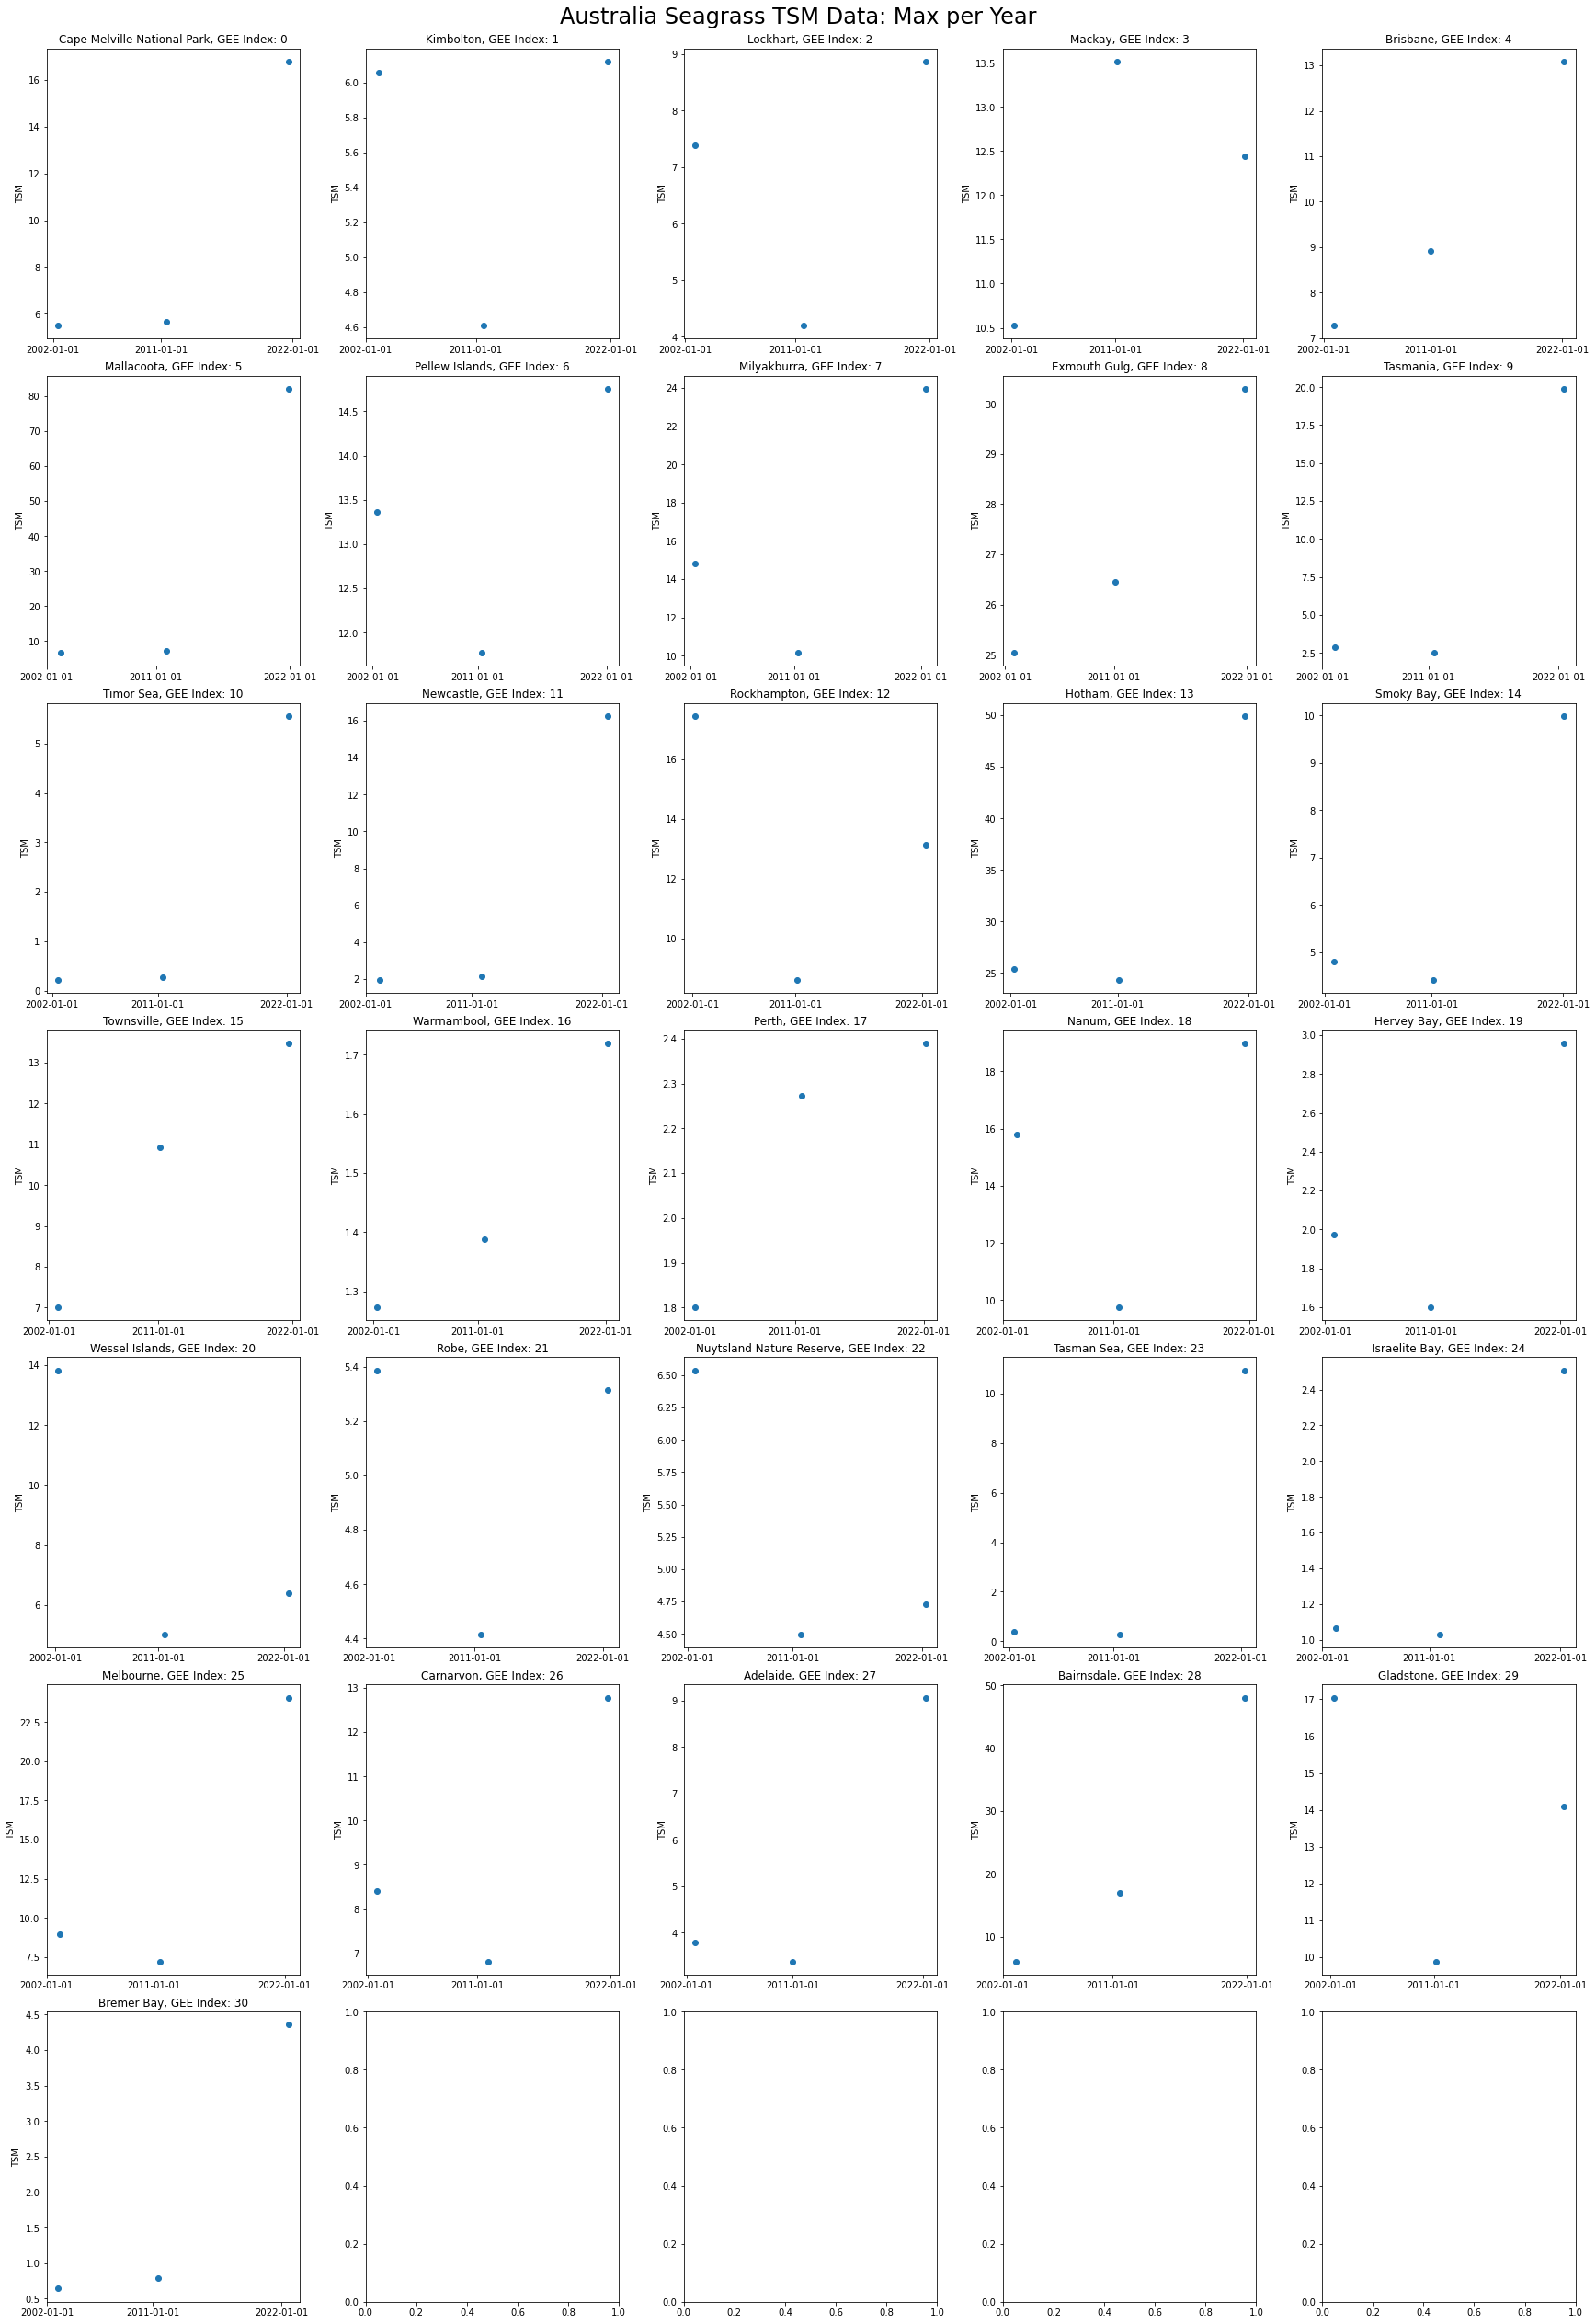

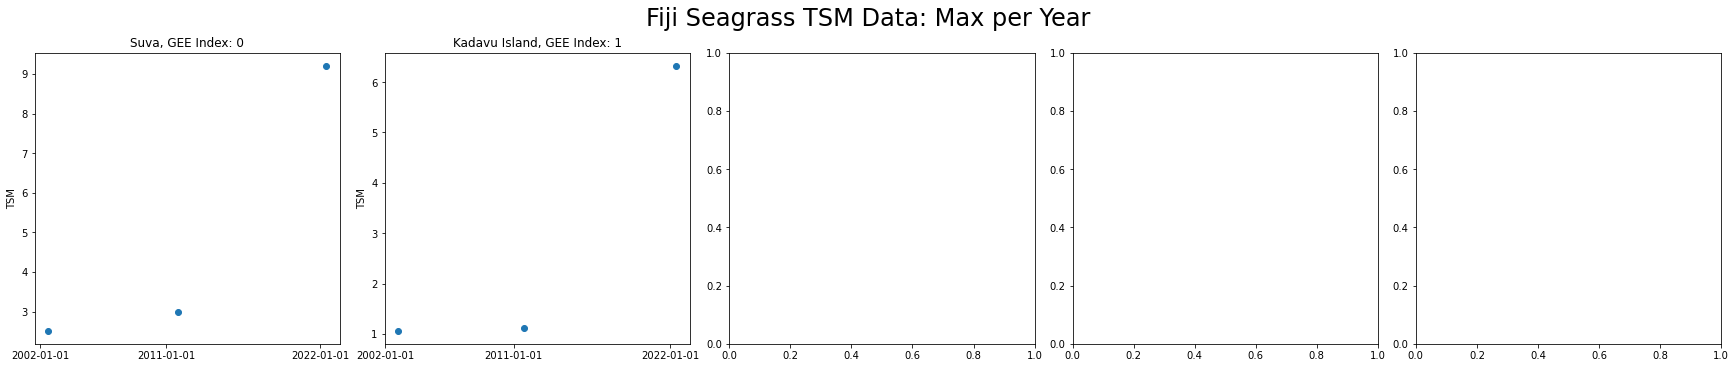

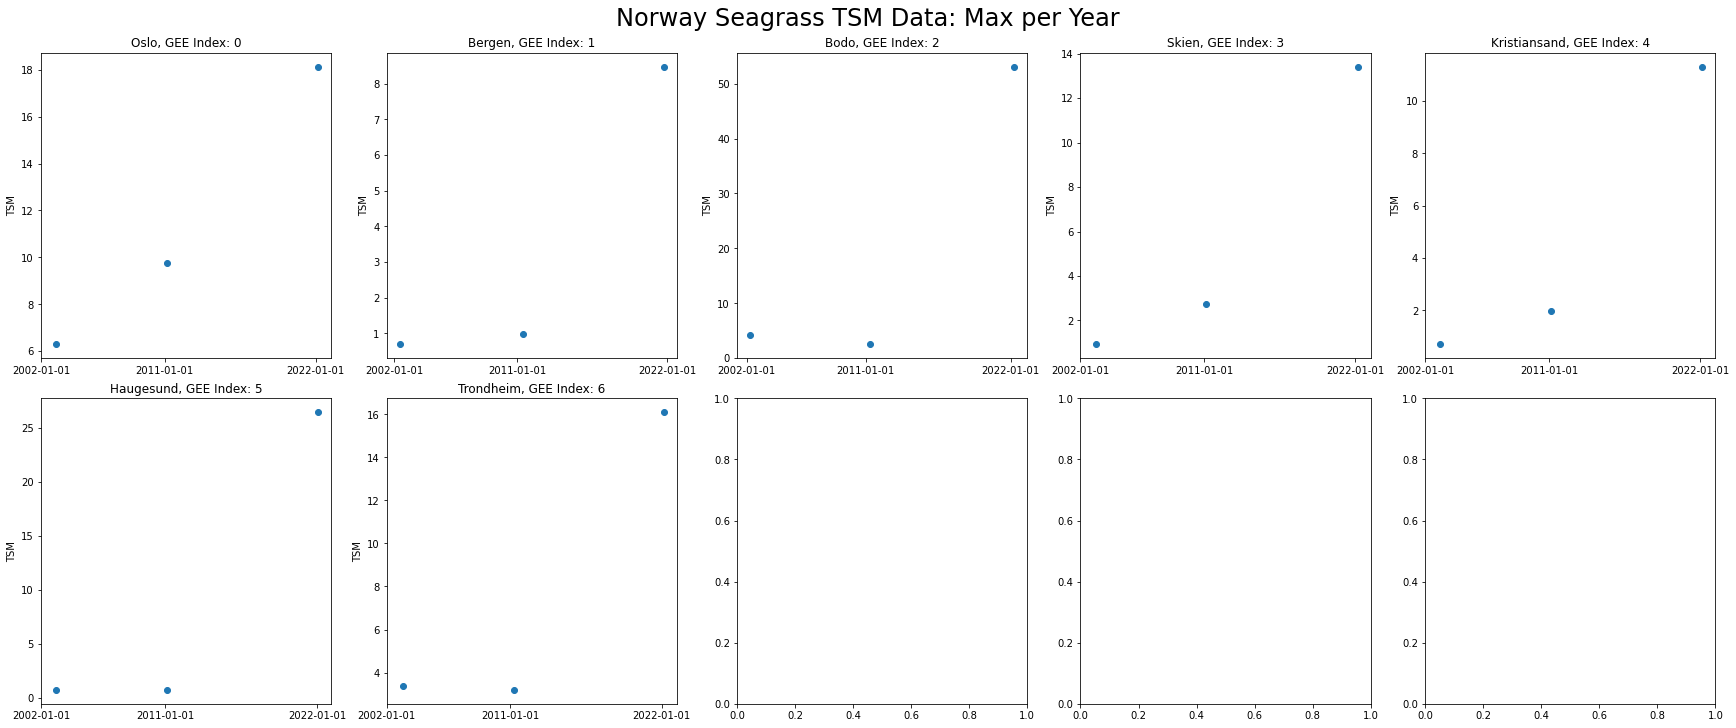

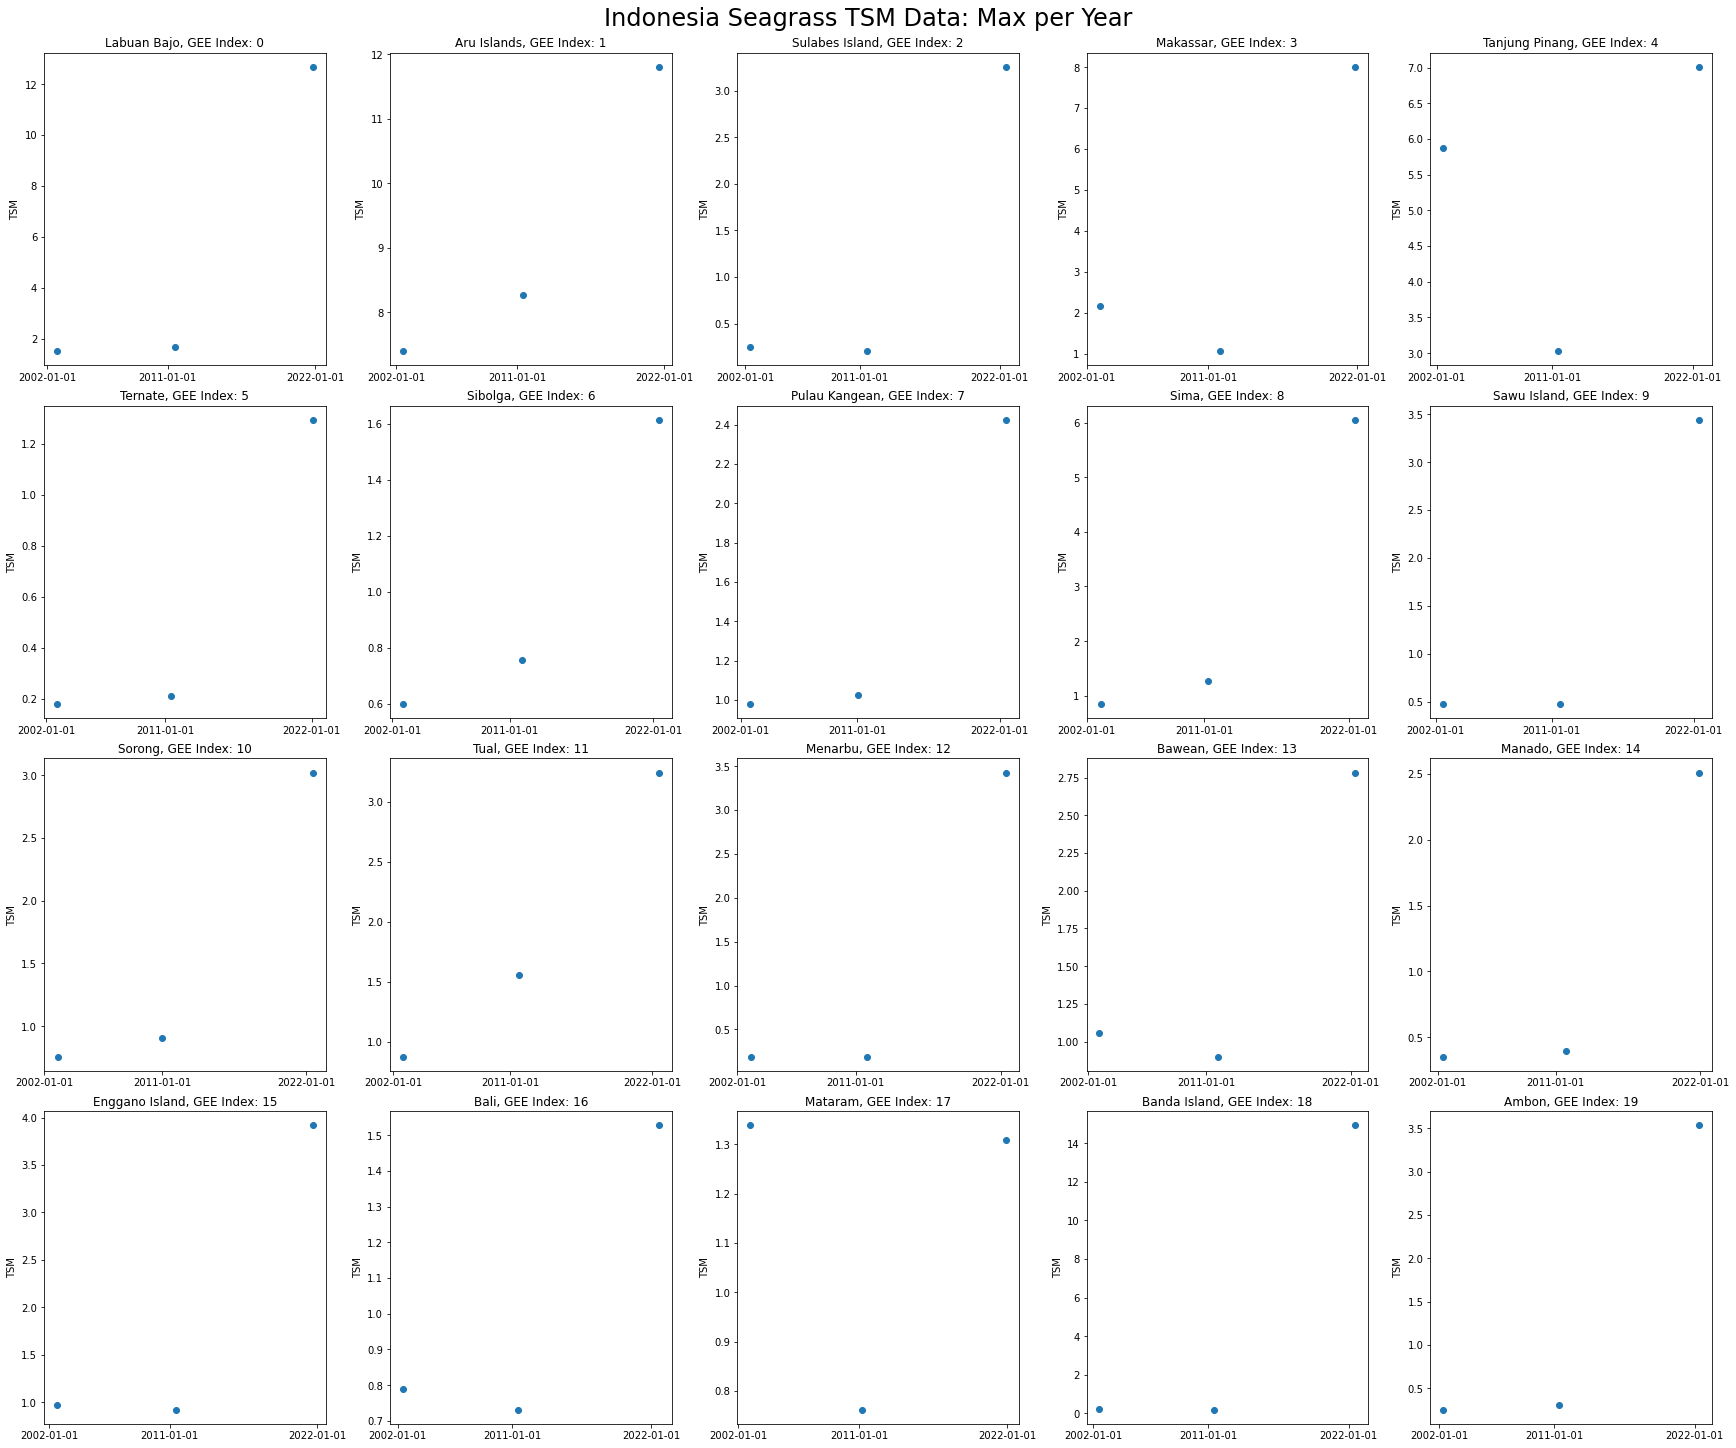

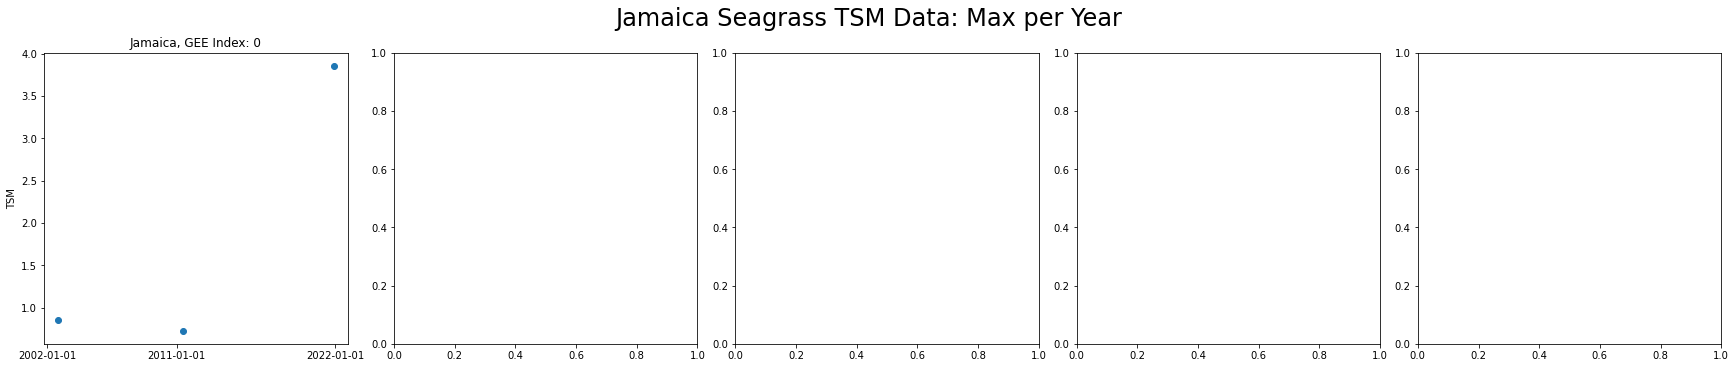

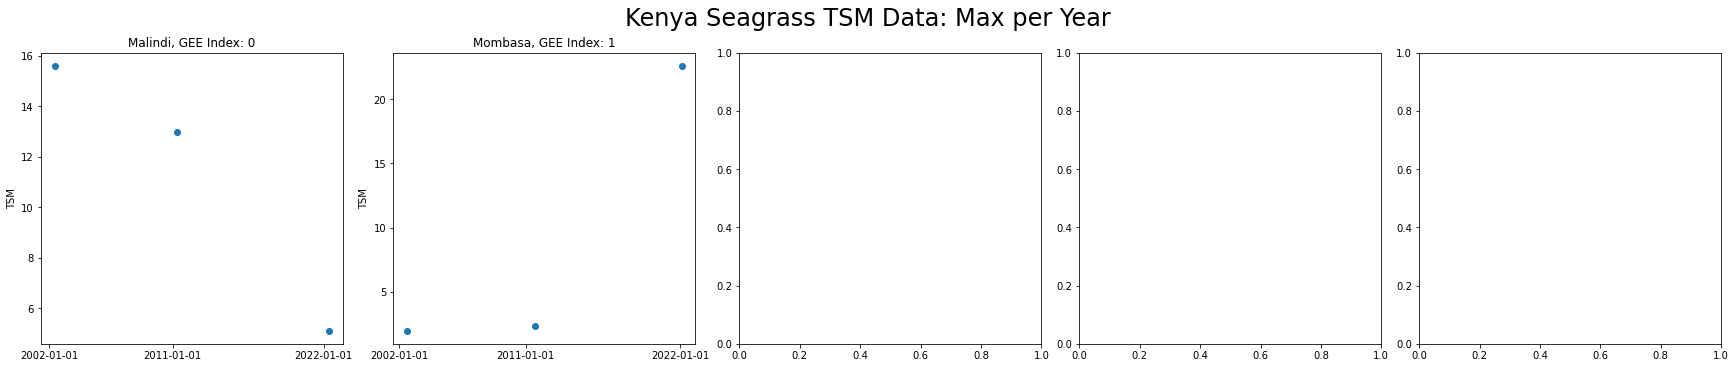

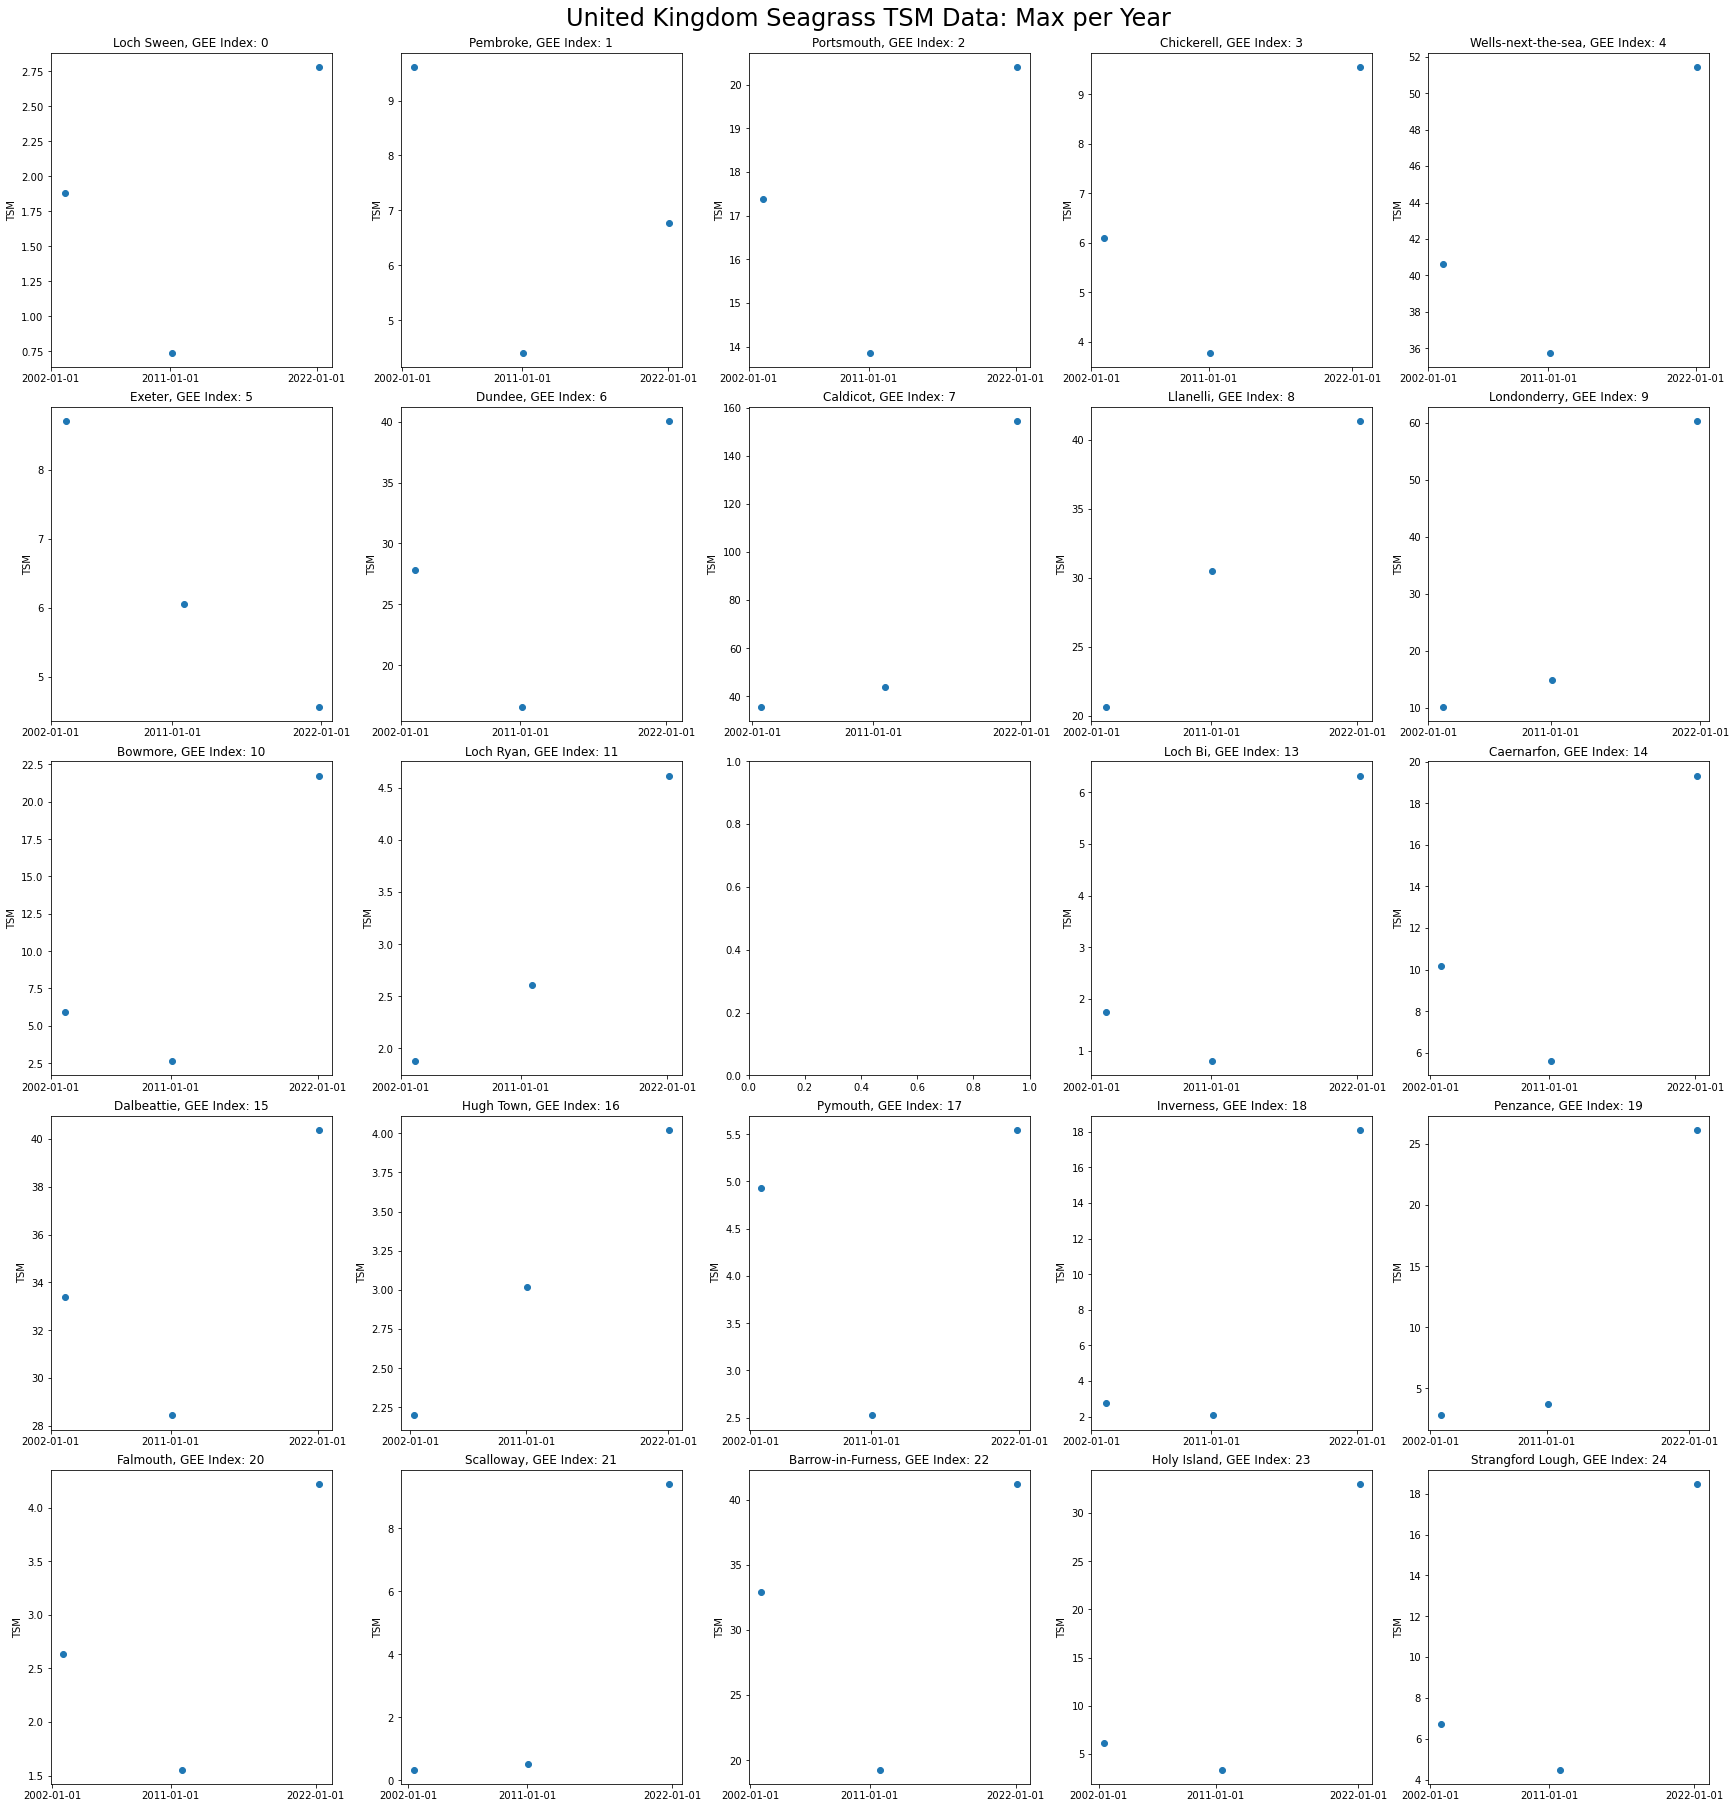

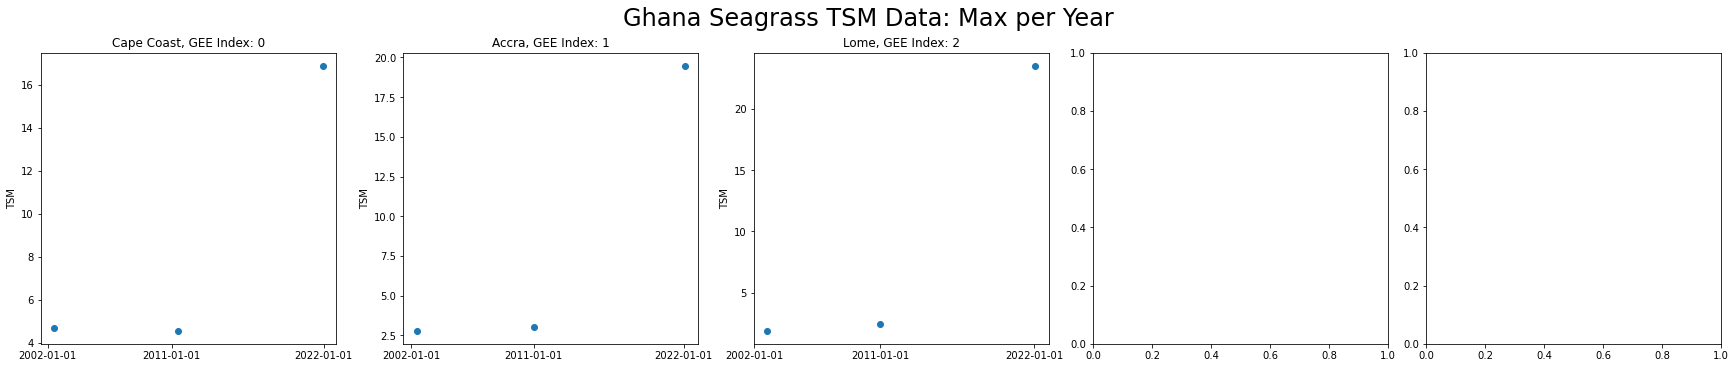

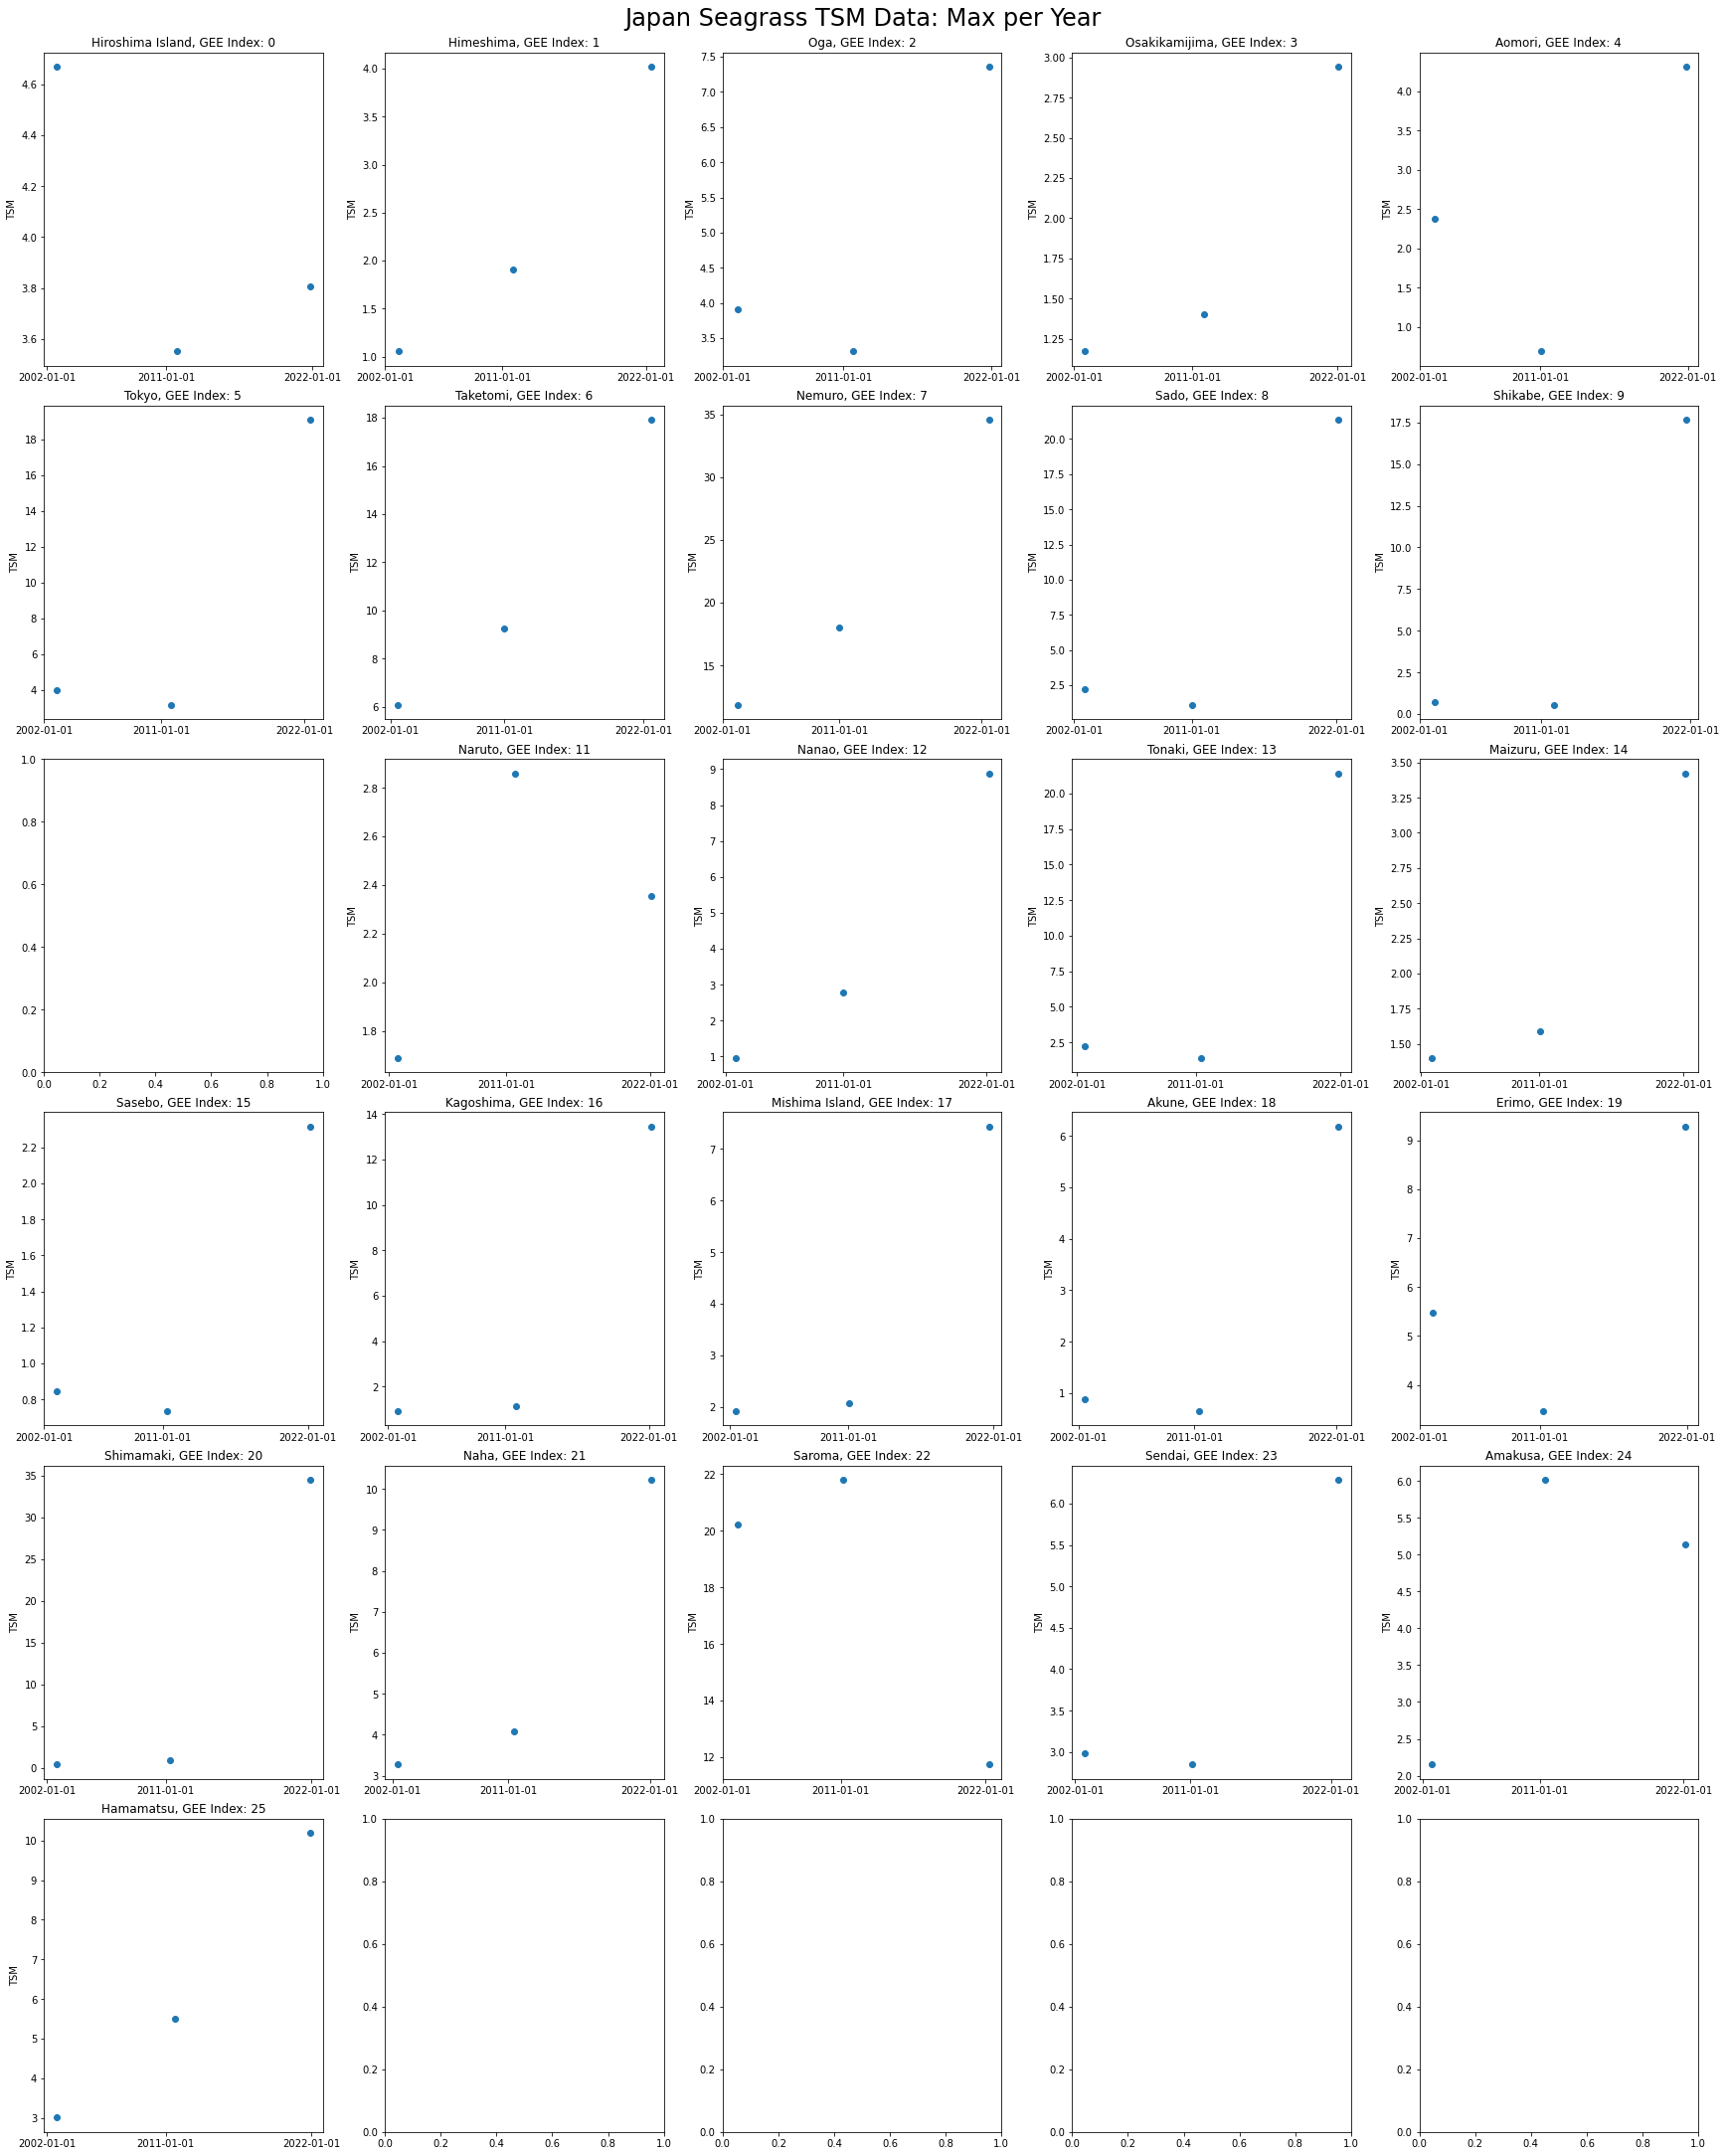

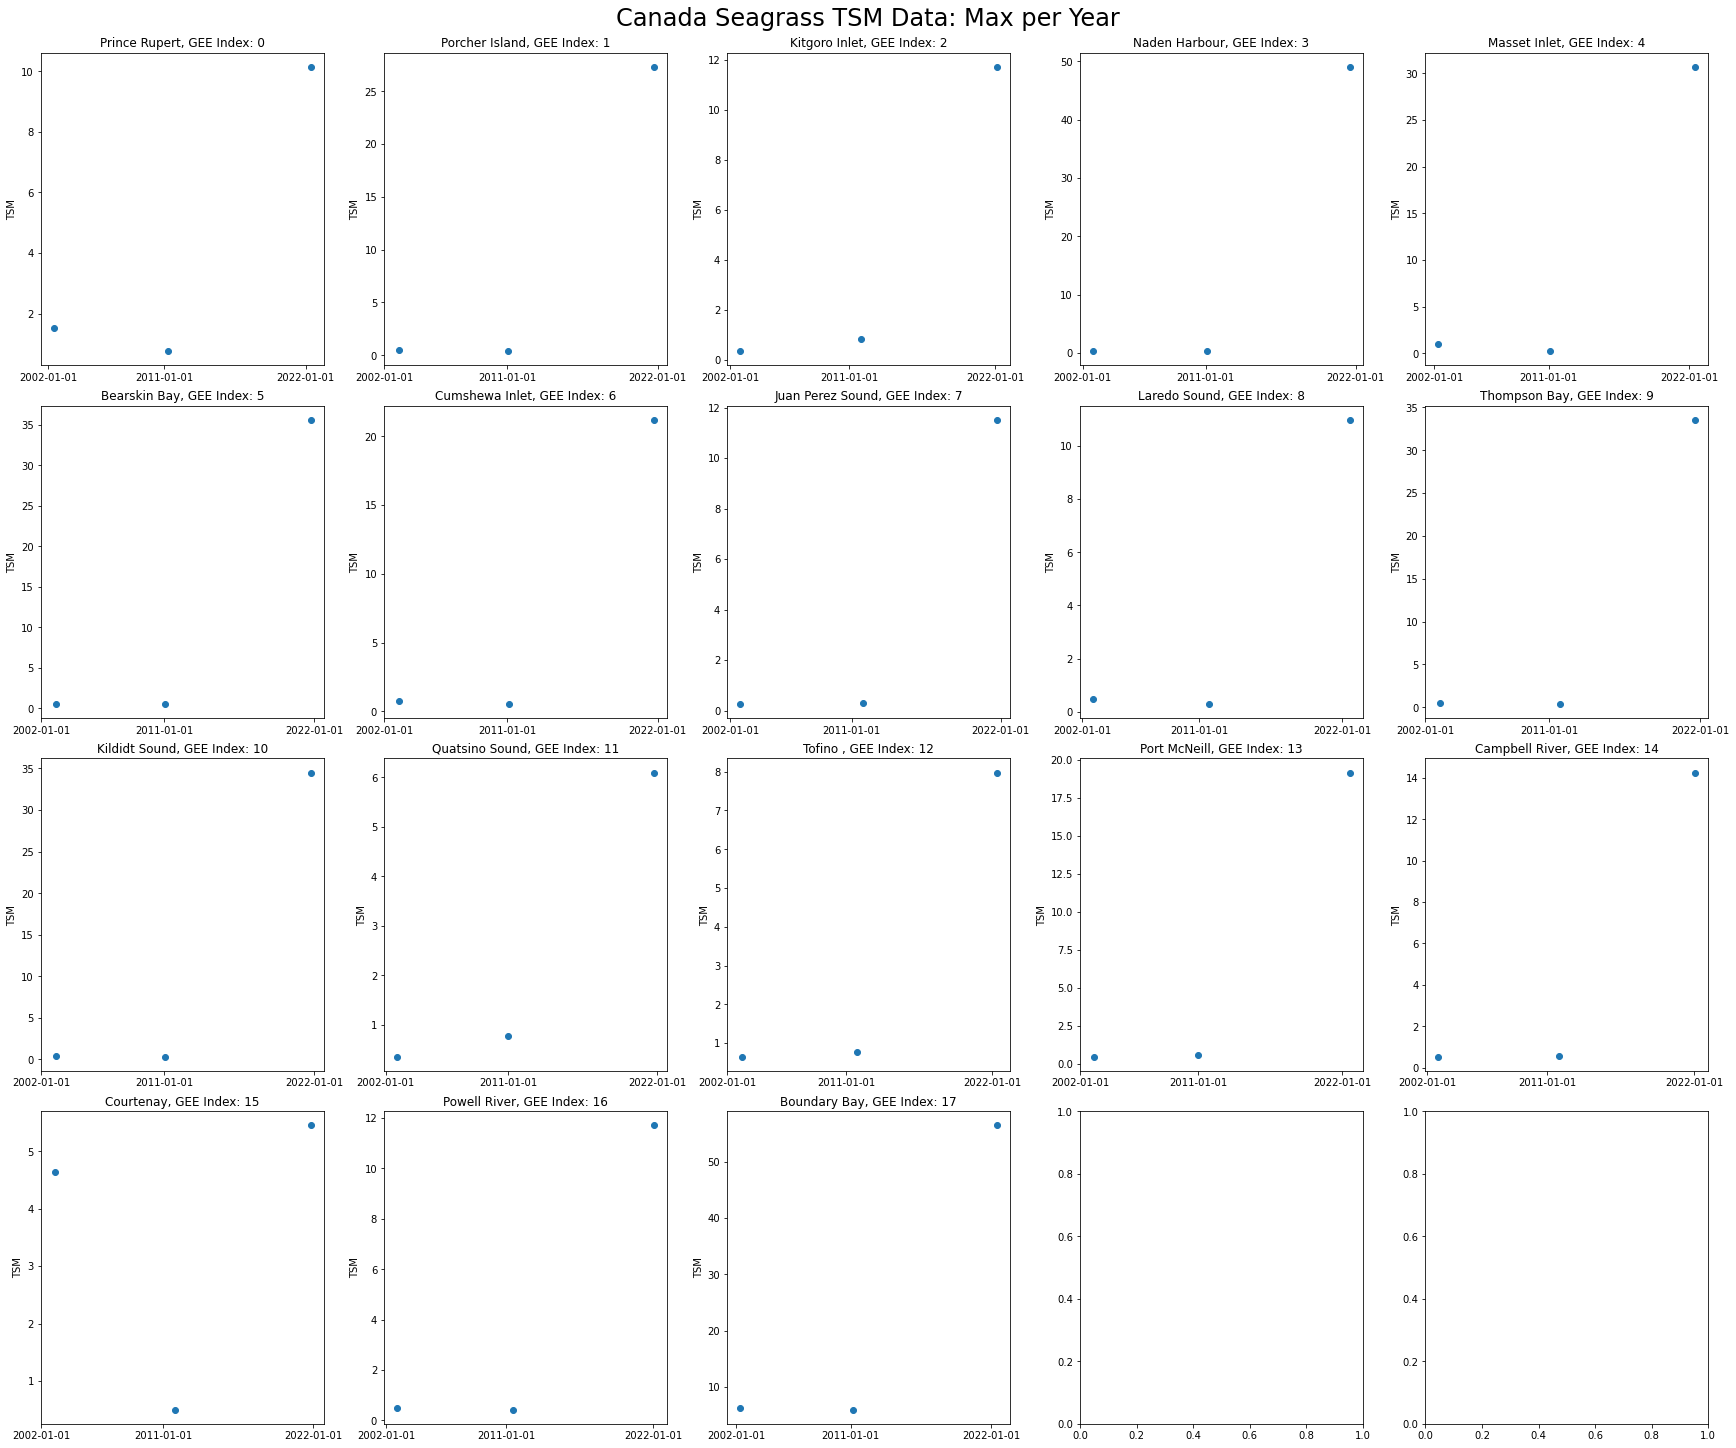

In [154]:
for file in tsm_files:
    country_data = pd.read_excel(file)
    iso3 = file[-8:-5]
    num_regions = len(country_data['GEE_index'].unique())
    rows = num_regions // 5 + (num_regions % 5 > 0)
    fig, axs = plt.subplots(rows,5, constrained_layout=True, facecolor='white')
    fig.suptitle(f'{iso3_dict[iso3]} Seagrass TSM Data: Max per Year', fontsize=24)
    fig.set_figwidth(24)
    fig.set_figheight(5*rows)
    ax1 = 0
    ax2 = -1
    for i in range(num_regions):
        ax2 += 1
        region = country_data[country_data['GEE_index'] == float(i)].sort_values('Date').reset_index()
        x = [region[region['TSM'] == region.iloc[:12]['TSM'].max()]['Date'], region[region['TSM'] == region.iloc[12:24]['TSM'].max()]['Date'], region[region['TSM'] == region.iloc[24:]['TSM'].max()]['Date']]
        y = [region.iloc[:12]['TSM'].max(), region.iloc[12:24]['TSM'].max(), region.iloc[24:]['TSM'].max()]
        region_name = region['Region'].iloc[0]
        if i>0 and i%5 == 0:
            ax1 += 1
            ax2 = 0
        if not np.any(np.isnan(y)):
            if rows == 1:
                axs[ax2].scatter(x,y)
                axs[ax2].set_title(f'{region_name}, GEE Index: {i}')
                axs[ax2].set_xticks(['2002', '2011', '2022'])
                axs[ax2].set_ylabel('TSM')
            else:
                axs[ax1, ax2].scatter(x,y)
                axs[ax1, ax2].set_title(f'{region_name}, GEE Index: {i}')
                axs[ax1, ax2].set_xticks(['2002', '2011', '2022'])
                axs[ax1, ax2].set_ylabel('TSM')
    plt.savefig(f'{iso3}_TSM_Max.png') 
    plt.show()

TSM all data

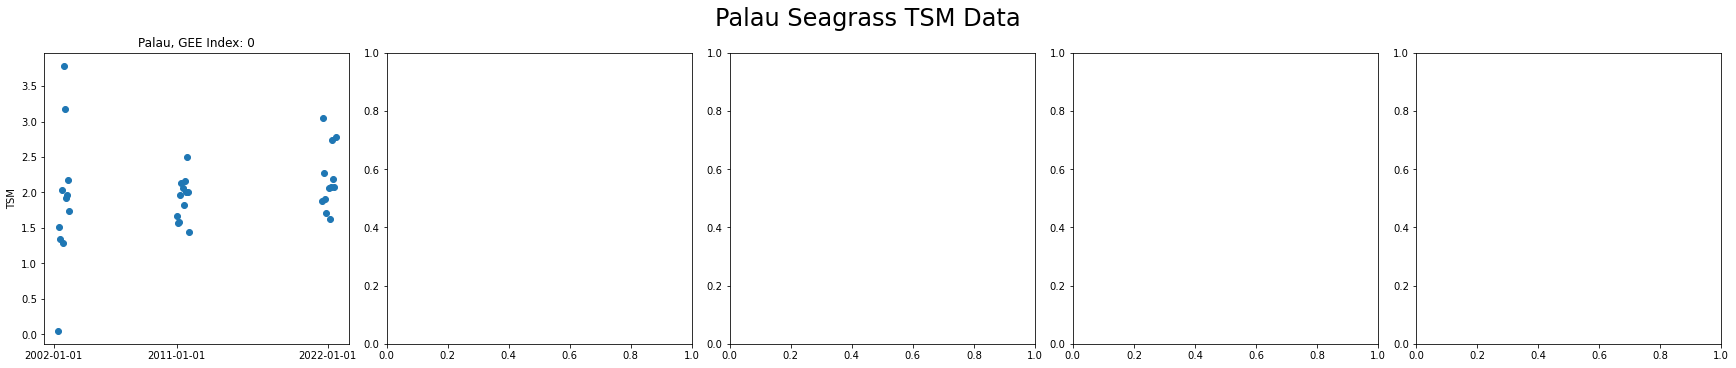

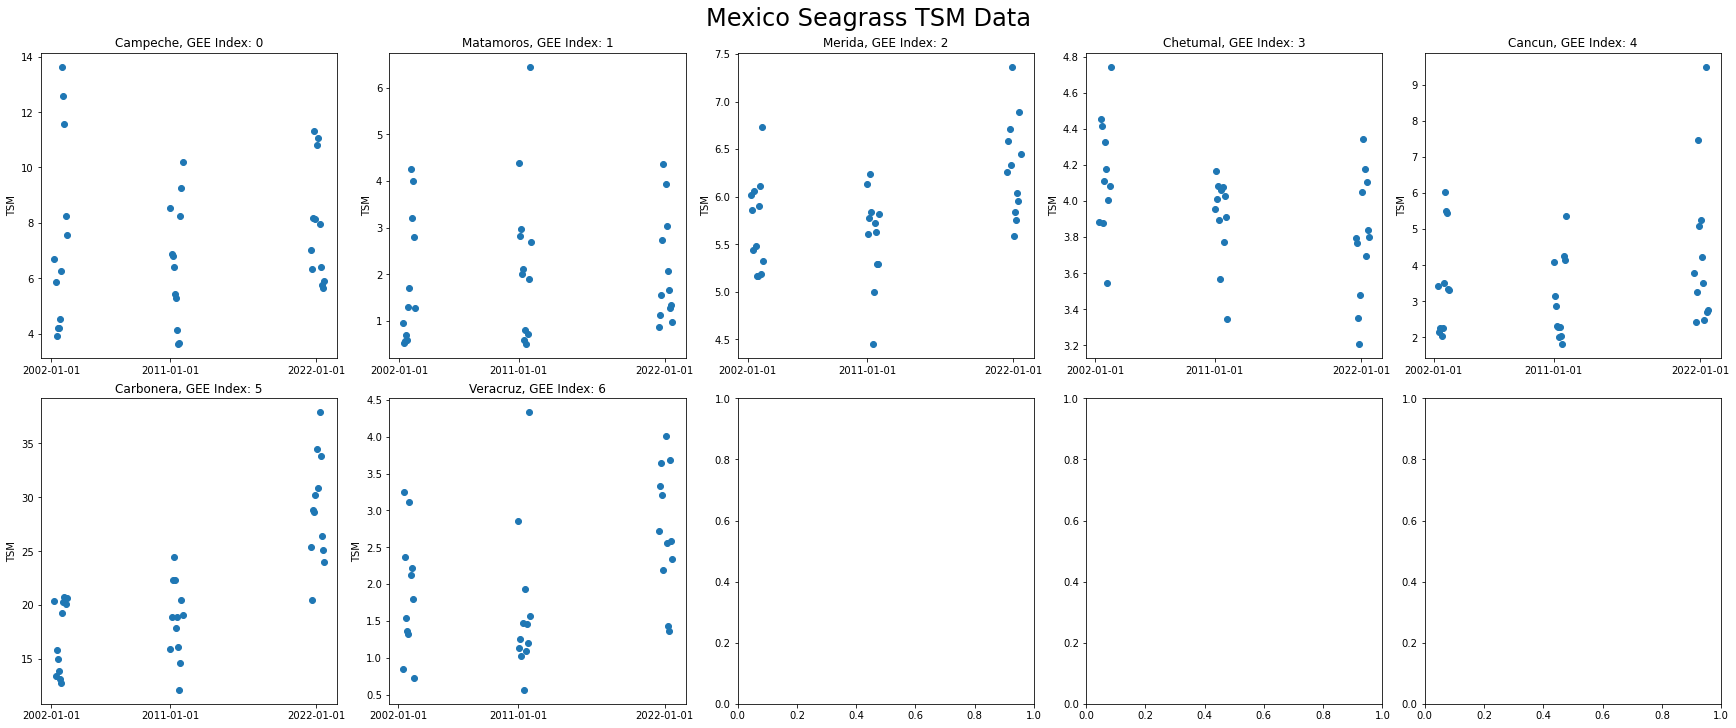

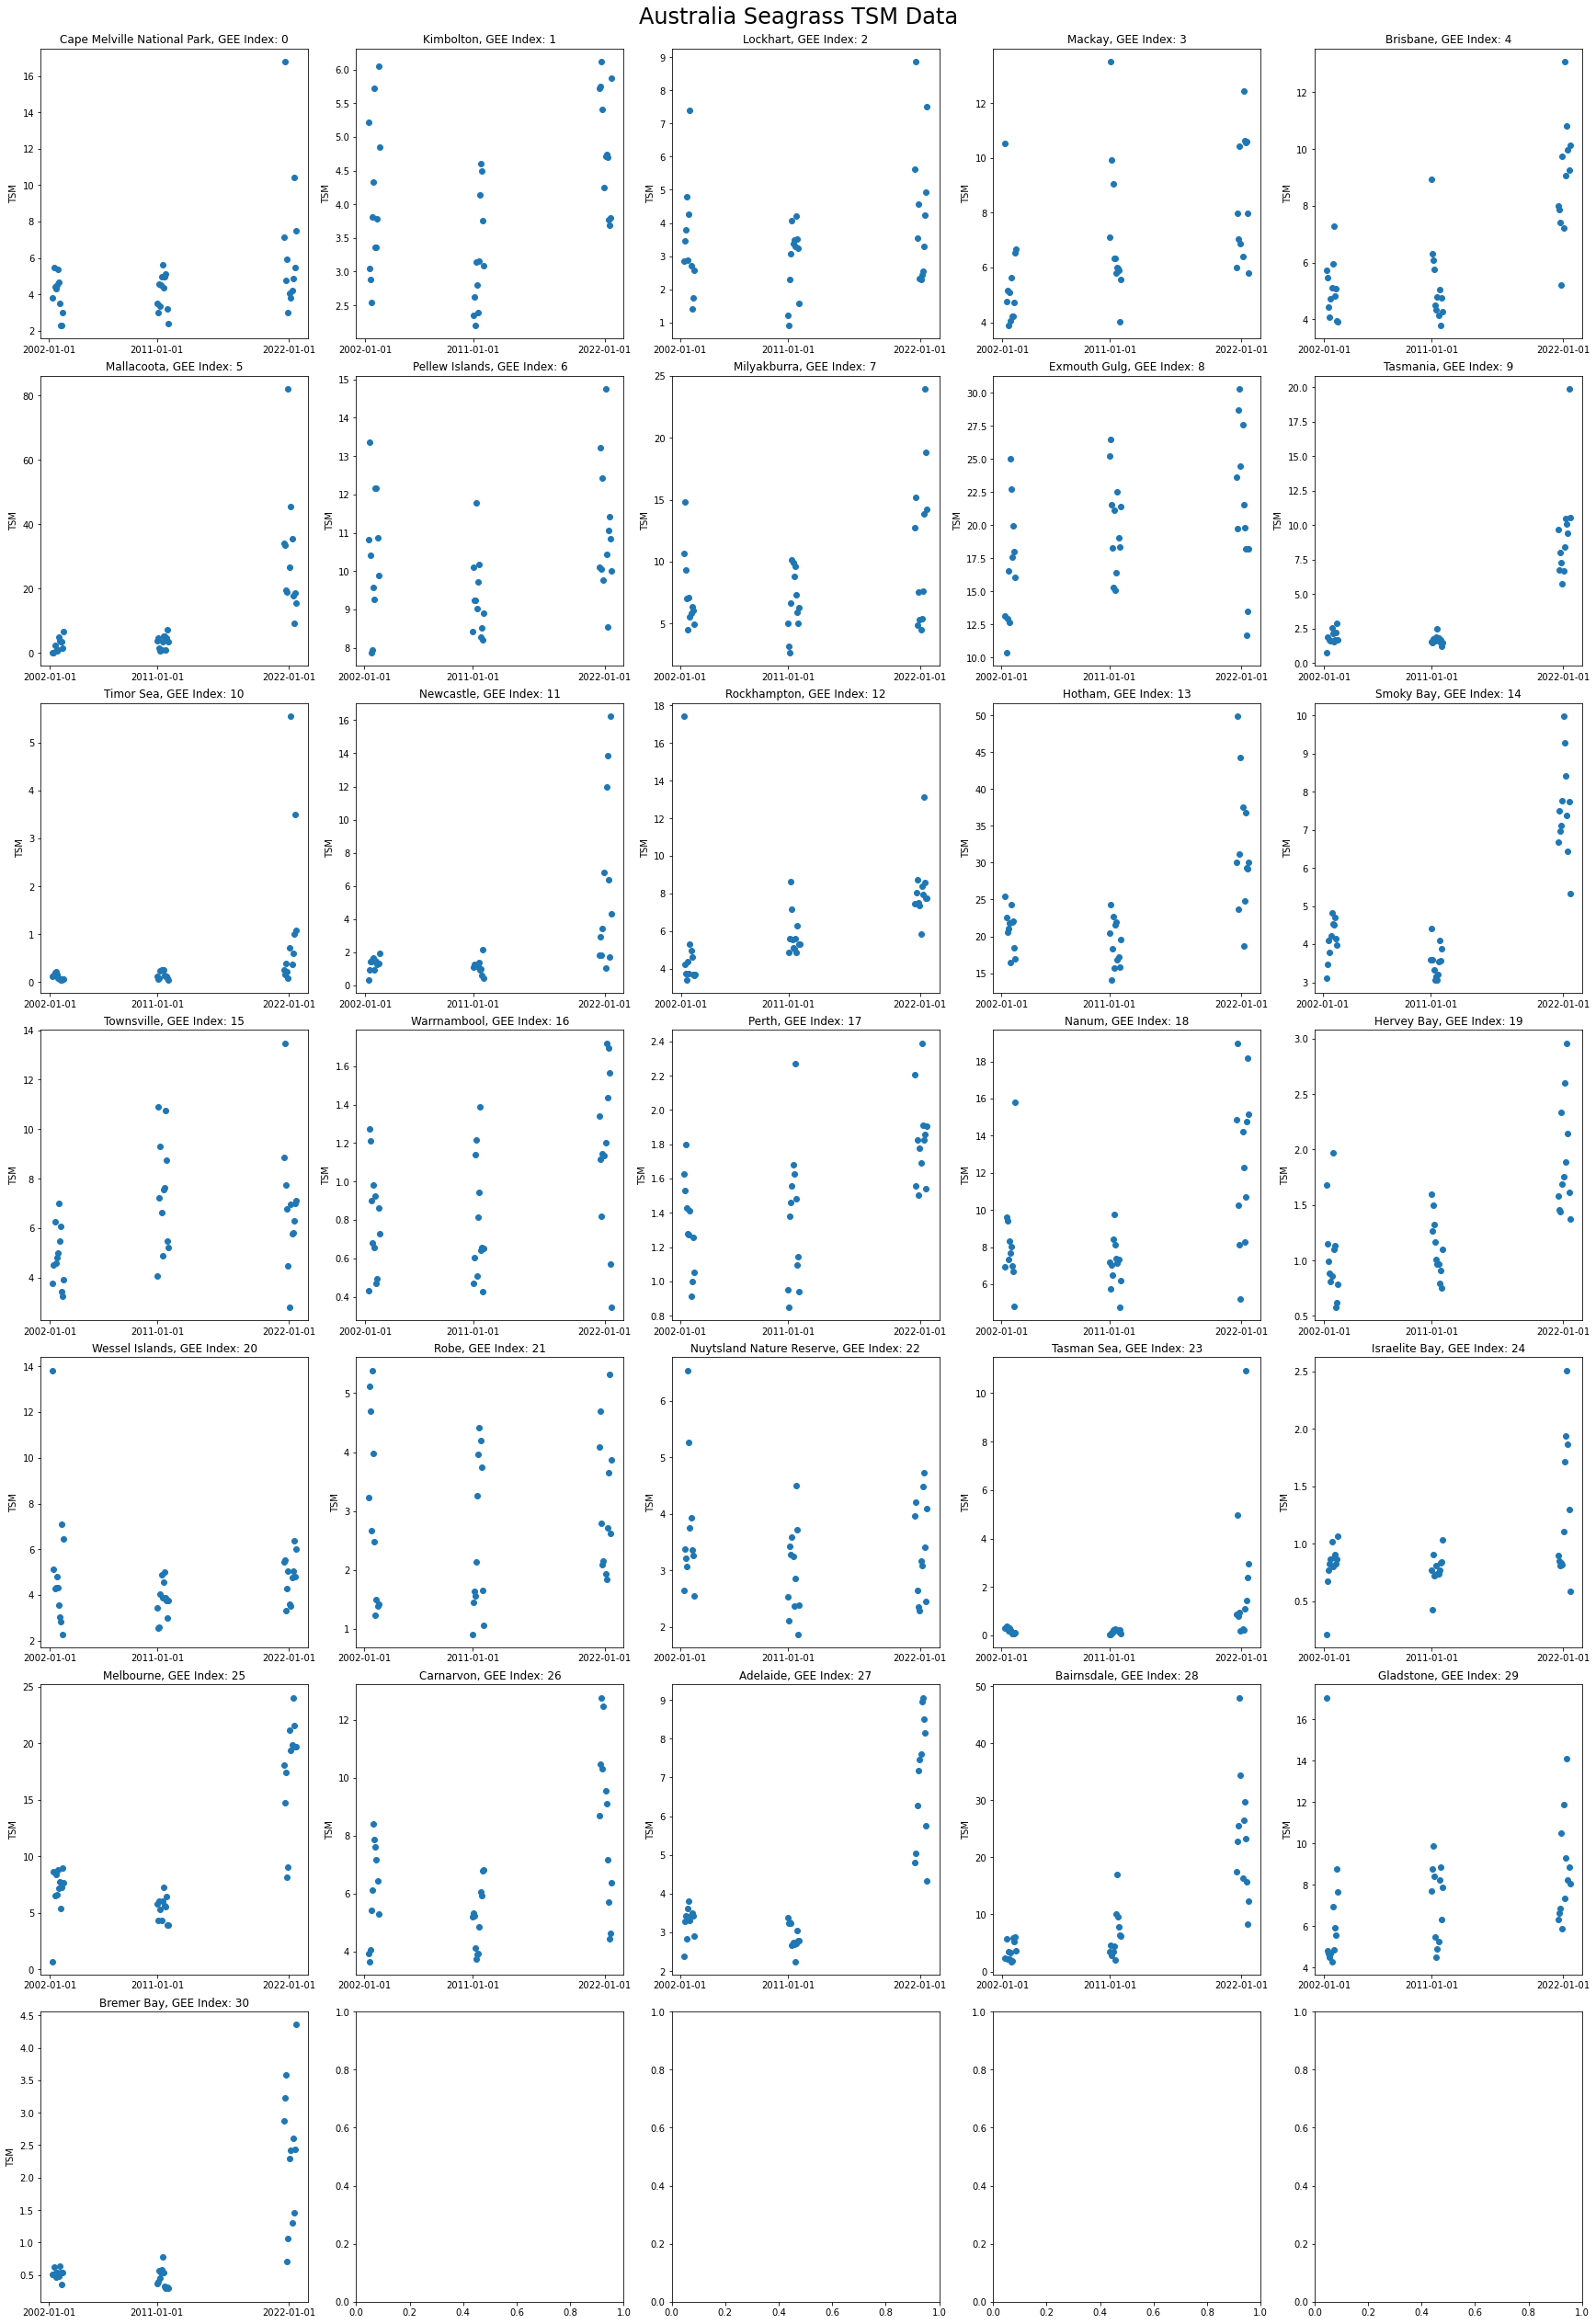

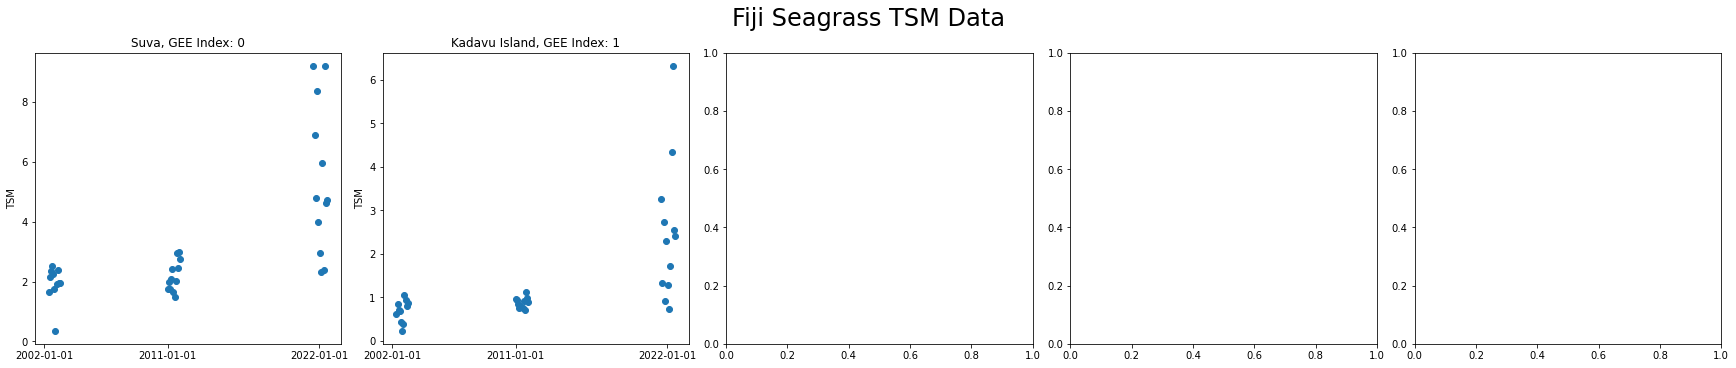

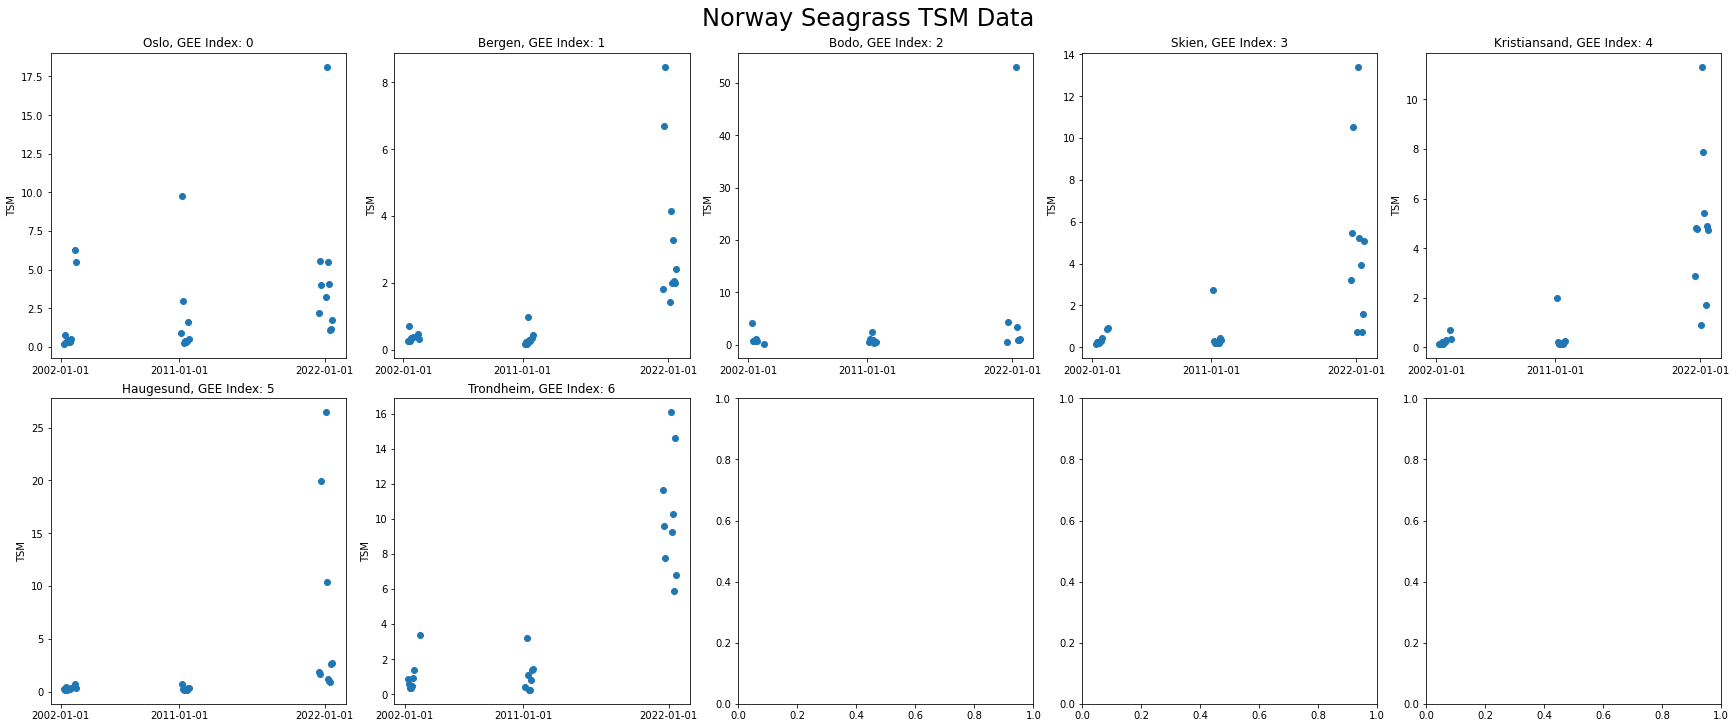

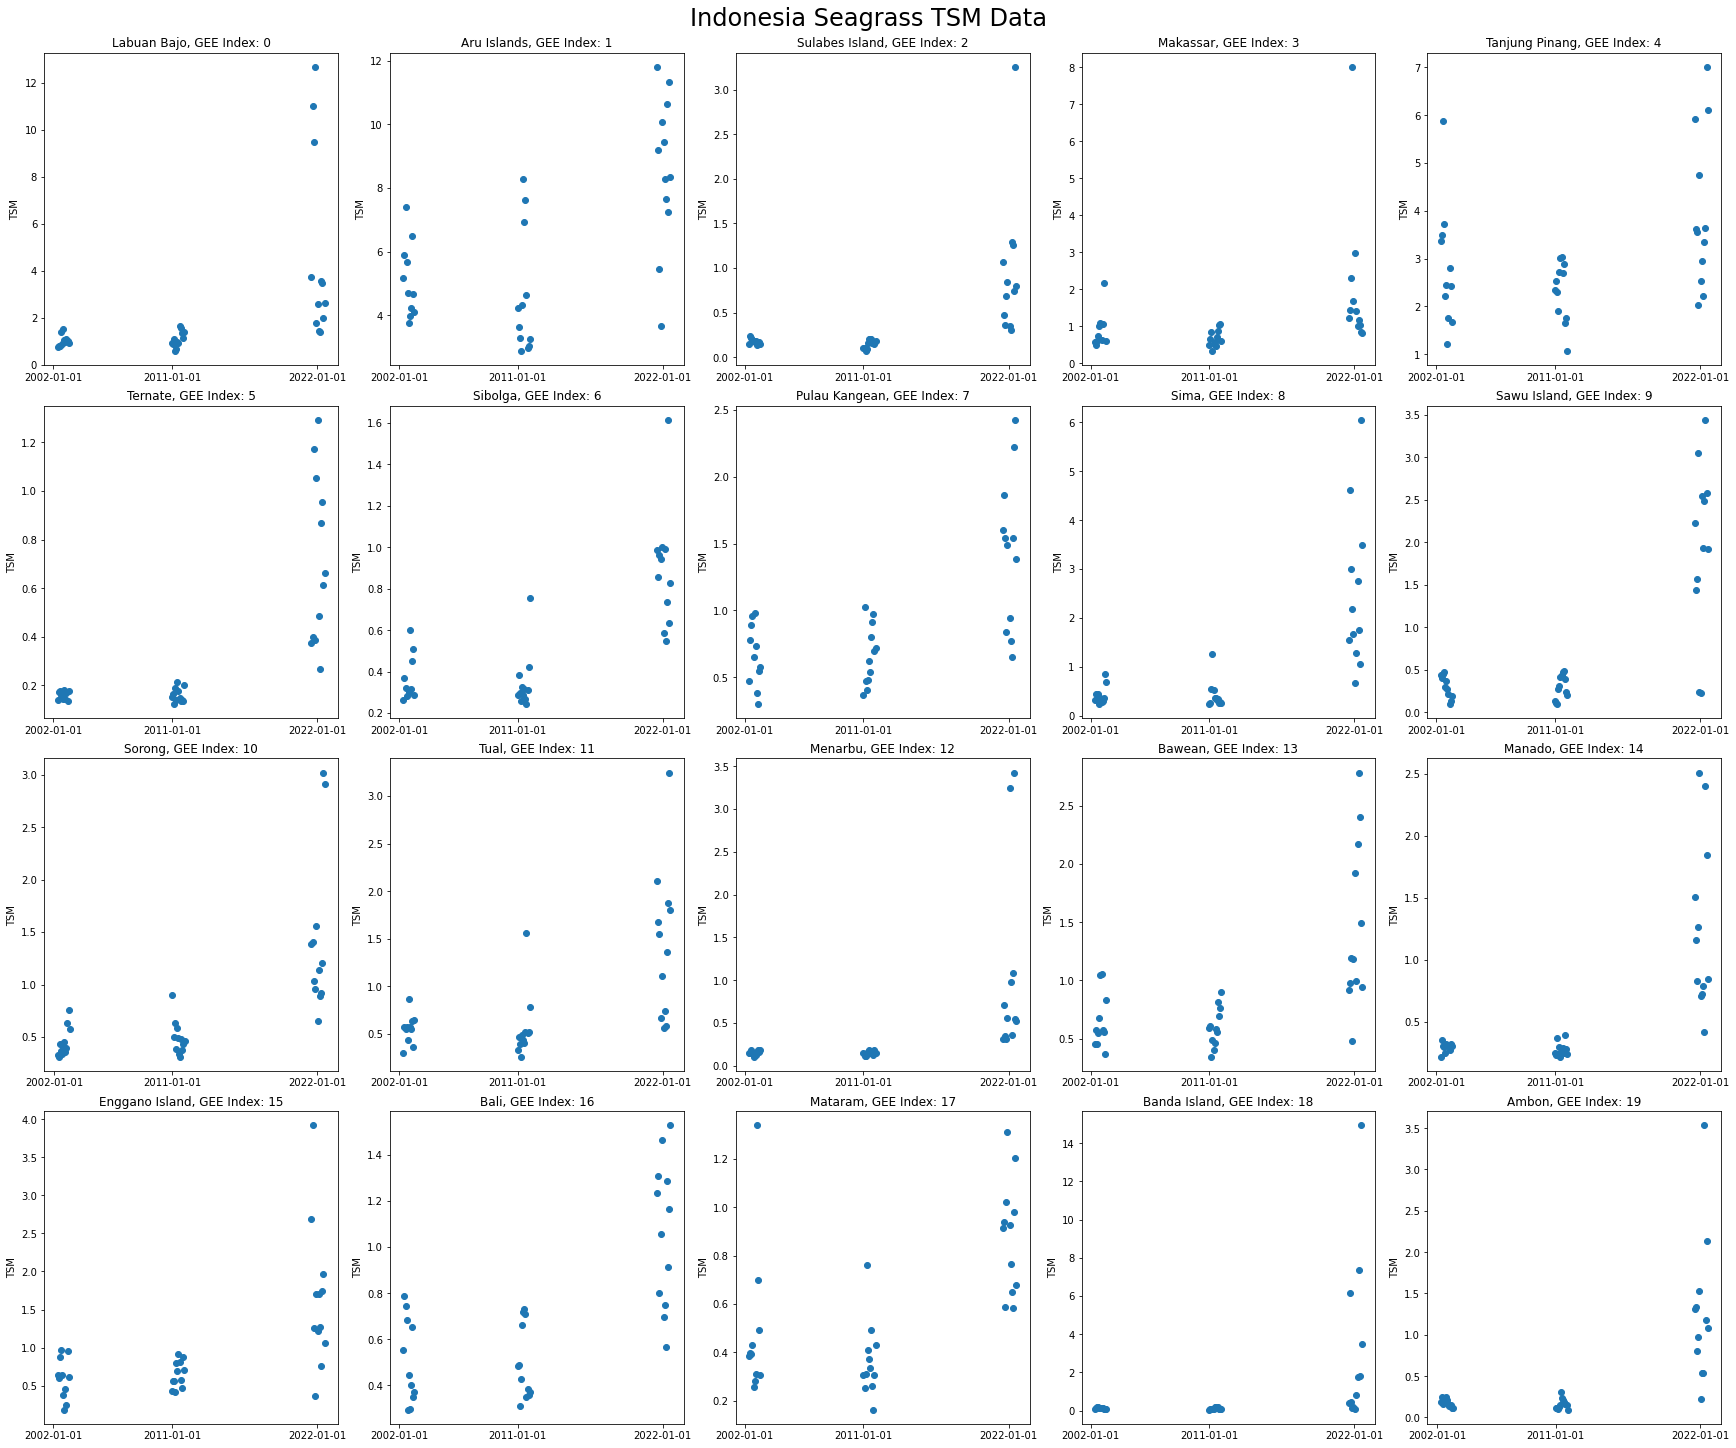

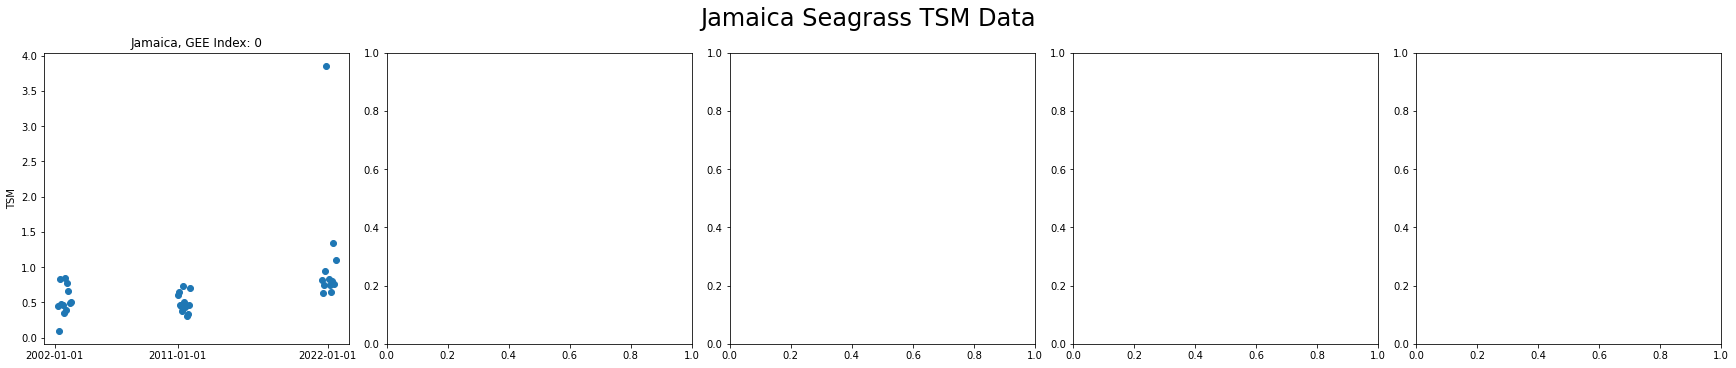

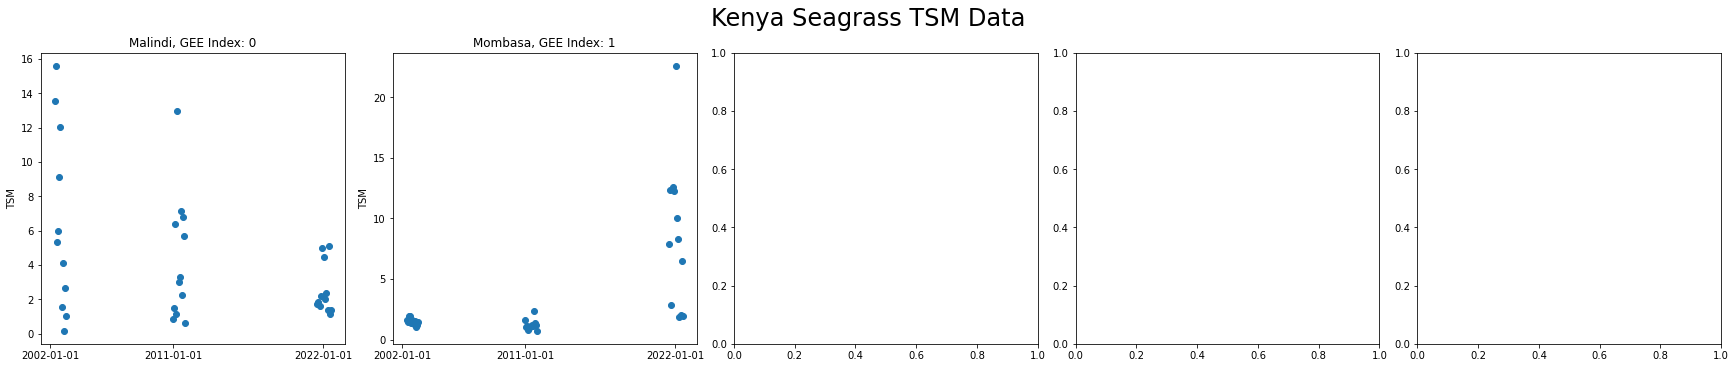

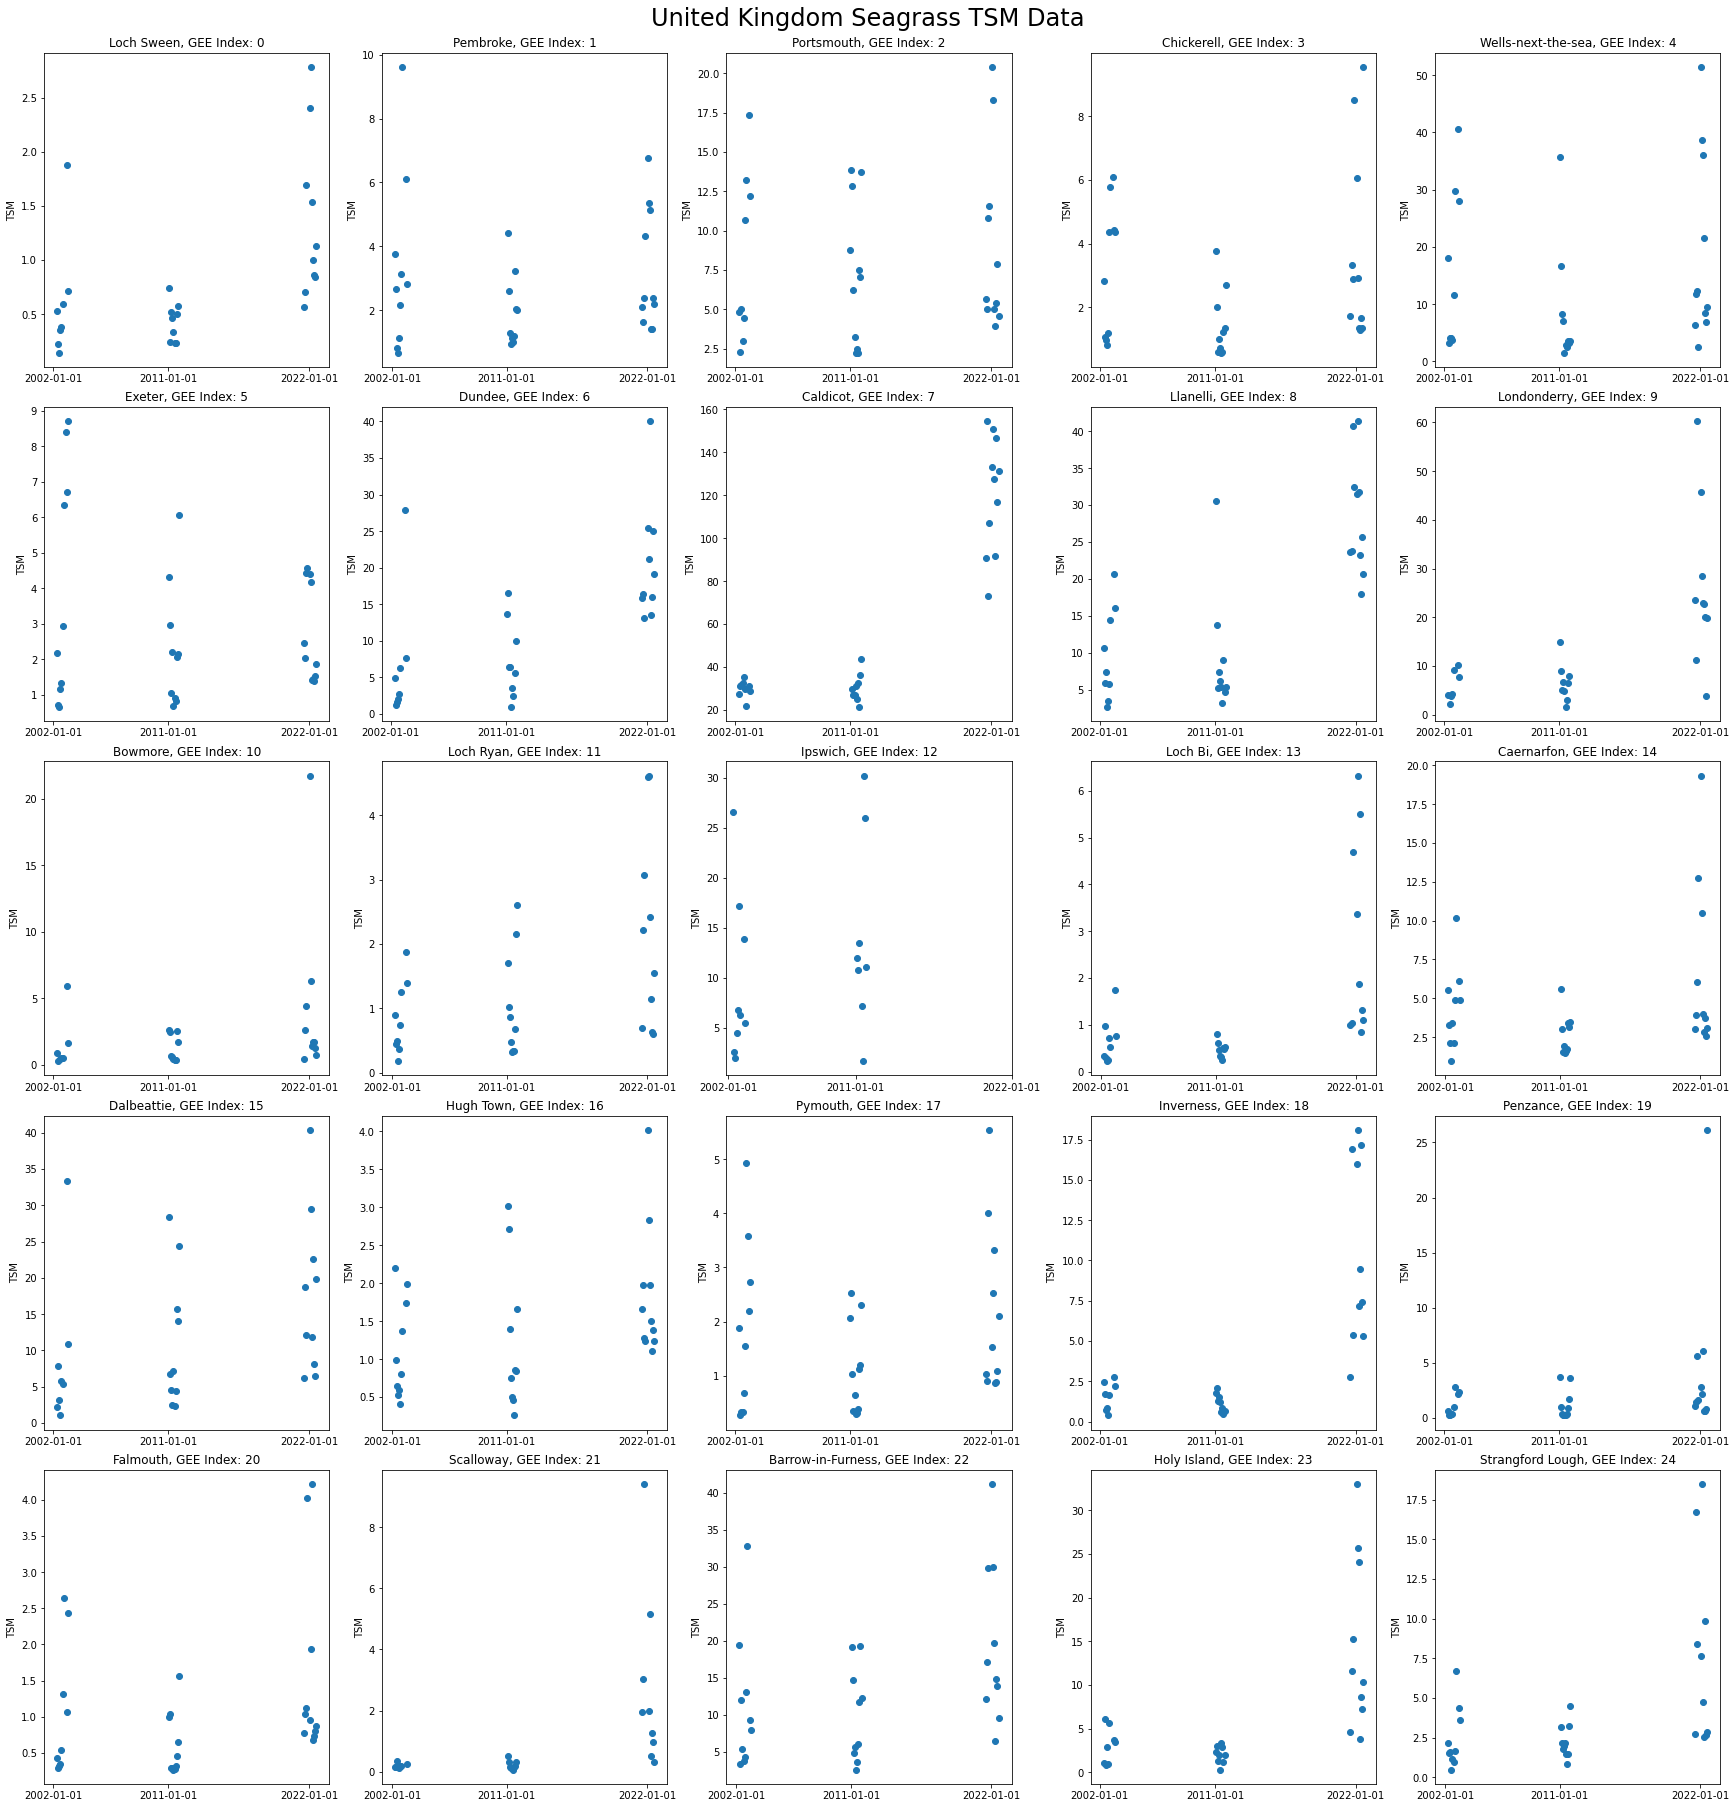

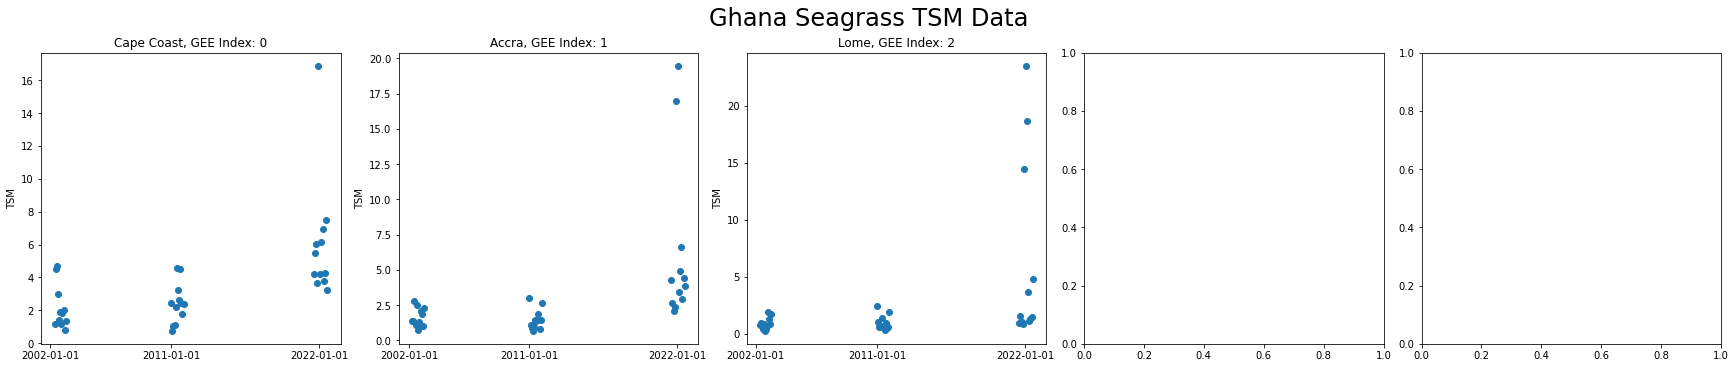

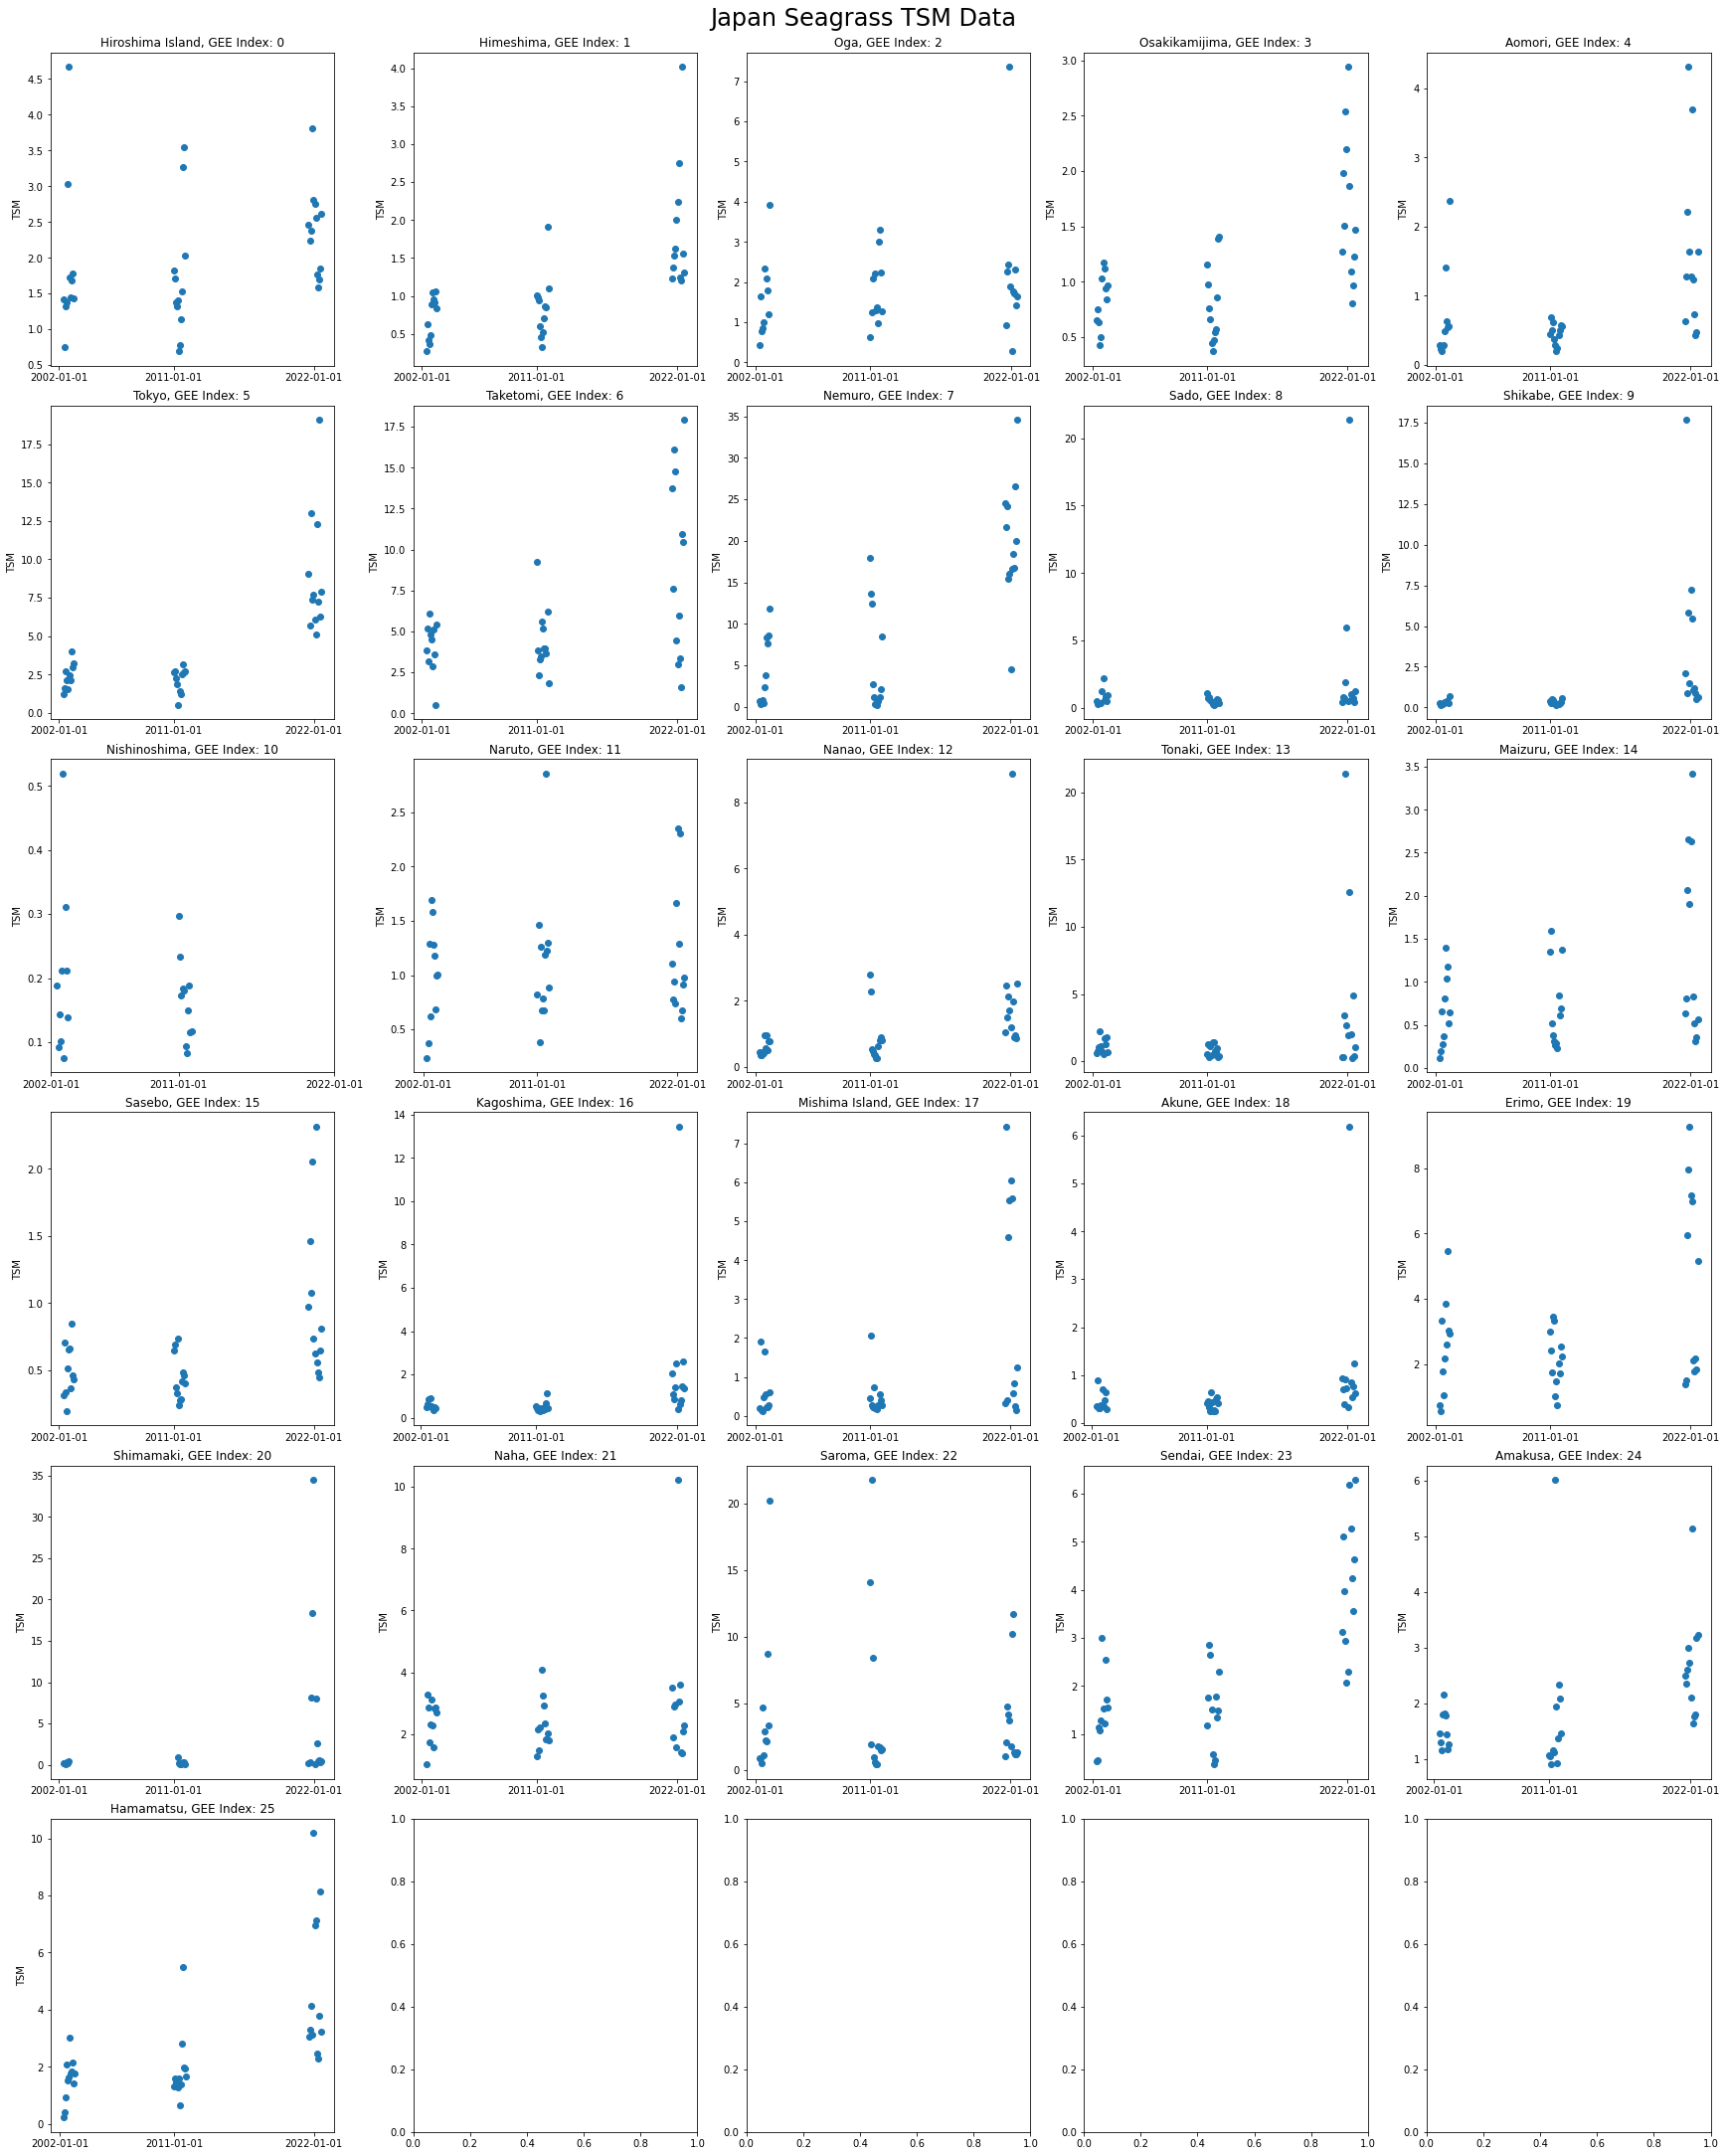

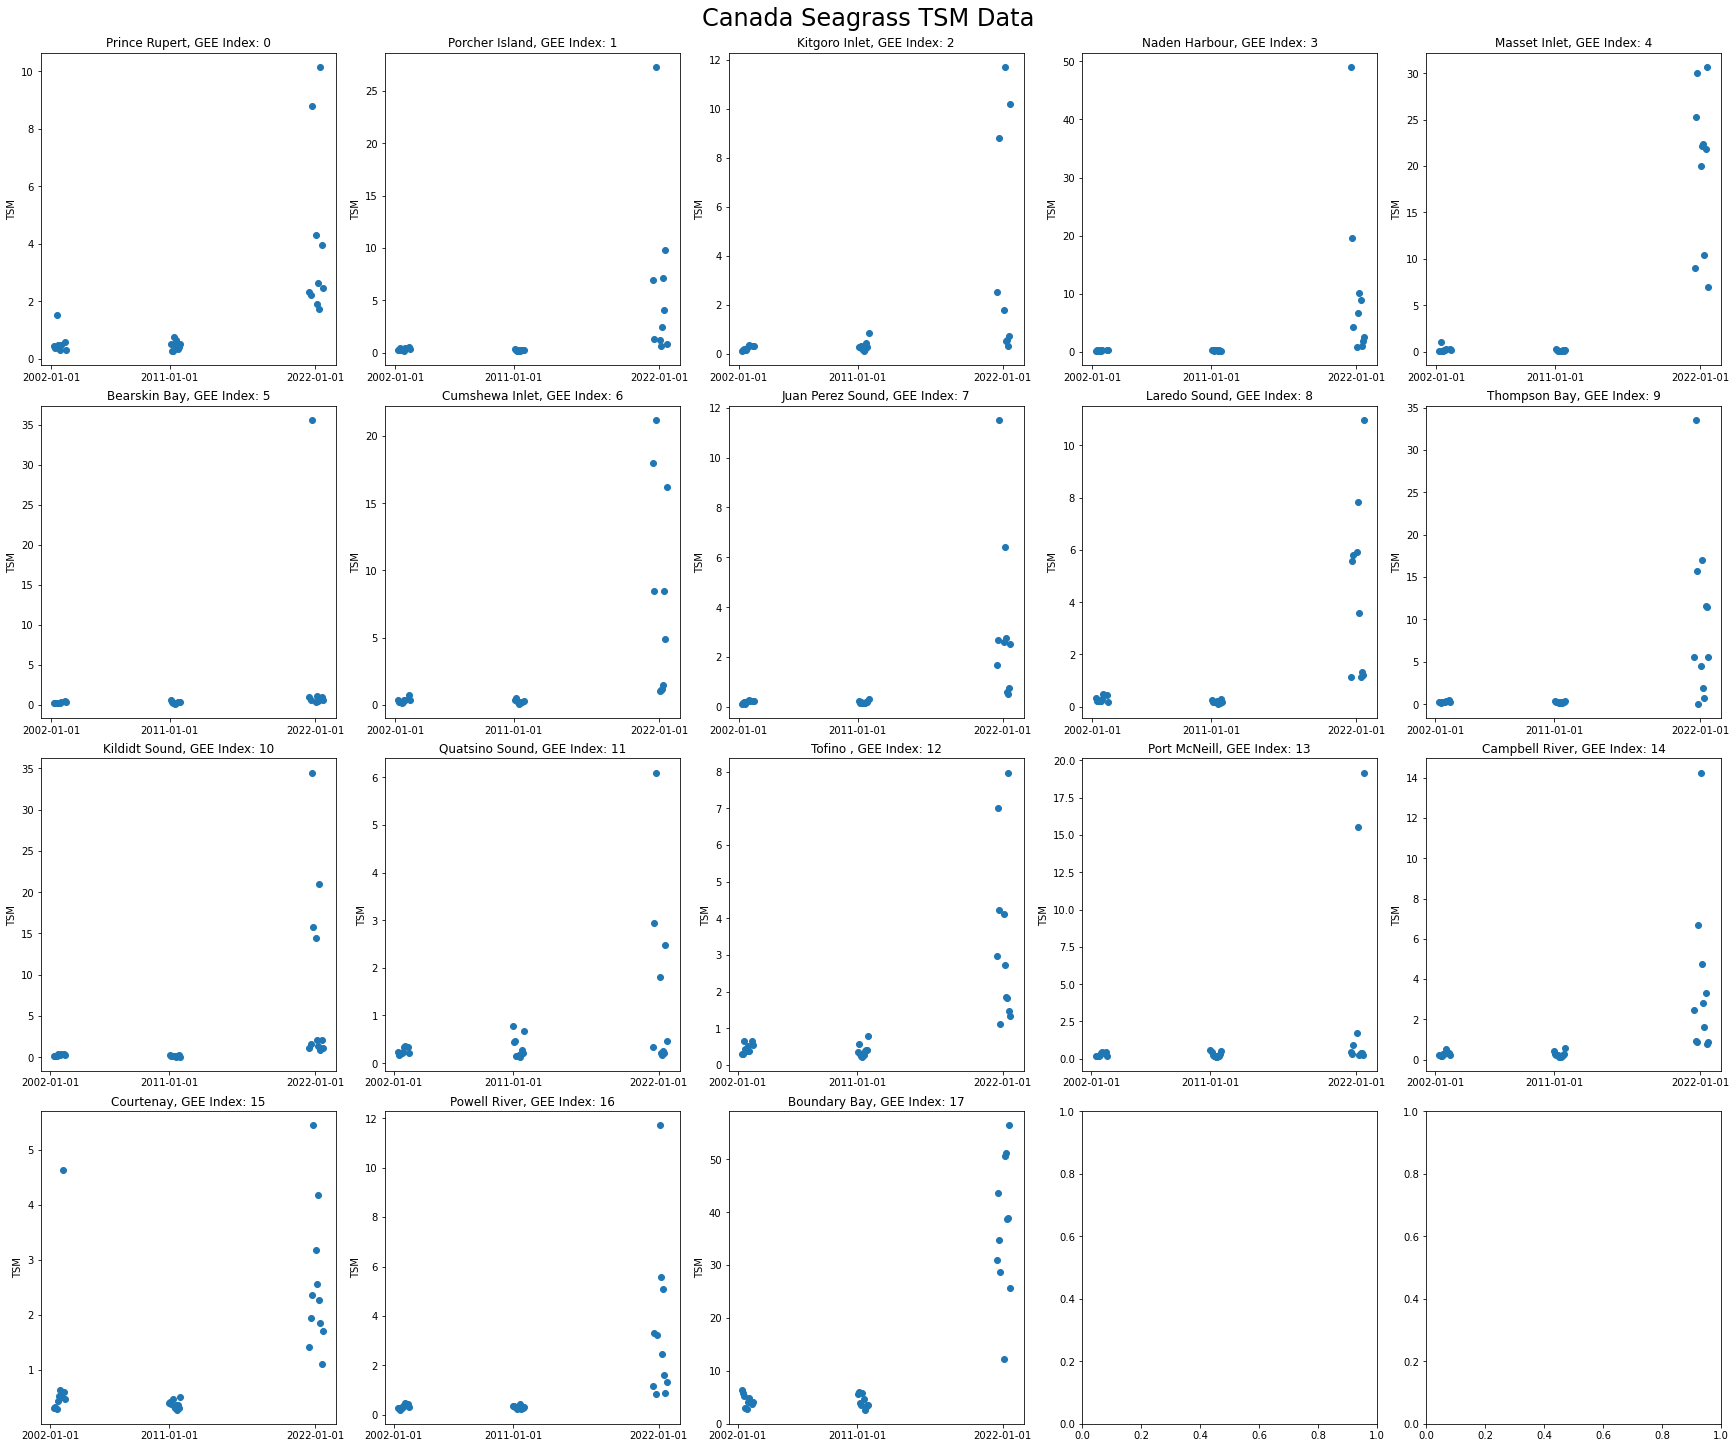

In [160]:
for file in tsm_files:
    country_data = pd.read_excel(file)
    iso3 = file[-8:-5]
    num_regions = len(country_data['GEE_index'].unique())
    rows = num_regions // 5 + (num_regions % 5 > 0)
    fig, axs = plt.subplots(rows,5, constrained_layout=True, facecolor='white')
    fig.suptitle(f'{iso3_dict[iso3]} Seagrass TSM Data', fontsize=24)
    fig.set_figwidth(24)
    fig.set_figheight(5*rows)
    ax1 = 0
    ax2 = -1
    for i in range(num_regions):
        ax2 += 1
        region = country_data[country_data['GEE_index'] == float(i)].sort_values('Date').reset_index()
        x = region['Date']
        y = region['TSM']
        region_name = region['Region'].iloc[0]
        if i>0 and i%5 == 0:
            ax1 += 1
            ax2 = 0
        if rows == 1:
            axs[ax2].scatter(x,y)
            axs[ax2].set_title(f'{region_name}, GEE Index: {i}')
            axs[ax2].set_xticks(['2002', '2011', '2022'])
            axs[ax2].set_ylabel('TSM')
        else:
            axs[ax1, ax2].scatter(x,y)
            axs[ax1, ax2].set_title(f'{region_name}, GEE Index: {i}')
            axs[ax1, ax2].set_xticks(['2002', '2011', '2022'])
            axs[ax1, ax2].set_ylabel('TSM')
    plt.savefig(f'{iso3}_TSM_All.png') 
    plt.show()

In [156]:
no3_files = glob.glob('no3*.xlsx')
no3_files

['no3_seagrass_PLW.xlsx',
 'no3_seagrass_AUS.xlsx',
 'no3_seagrass_GHA.xlsx',
 'no3_seagrass_MEX.xlsx',
 'no3_seagrass_FJI.xlsx',
 'no3_seagrass_JAM.xlsx']

NO3 max values for countries without buffer on seagrass

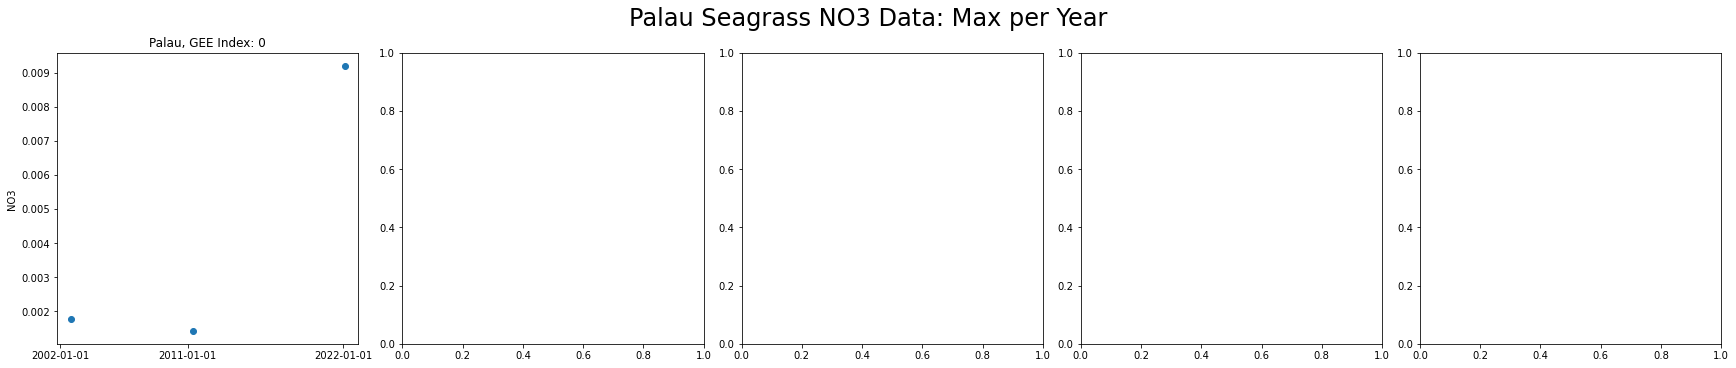

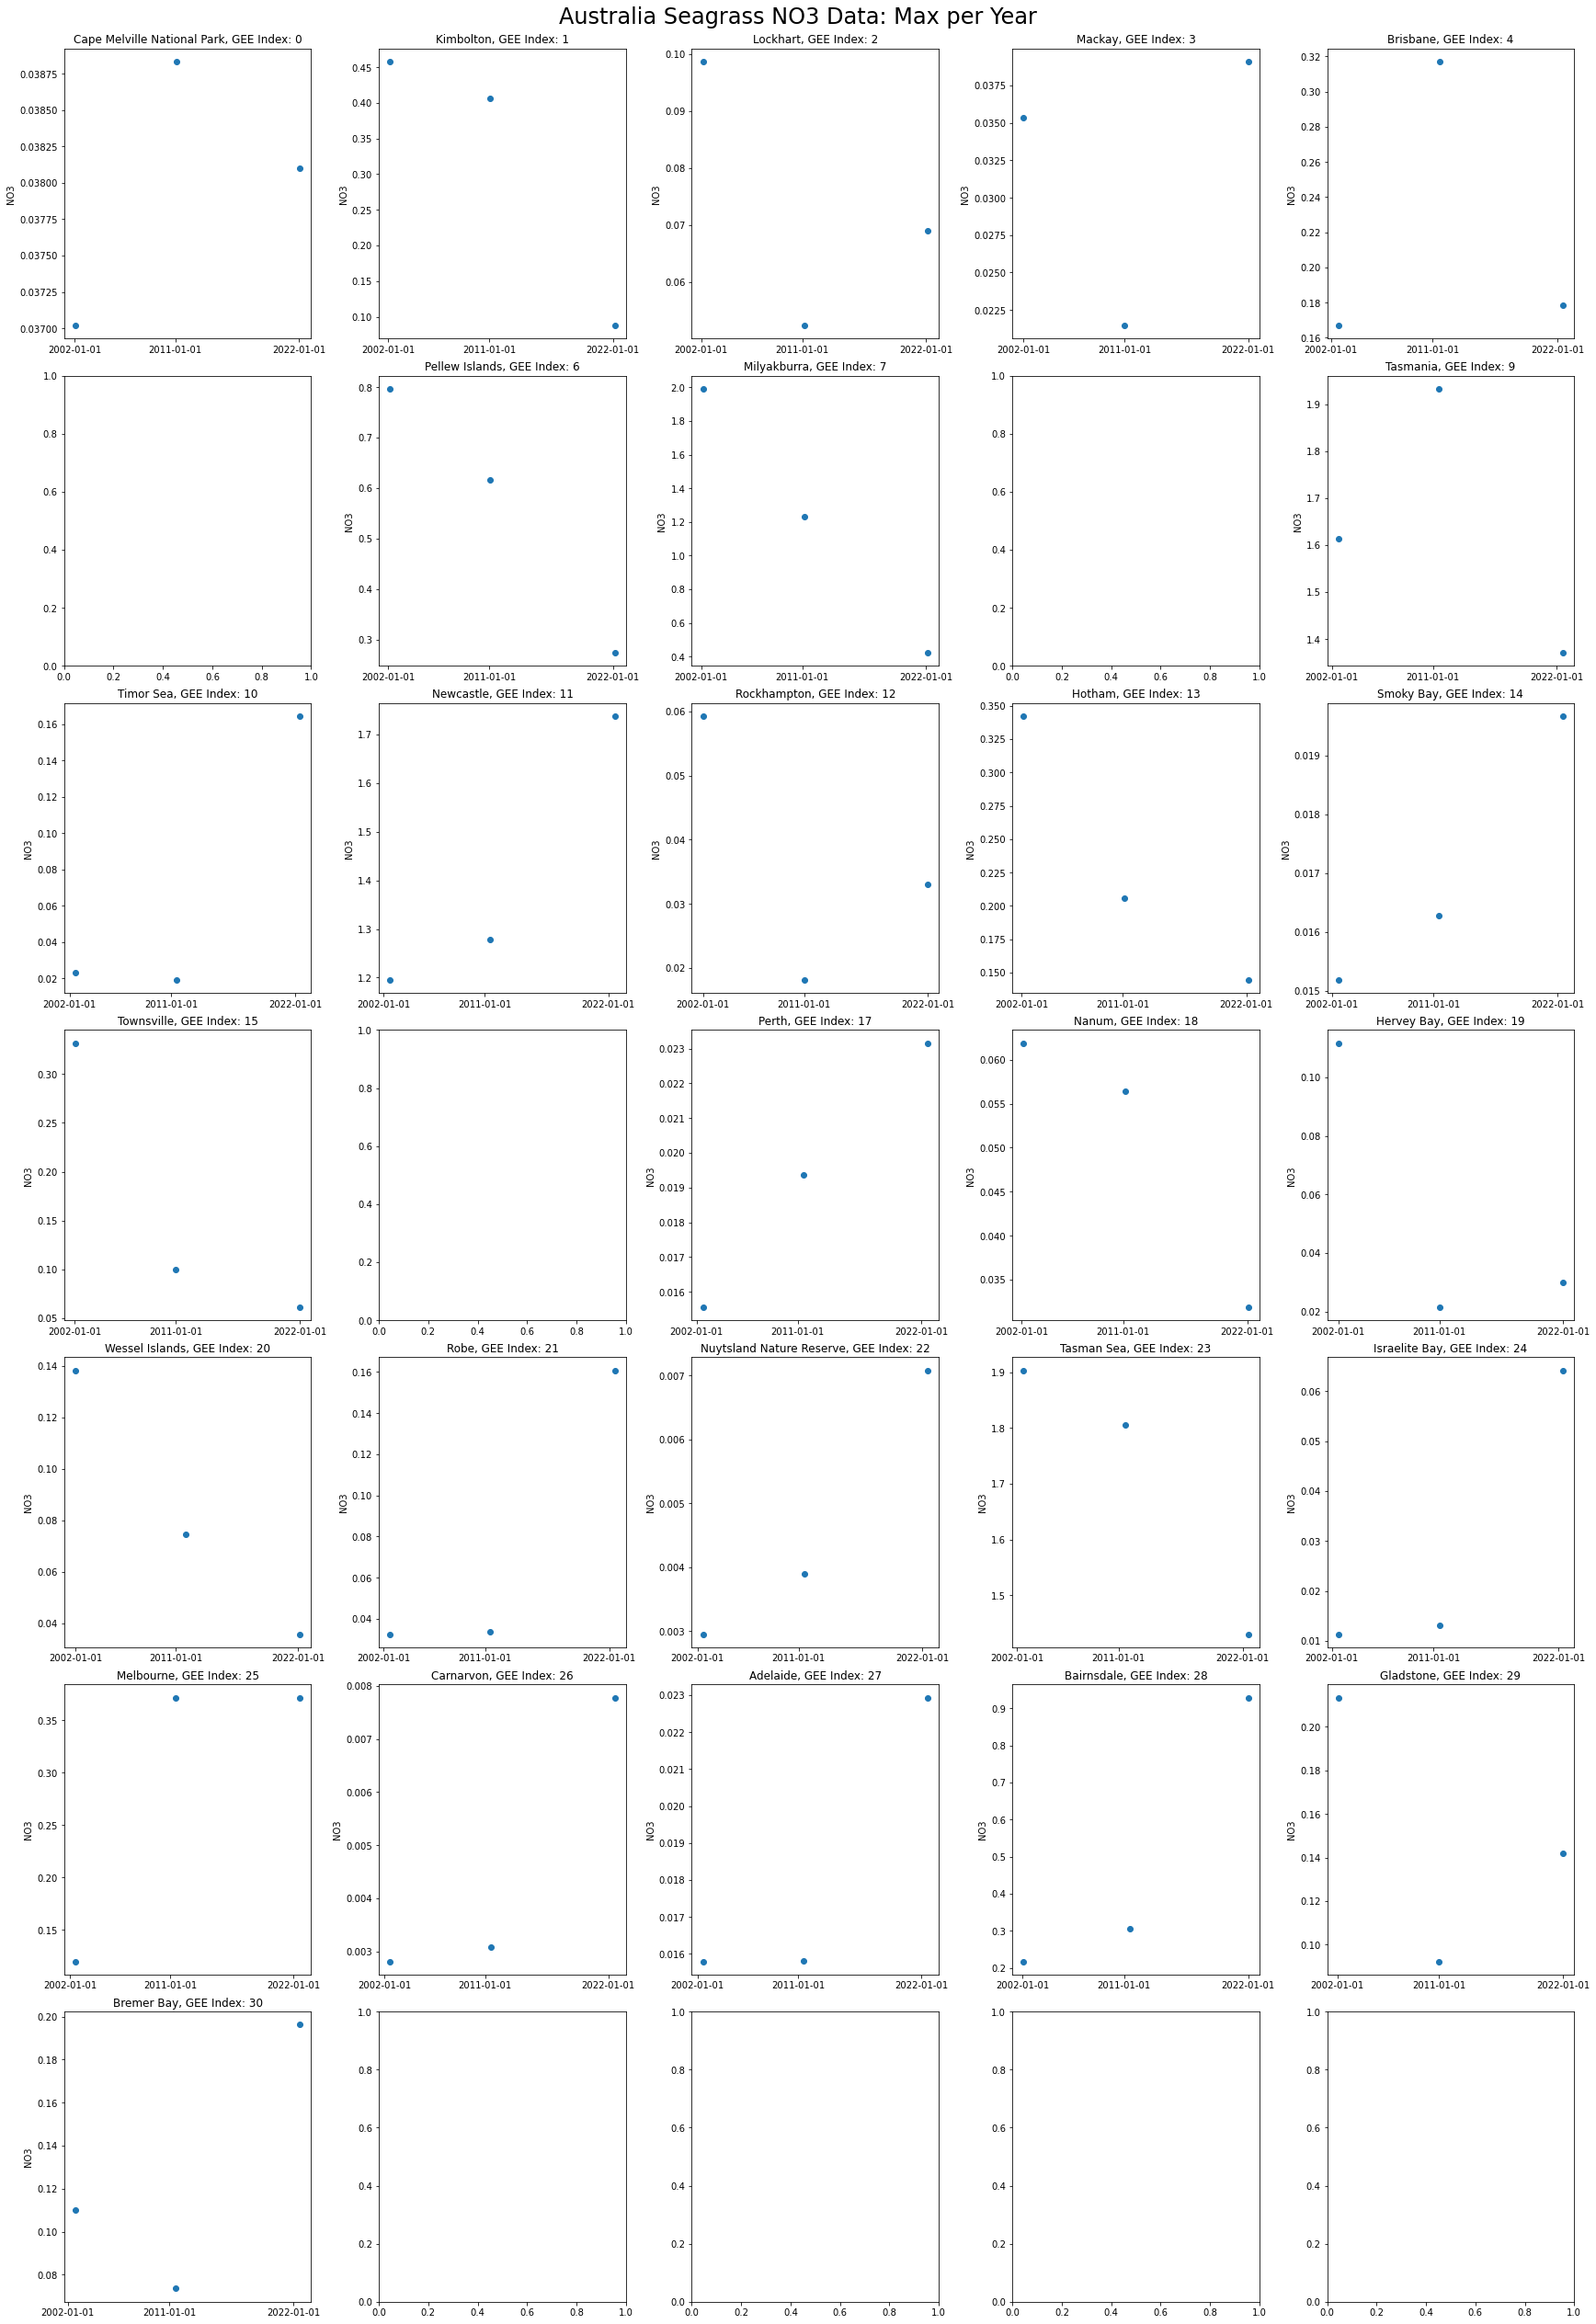

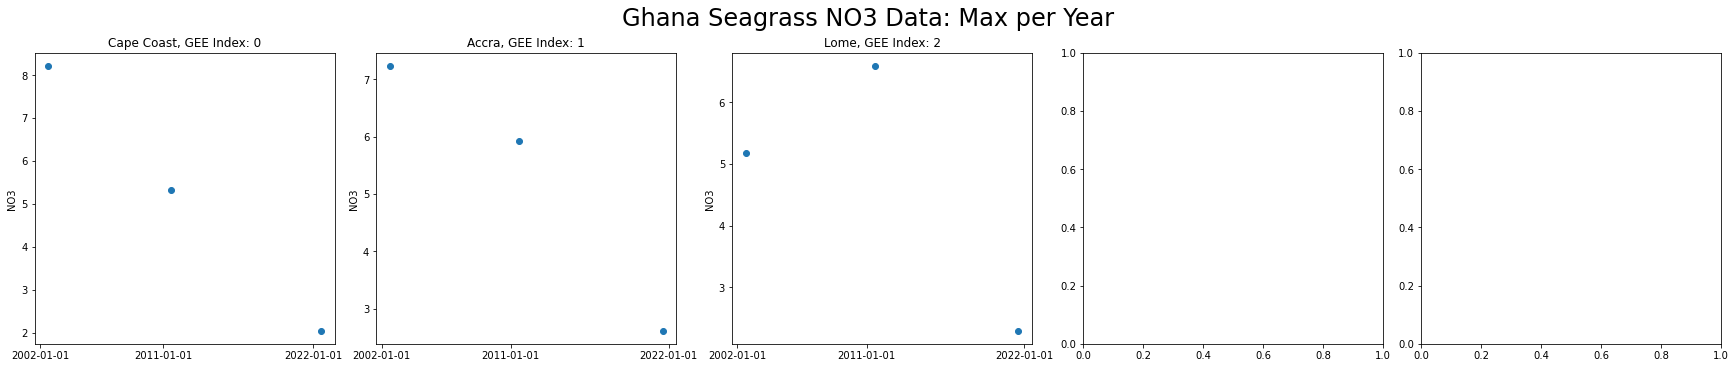

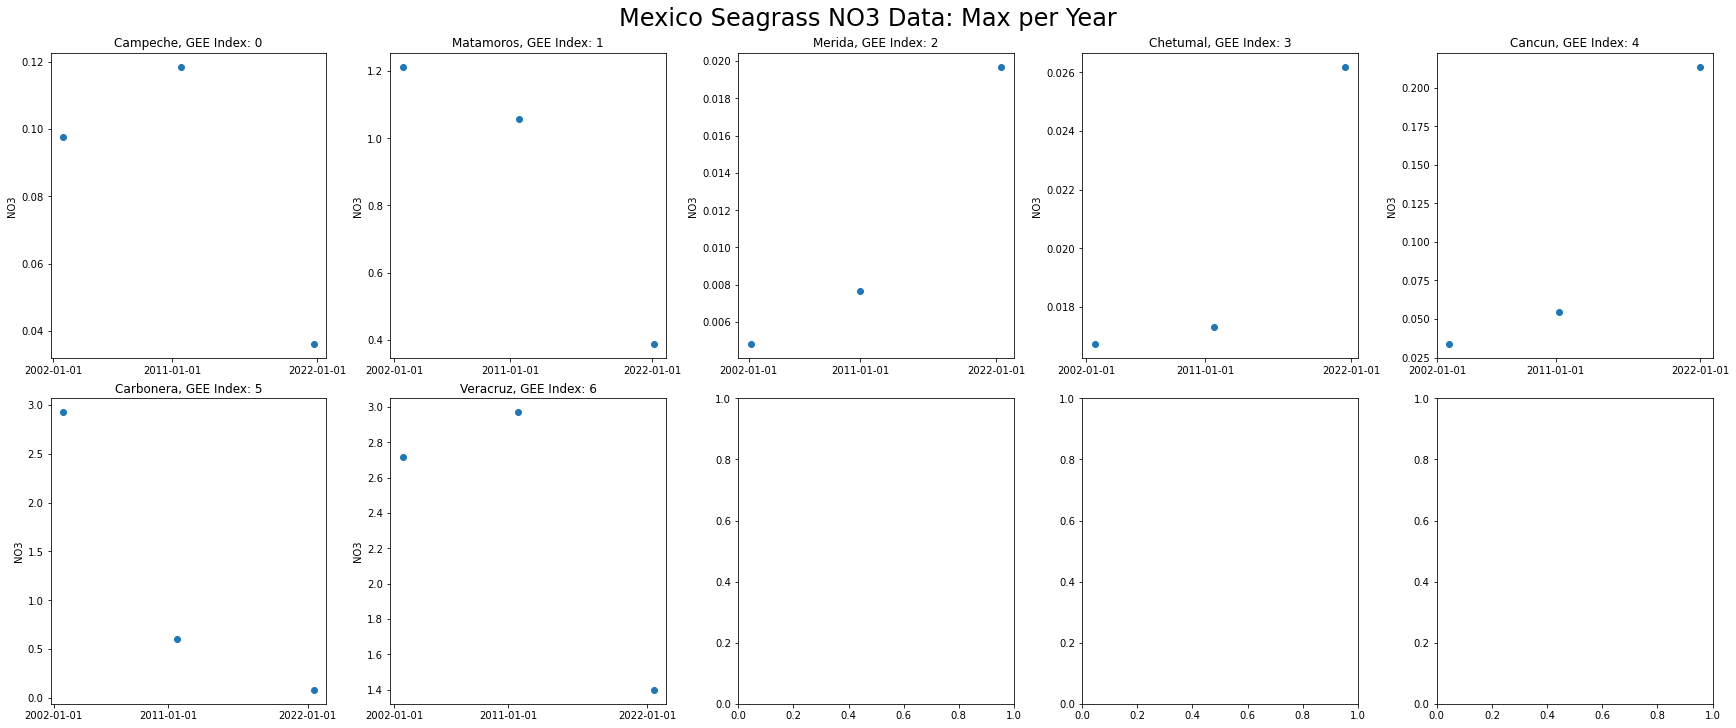

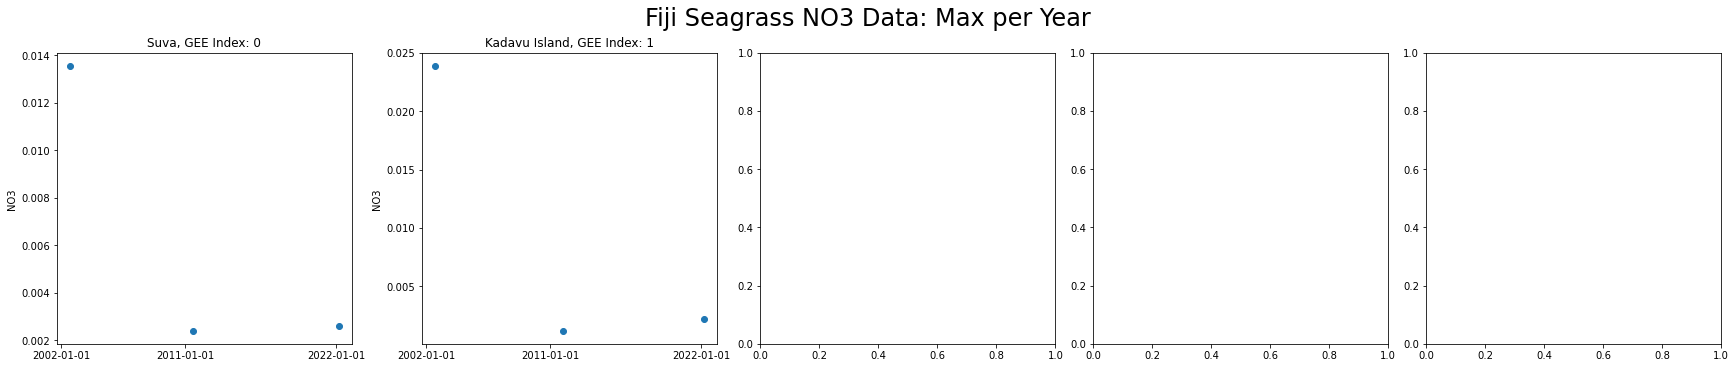

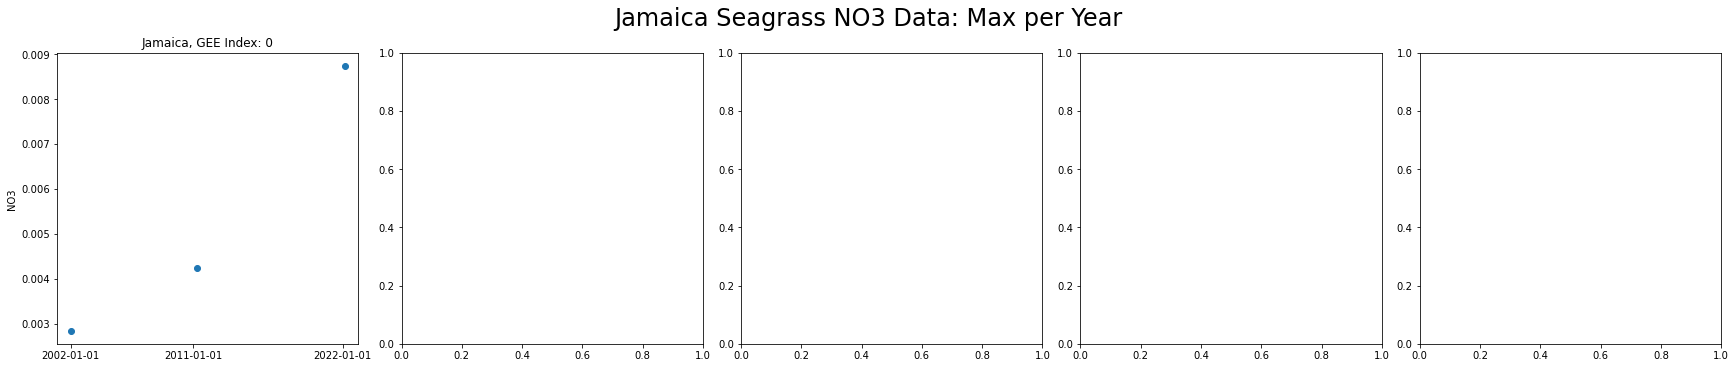

In [157]:
for file in no3_files:
    country_data = pd.read_excel(file)
    iso3 = file[-8:-5]
    num_regions = len(country_data['GEE_index'].unique())
    rows = num_regions // 5 + (num_regions % 5 > 0)
    fig, axs = plt.subplots(rows,5, constrained_layout=True, facecolor='white')
    fig.suptitle(f'{iso3_dict[iso3]} Seagrass NO3 Data: Max per Year', fontsize=24)
    fig.set_figwidth(24)
    fig.set_figheight(5*rows)
    ax1 = 0
    ax2 = -1
    for i in range(num_regions):
        ax2 += 1
        region = country_data[country_data['GEE_index'] == float(i)].sort_values('Date').reset_index()
        x = [region[region['no3'] == region.iloc[:12]['no3'].max()]['Date'], region[region['no3'] == region.iloc[12:24]['no3'].max()]['Date'], region[region['no3'] == region.iloc[24:]['no3'].max()]['Date']]
        y = [region.iloc[:12]['no3'].max(), region.iloc[12:24]['no3'].max(), region.iloc[24:]['no3'].max()]
        region_name = region['Region'].iloc[0]
        if i>0 and i%5 == 0:
            ax1 += 1
            ax2 = 0
        if not np.any(np.isnan(y)):
            if rows == 1:
                axs[ax2].scatter(x,y)
                axs[ax2].set_title(f'{region_name}, GEE Index: {i}')
                axs[ax2].set_xticks(['2002', '2011', '2022'])
                axs[ax2].set_ylabel('NO3')
            else:
                axs[ax1, ax2].scatter(x,y)
                axs[ax1, ax2].set_title(f'{region_name}, GEE Index: {i}')
                axs[ax1, ax2].set_xticks(['2002', '2011', '2022'])
                axs[ax1, ax2].set_ylabel('NO3')
    plt.savefig(f'{iso3}_NO3_Max.png') 
    plt.show()

NO3 all data plots for countries without buffer for seagrass

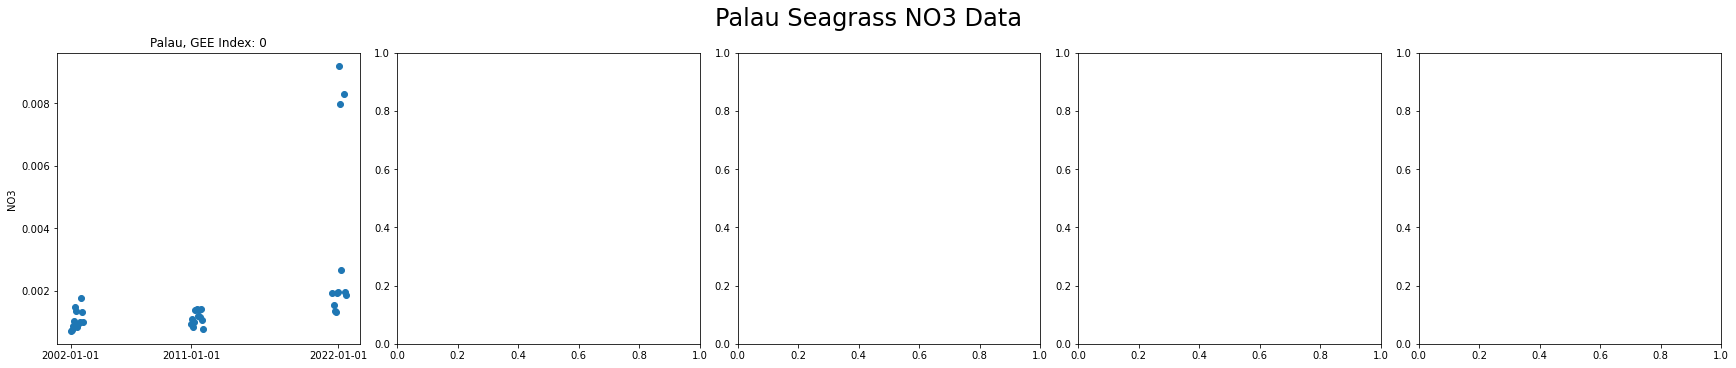

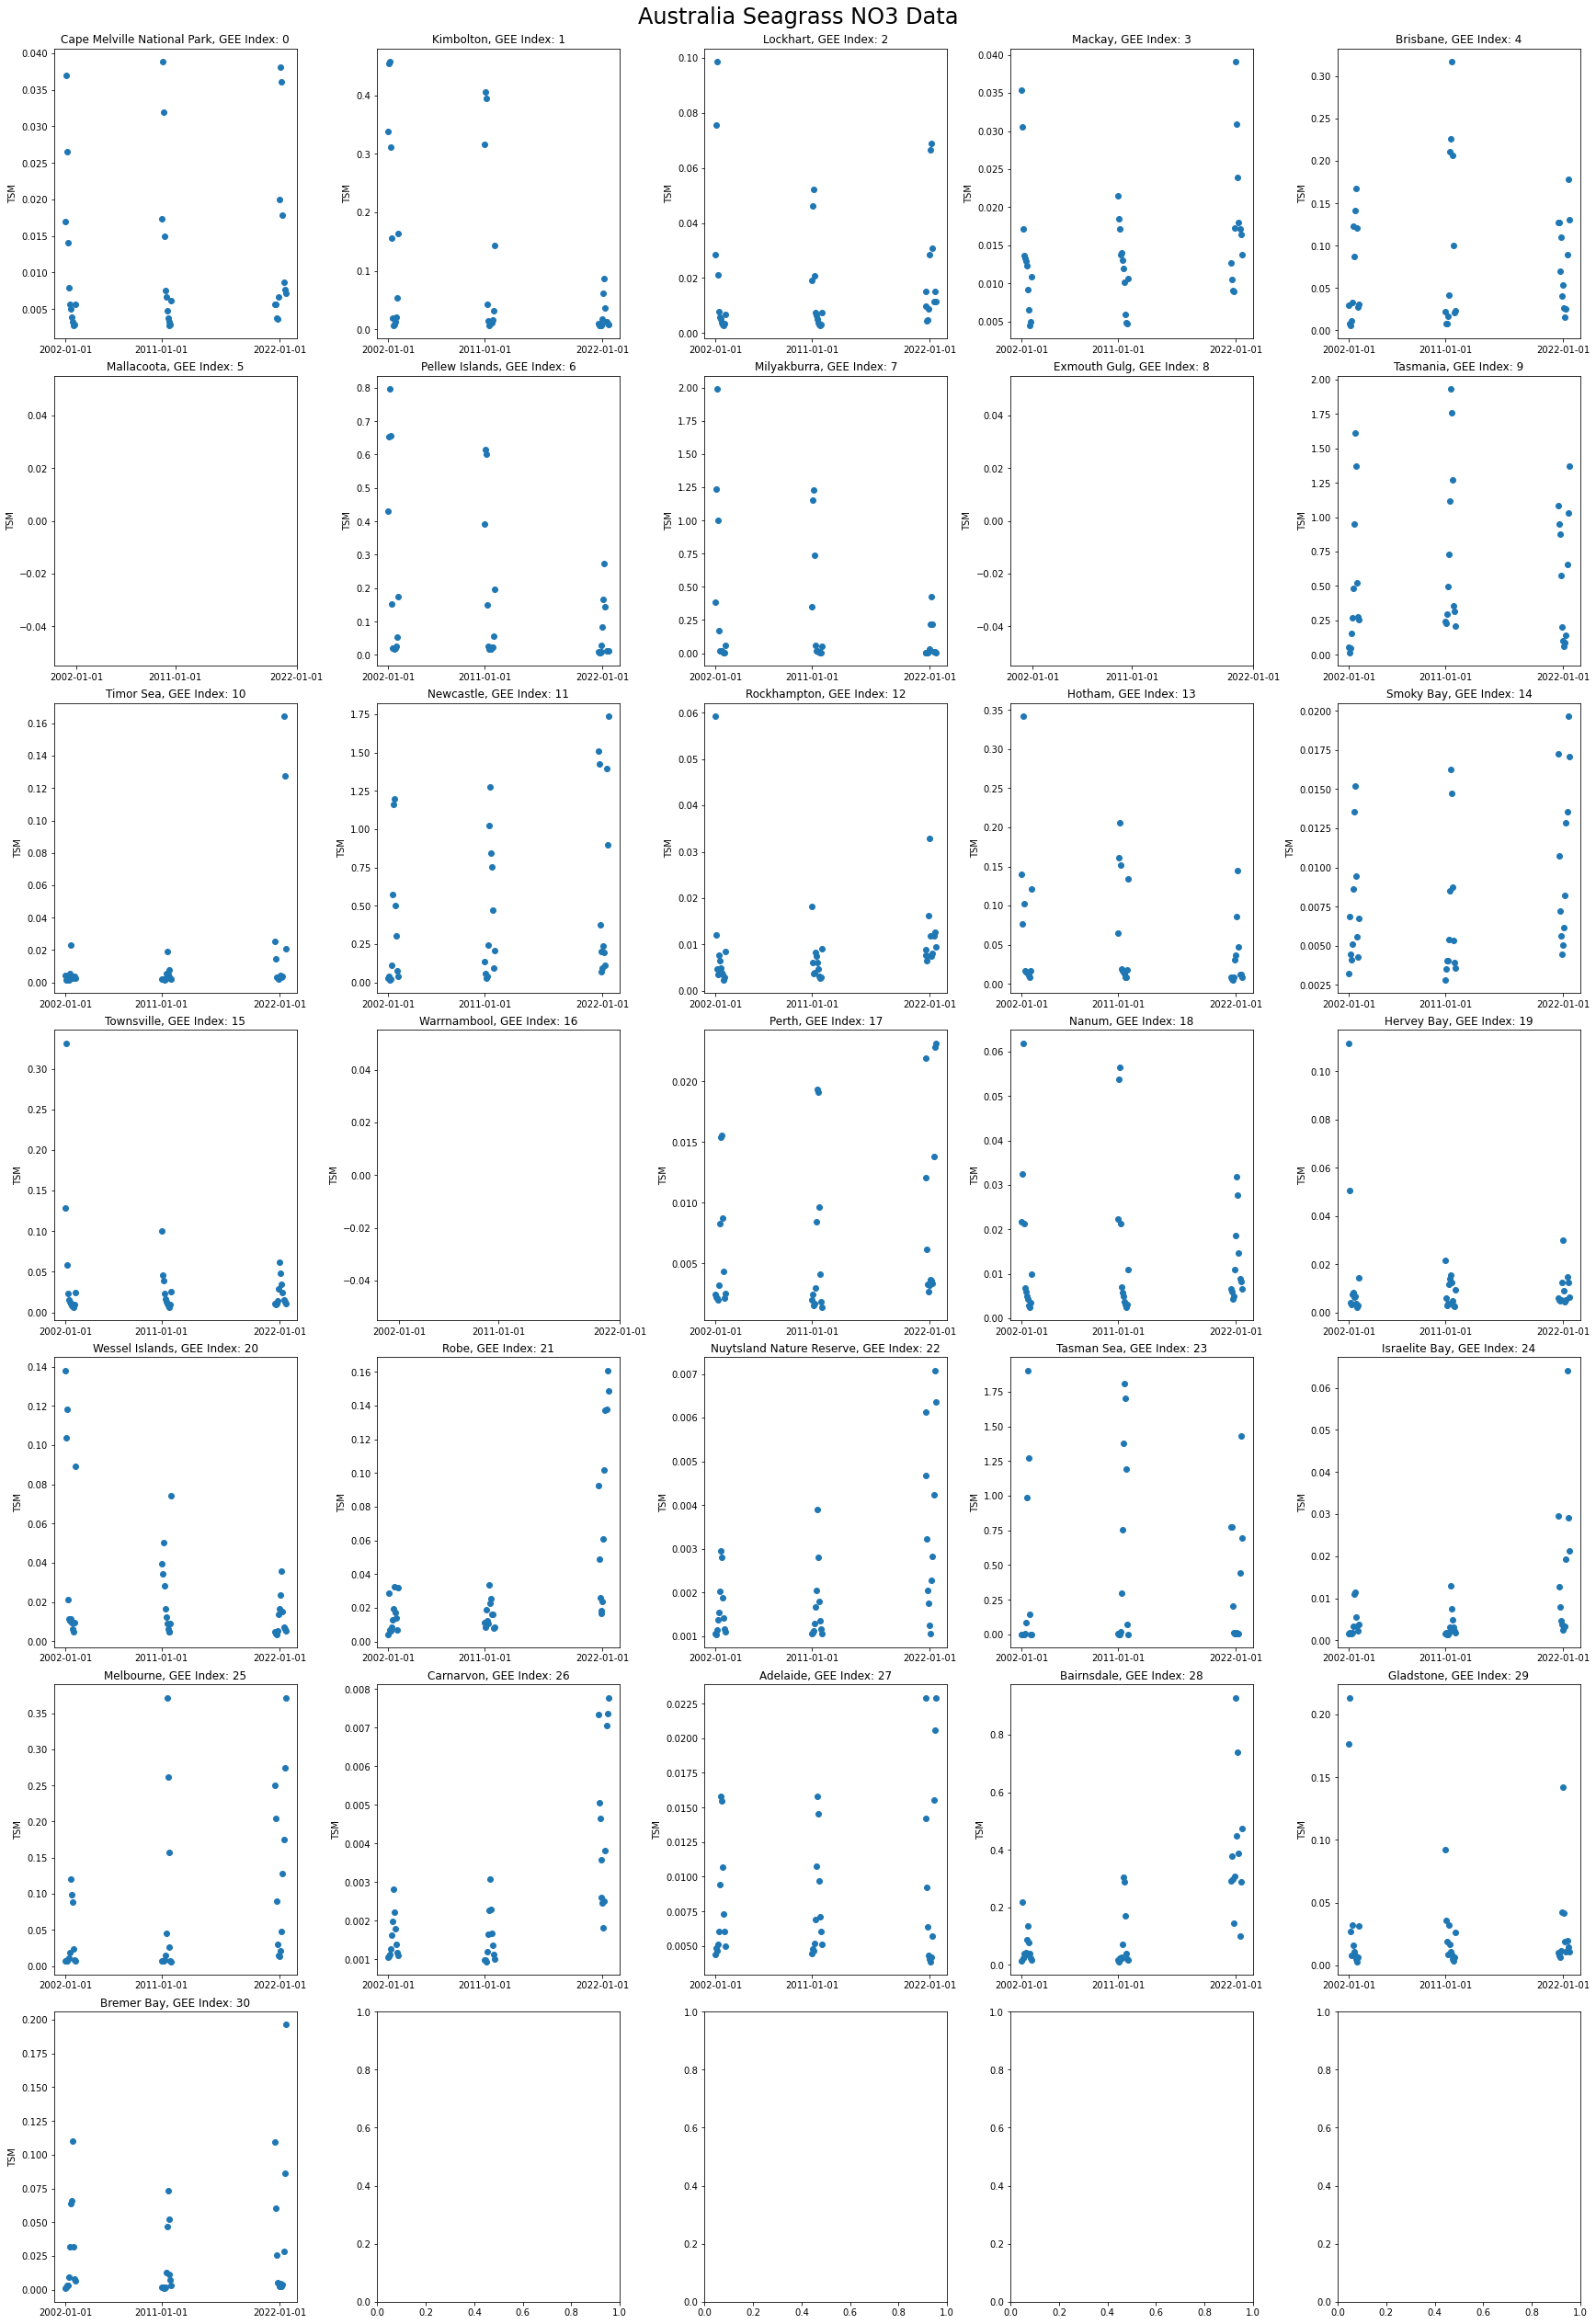

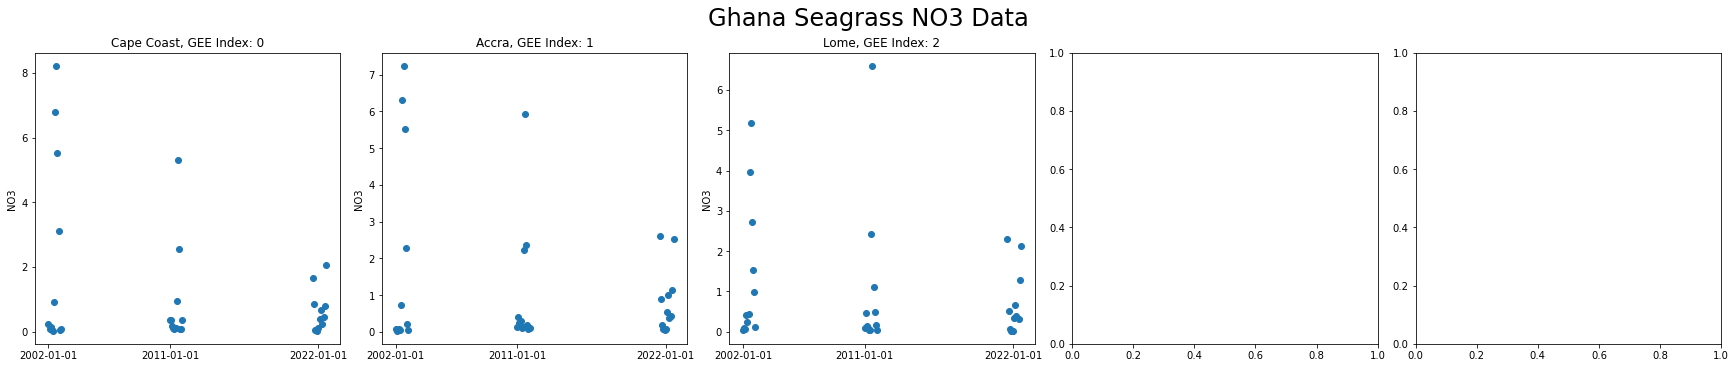

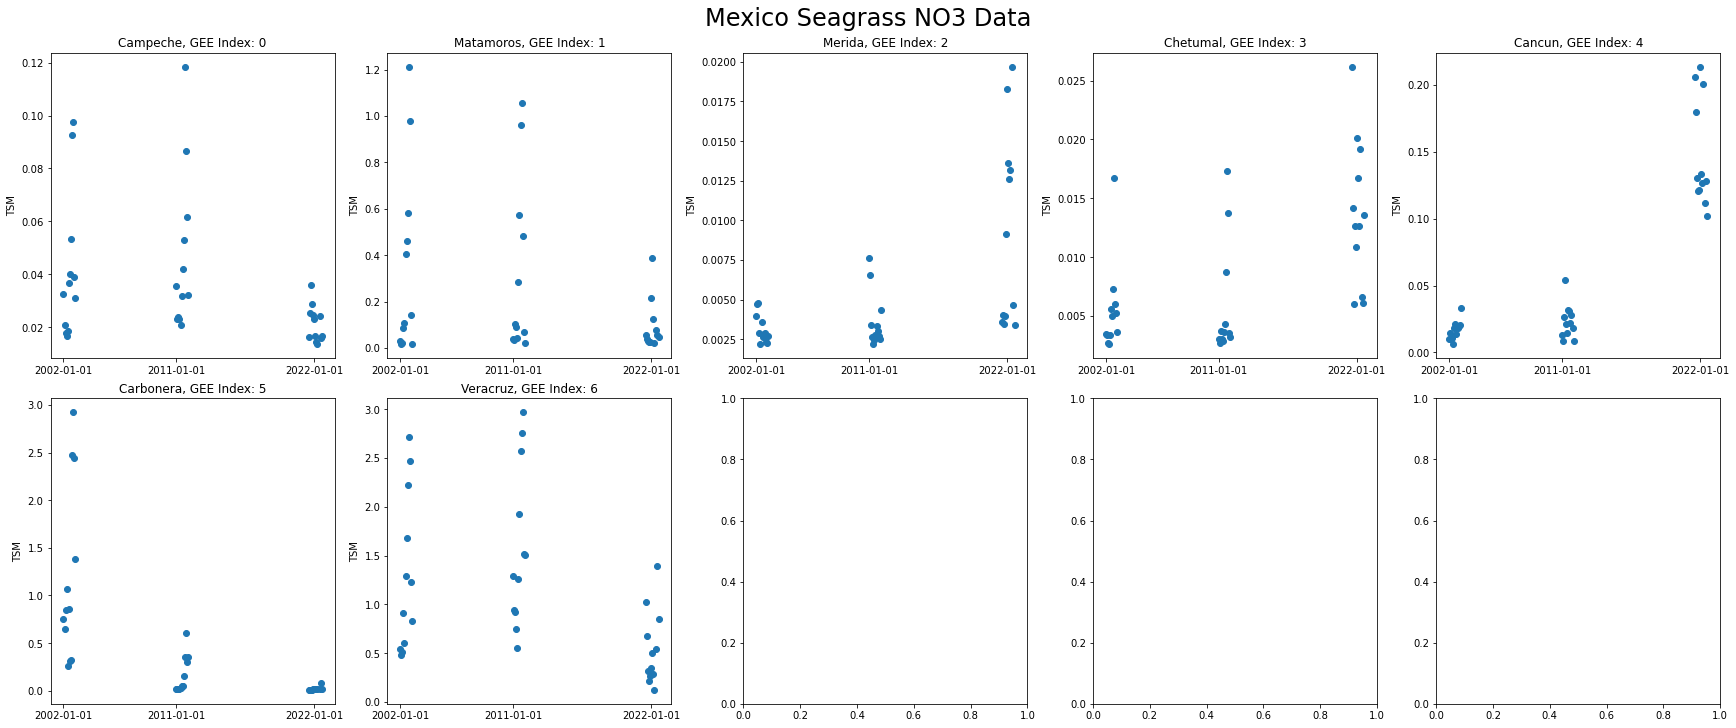

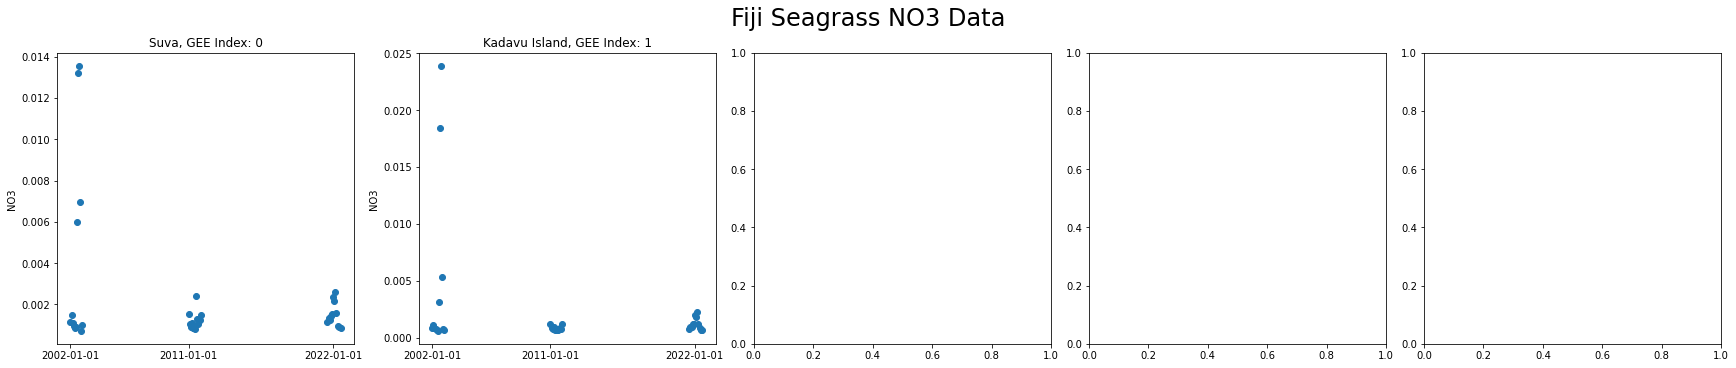

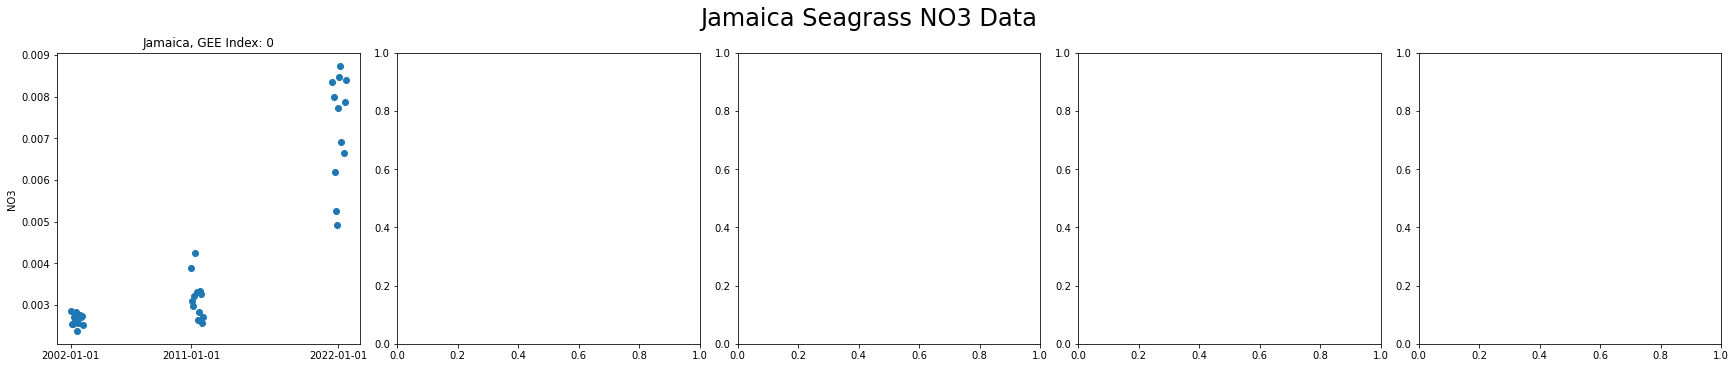

In [159]:
for file in no3_files:
    country_data = pd.read_excel(file)
    iso3 = file[-8:-5]
    num_regions = len(country_data['GEE_index'].unique())
    rows = num_regions // 5 + (num_regions % 5 > 0)
    fig, axs = plt.subplots(rows,5, constrained_layout=True, facecolor='white')
    fig.suptitle(f'{iso3_dict[iso3]} Seagrass NO3 Data', fontsize=24)
    fig.set_figwidth(24)
    fig.set_figheight(5*rows)
    ax1 = 0
    ax2 = -1
    for i in range(num_regions):
        ax2 += 1
        region = country_data[country_data['GEE_index'] == float(i)].sort_values('Date').reset_index()
        x = region['Date']
        y = region['no3']
        region_name = region['Region'].iloc[0]
        if i>0 and i%5 == 0:
            ax1 += 1
            ax2 = 0
        if rows == 1:
            axs[ax2].scatter(x,y)
            axs[ax2].set_title(f'{region_name}, GEE Index: {i}')
            axs[ax2].set_xticks(['2002', '2011', '2022'])
            axs[ax2].set_ylabel('NO3')
        else:
            axs[ax1, ax2].scatter(x,y)
            axs[ax1, ax2].set_title(f'{region_name}, GEE Index: {i}')
            axs[ax1, ax2].set_xticks(['2002', '2011', '2022'])
            axs[ax1, ax2].set_ylabel('TSM')
    plt.savefig(f'{iso3}_NO3_All.png') 
    plt.show()

In [161]:
no3_files_buff = glob.glob('no3*3km.xlsx')
no3_files_buff

['no3_seagrass_GBR_buffer_3km.xlsx',
 'no3_seagrass_JPN_buffer_3km.xlsx',
 'no3_seagrass_KEN_buffer_3km.xlsx',
 'no3_seagrass_NOR_buffer_3km.xlsx',
 'no3_seagrass_CAN_buffer_3km.xlsx',
 'no3_seagrass_IDN_buffer_3km.xlsx']

NO3 max values for countries with 3km buffer on seagrass polygons

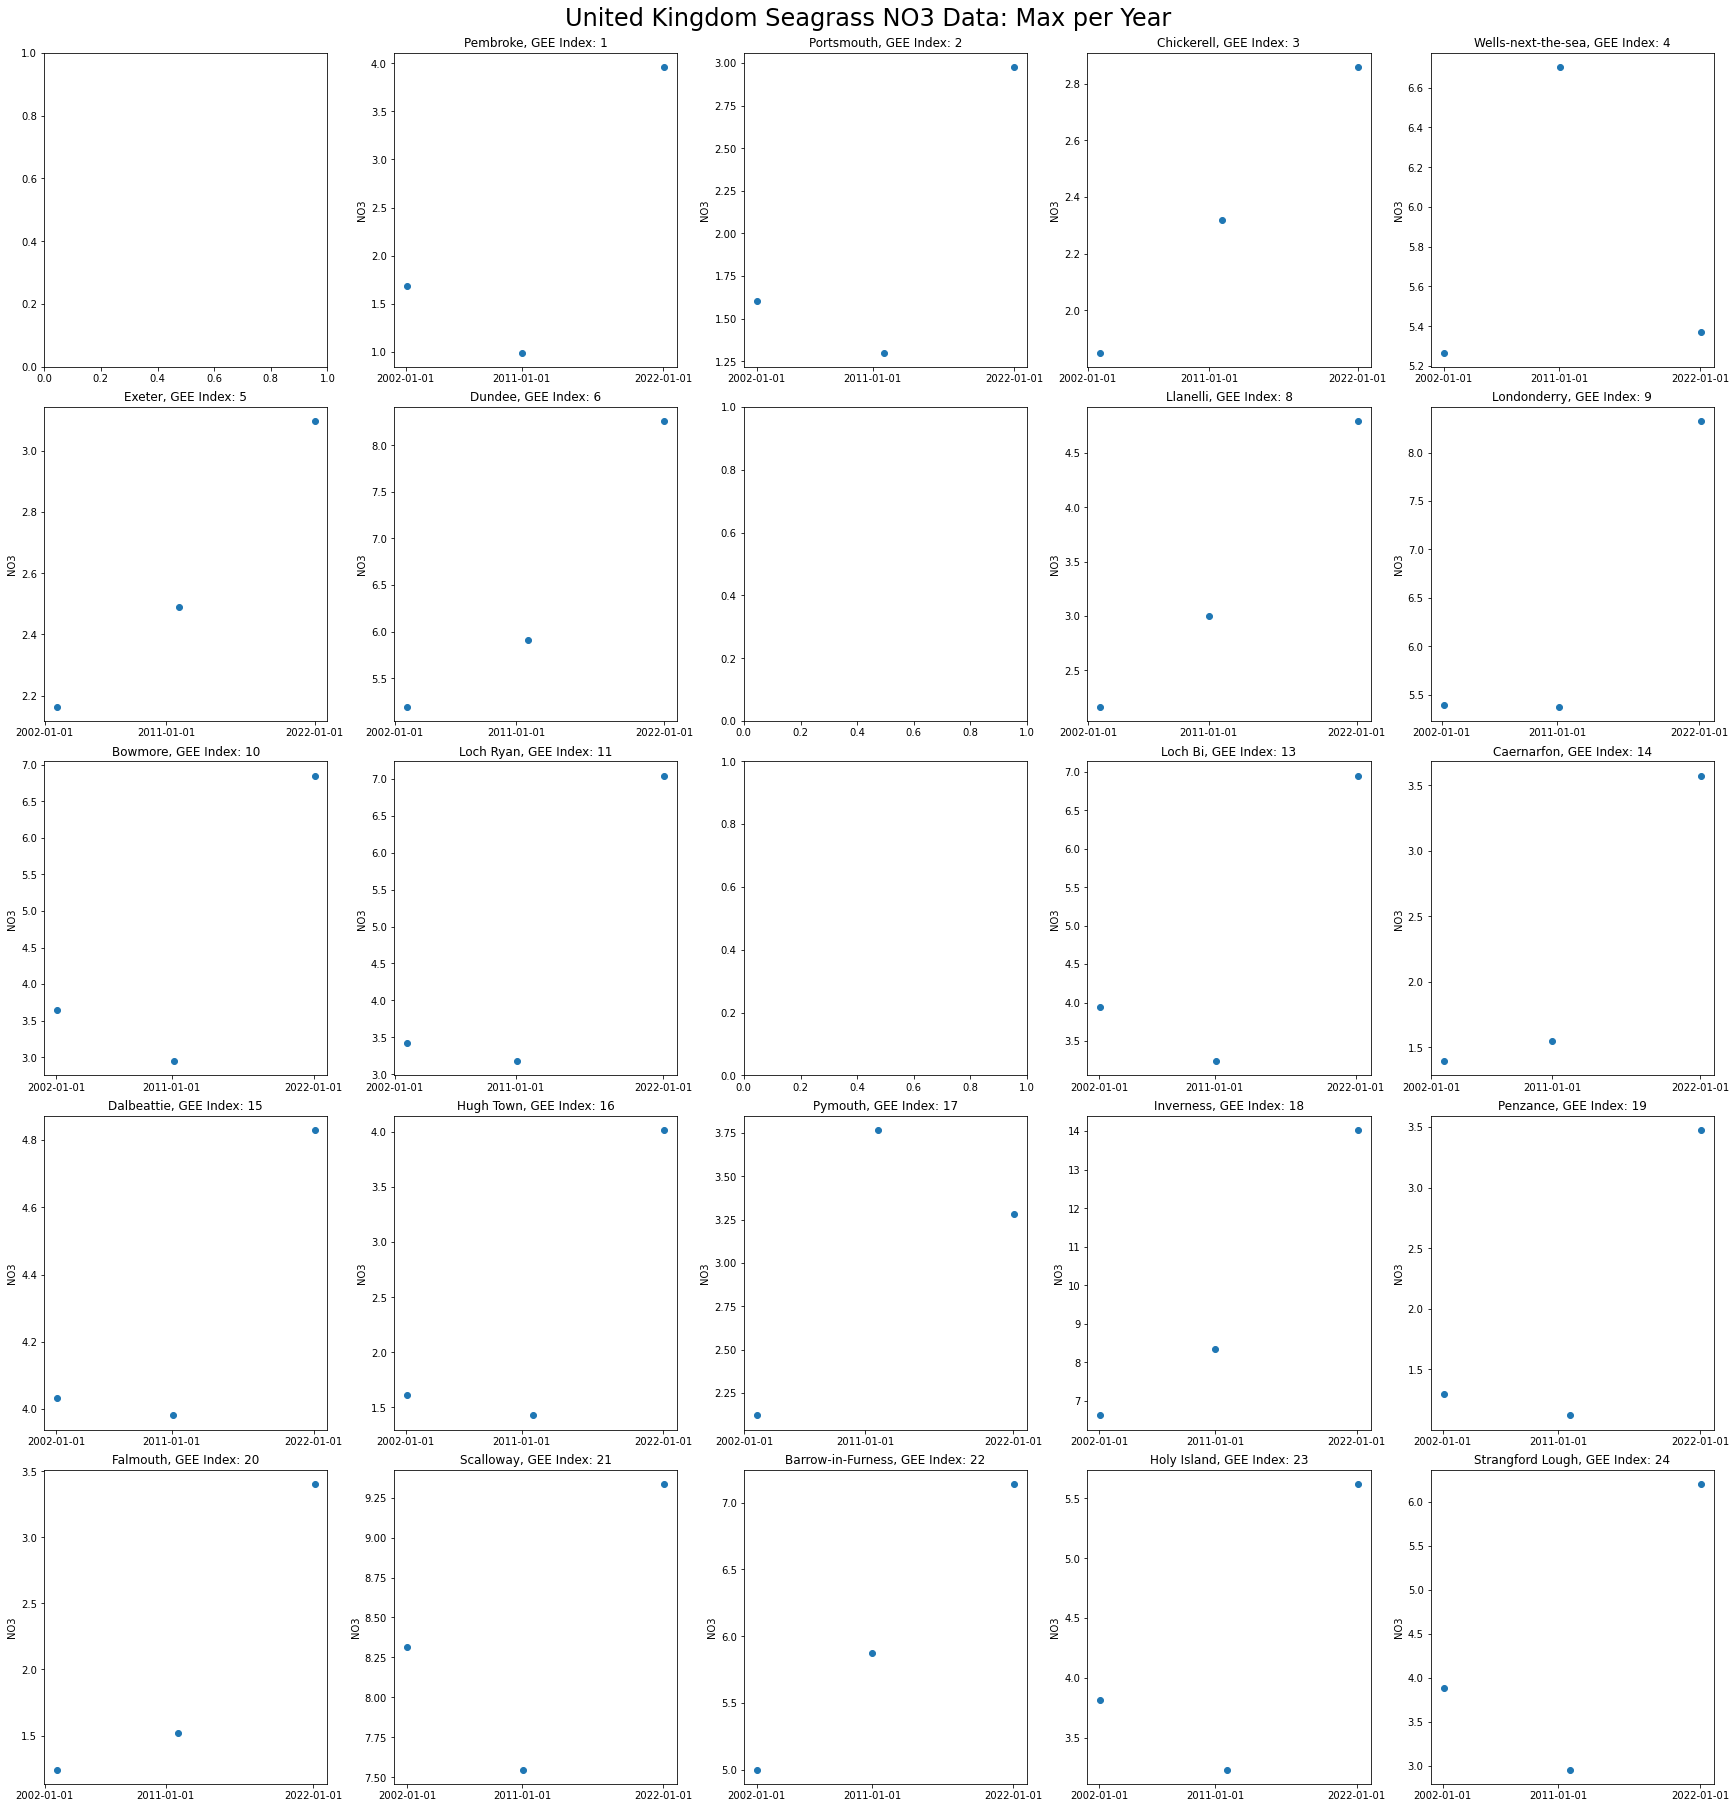

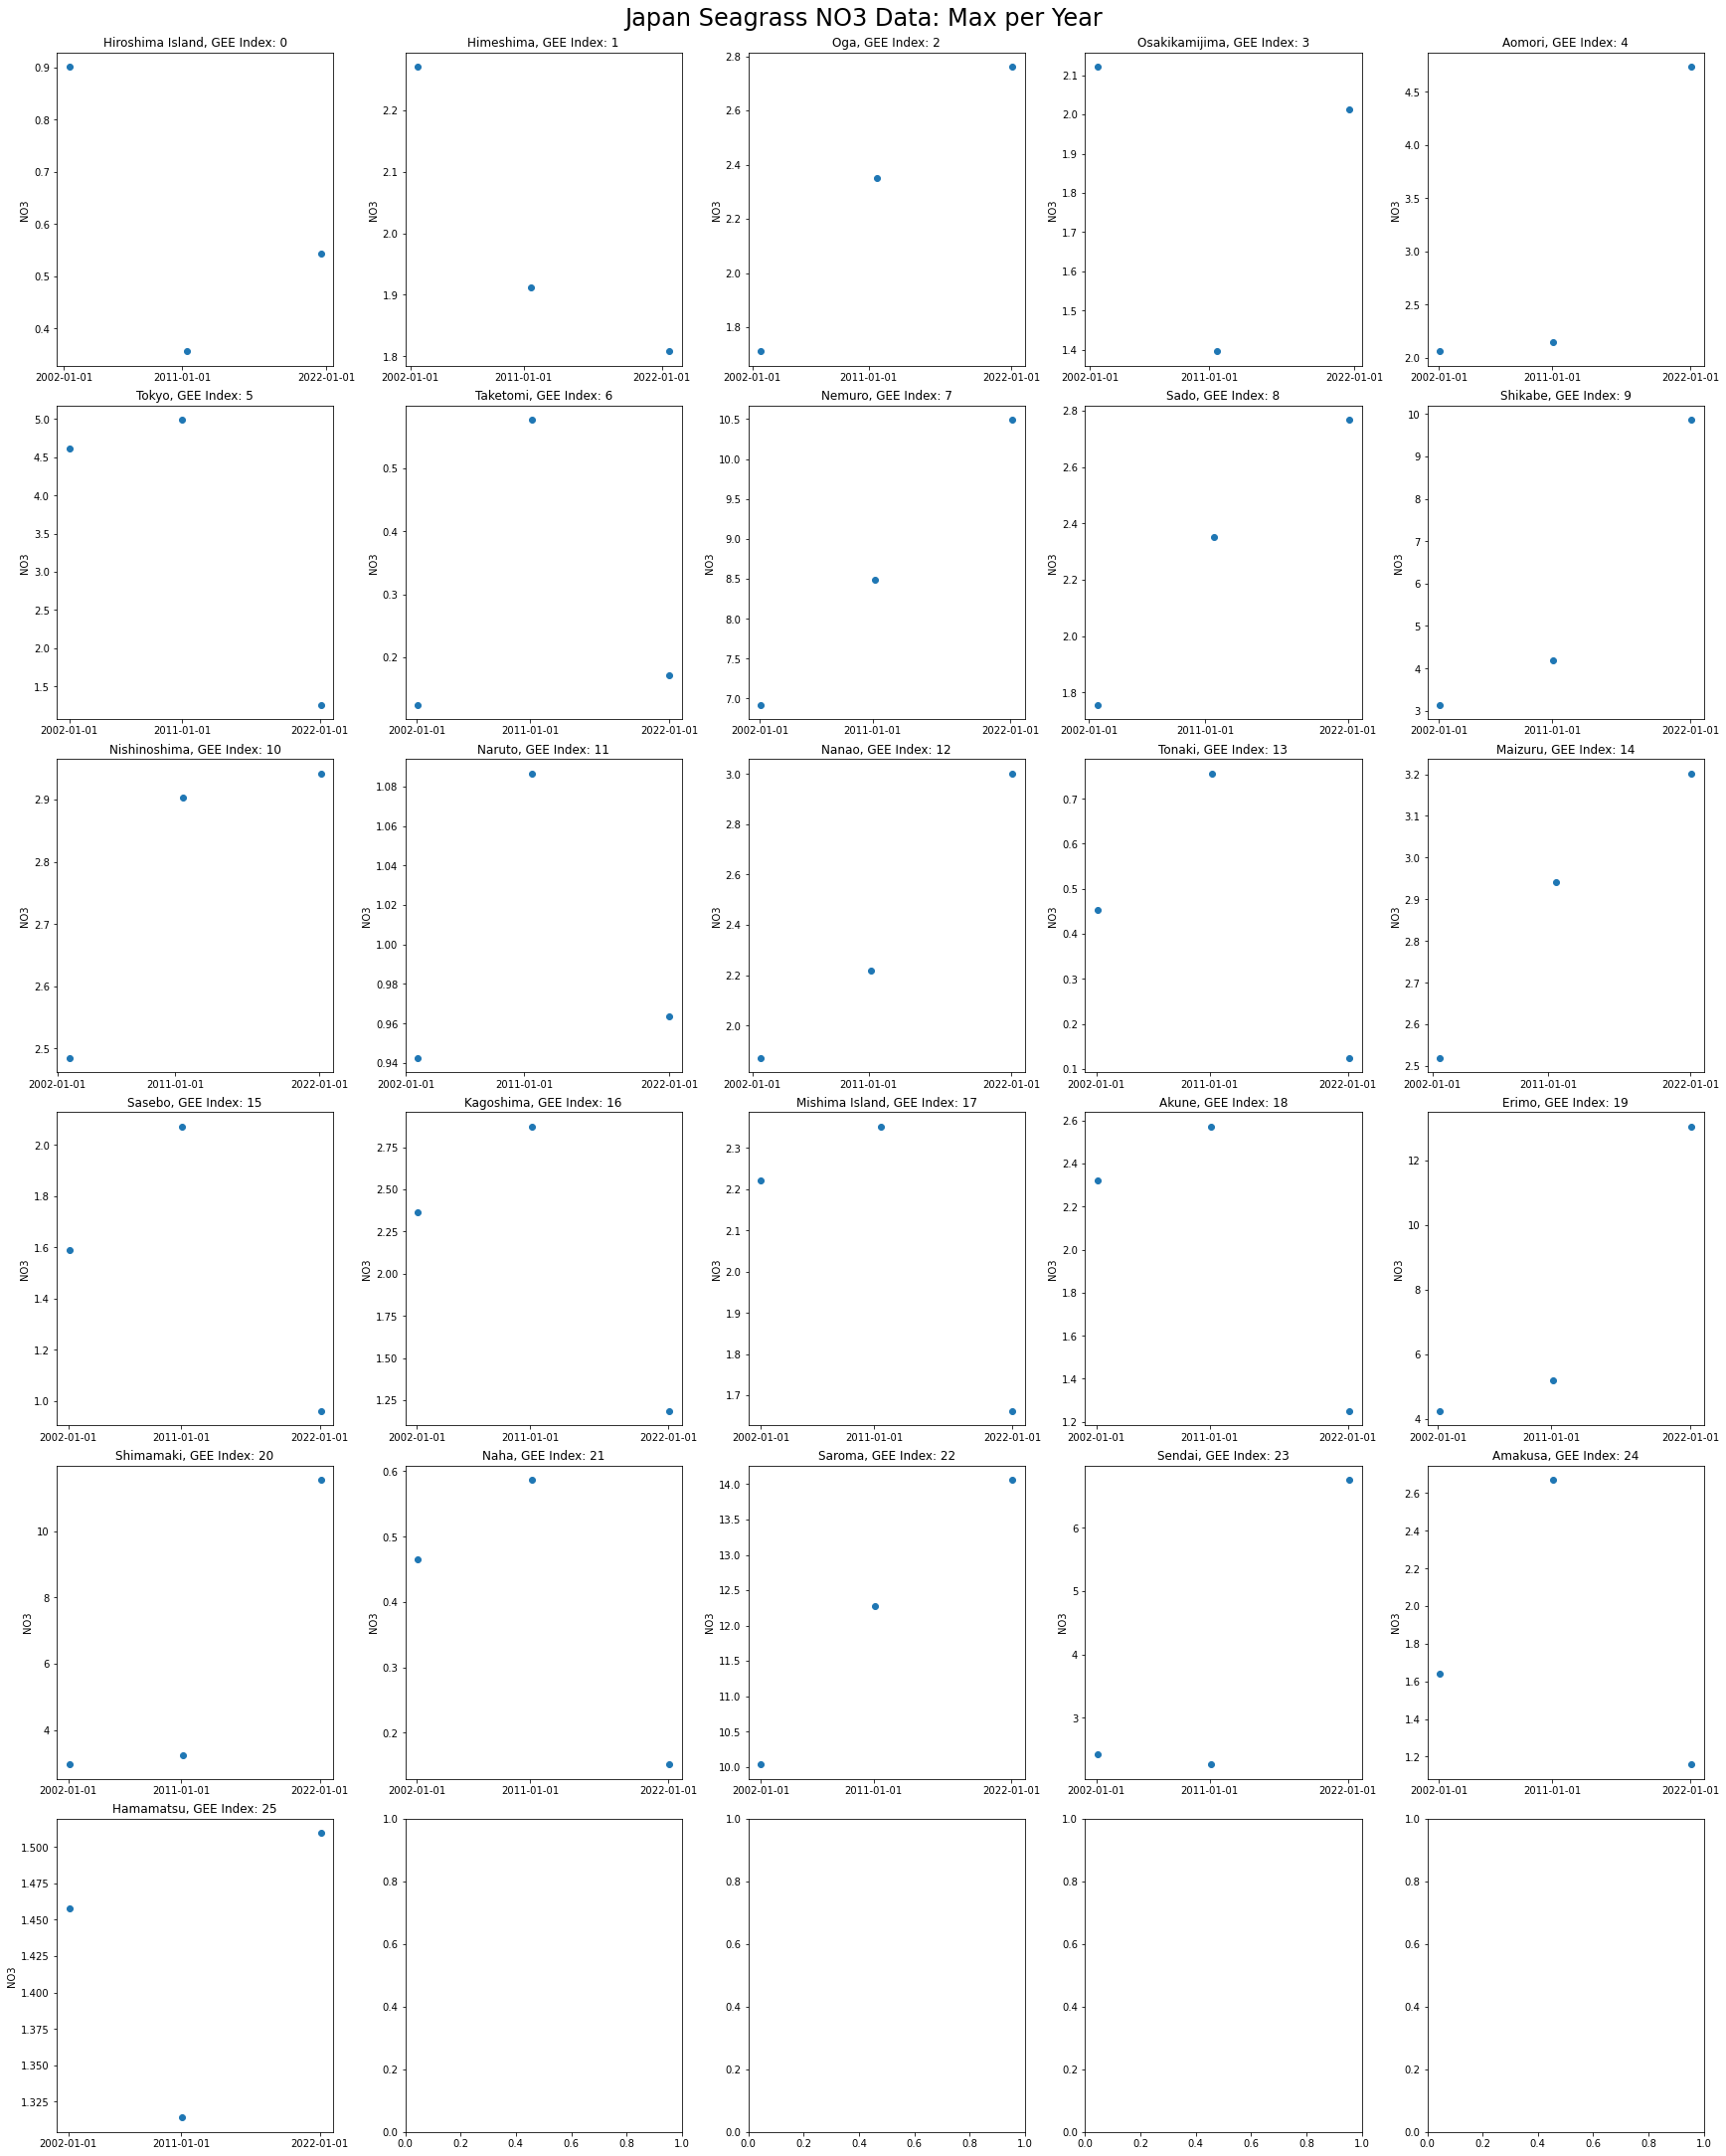

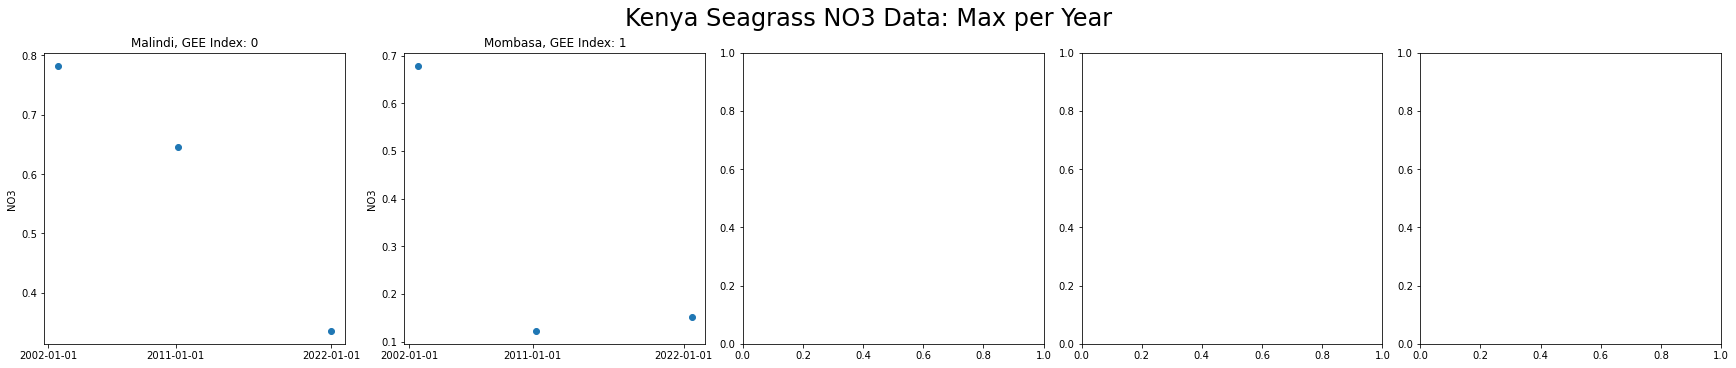

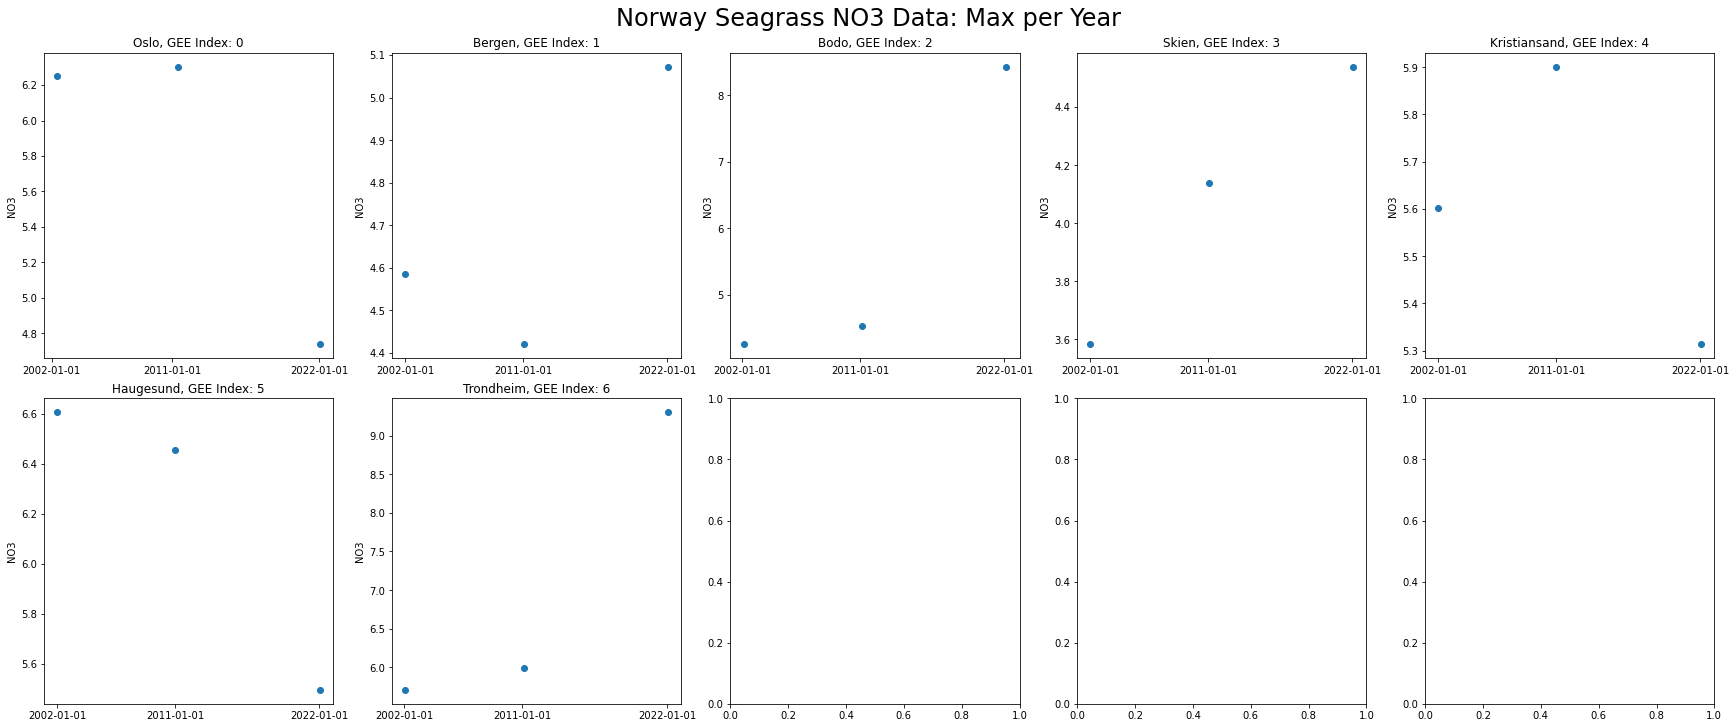

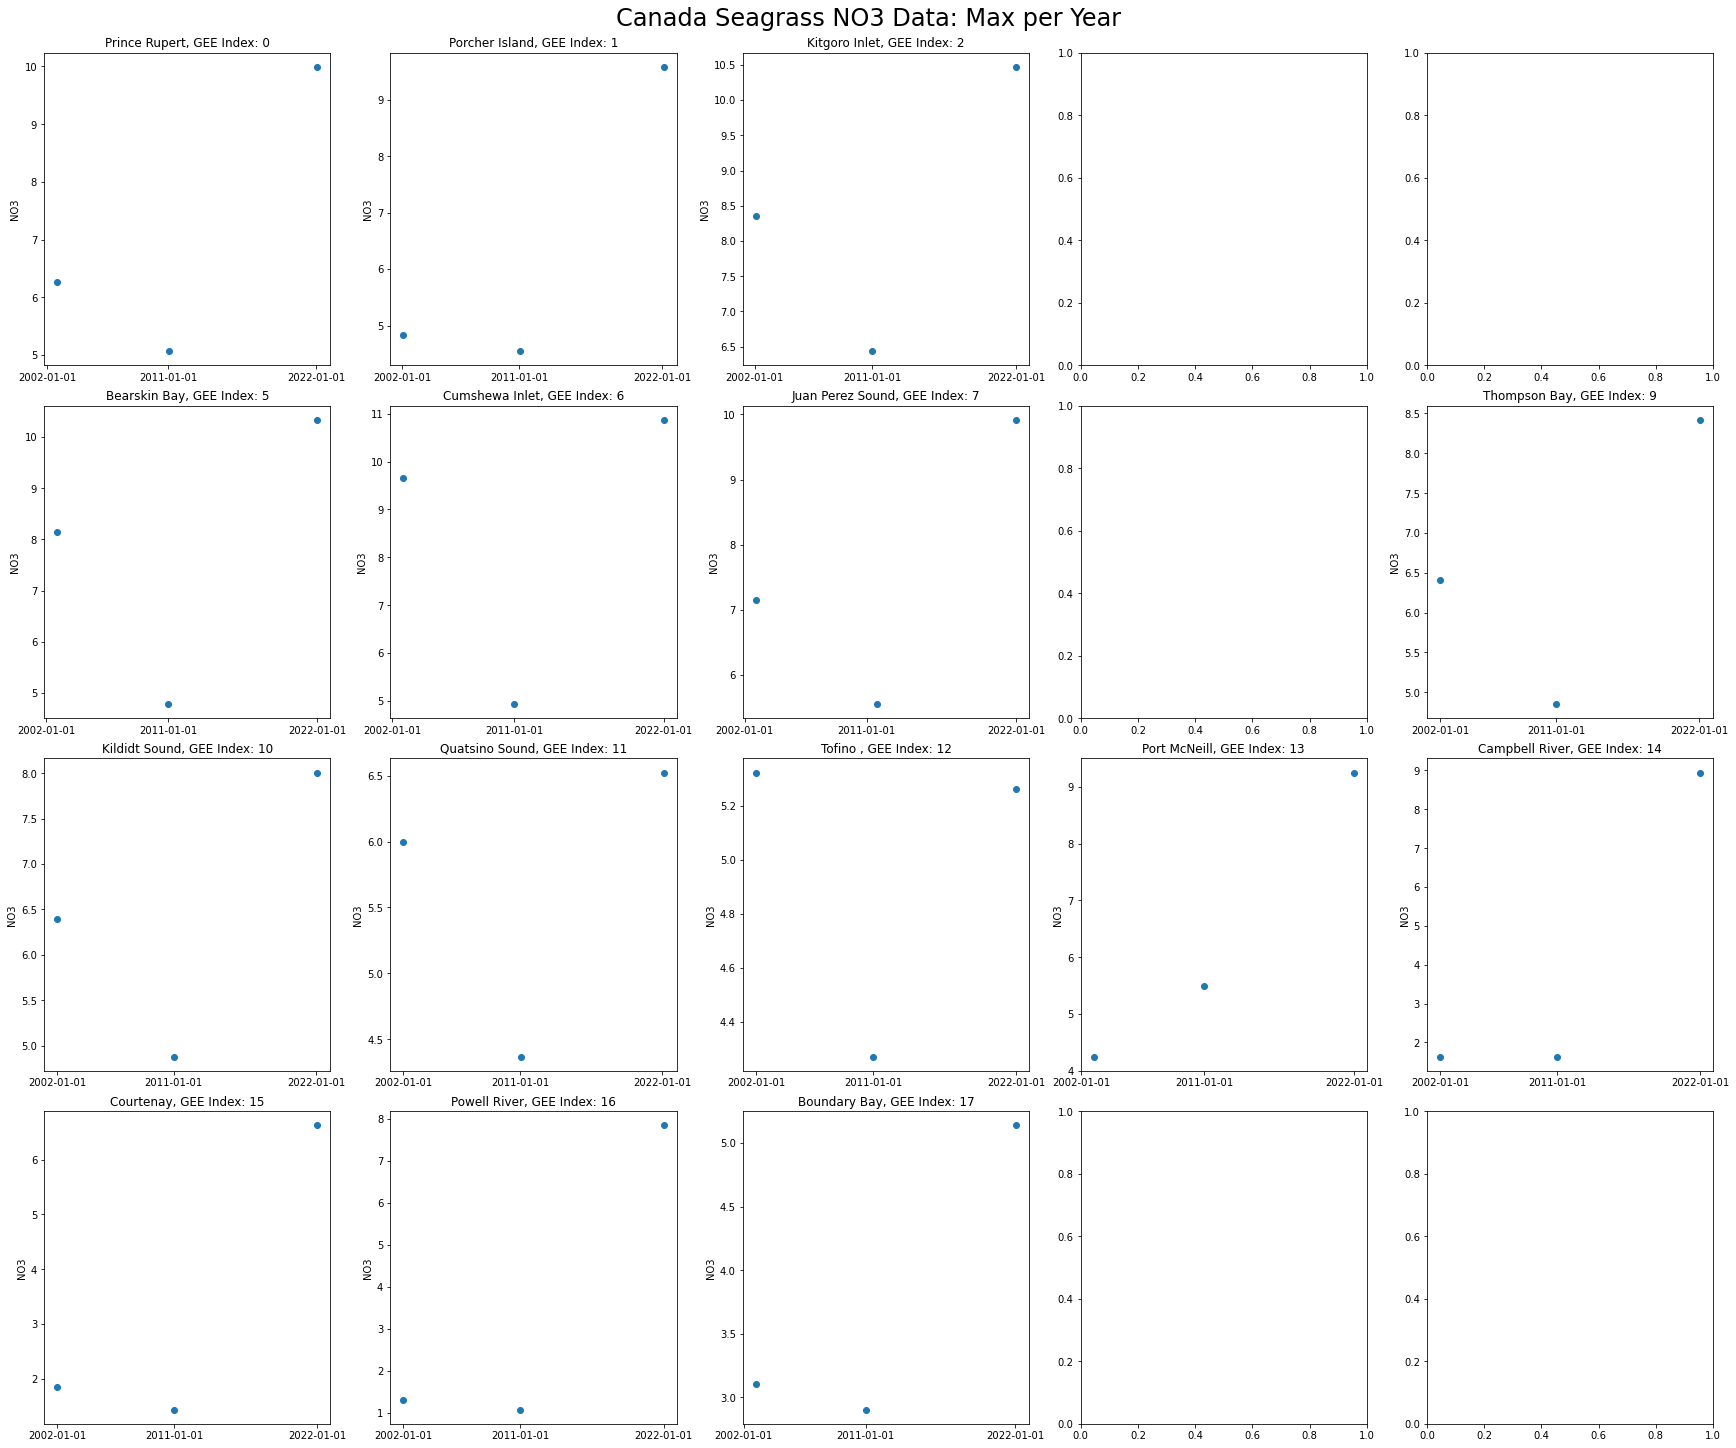

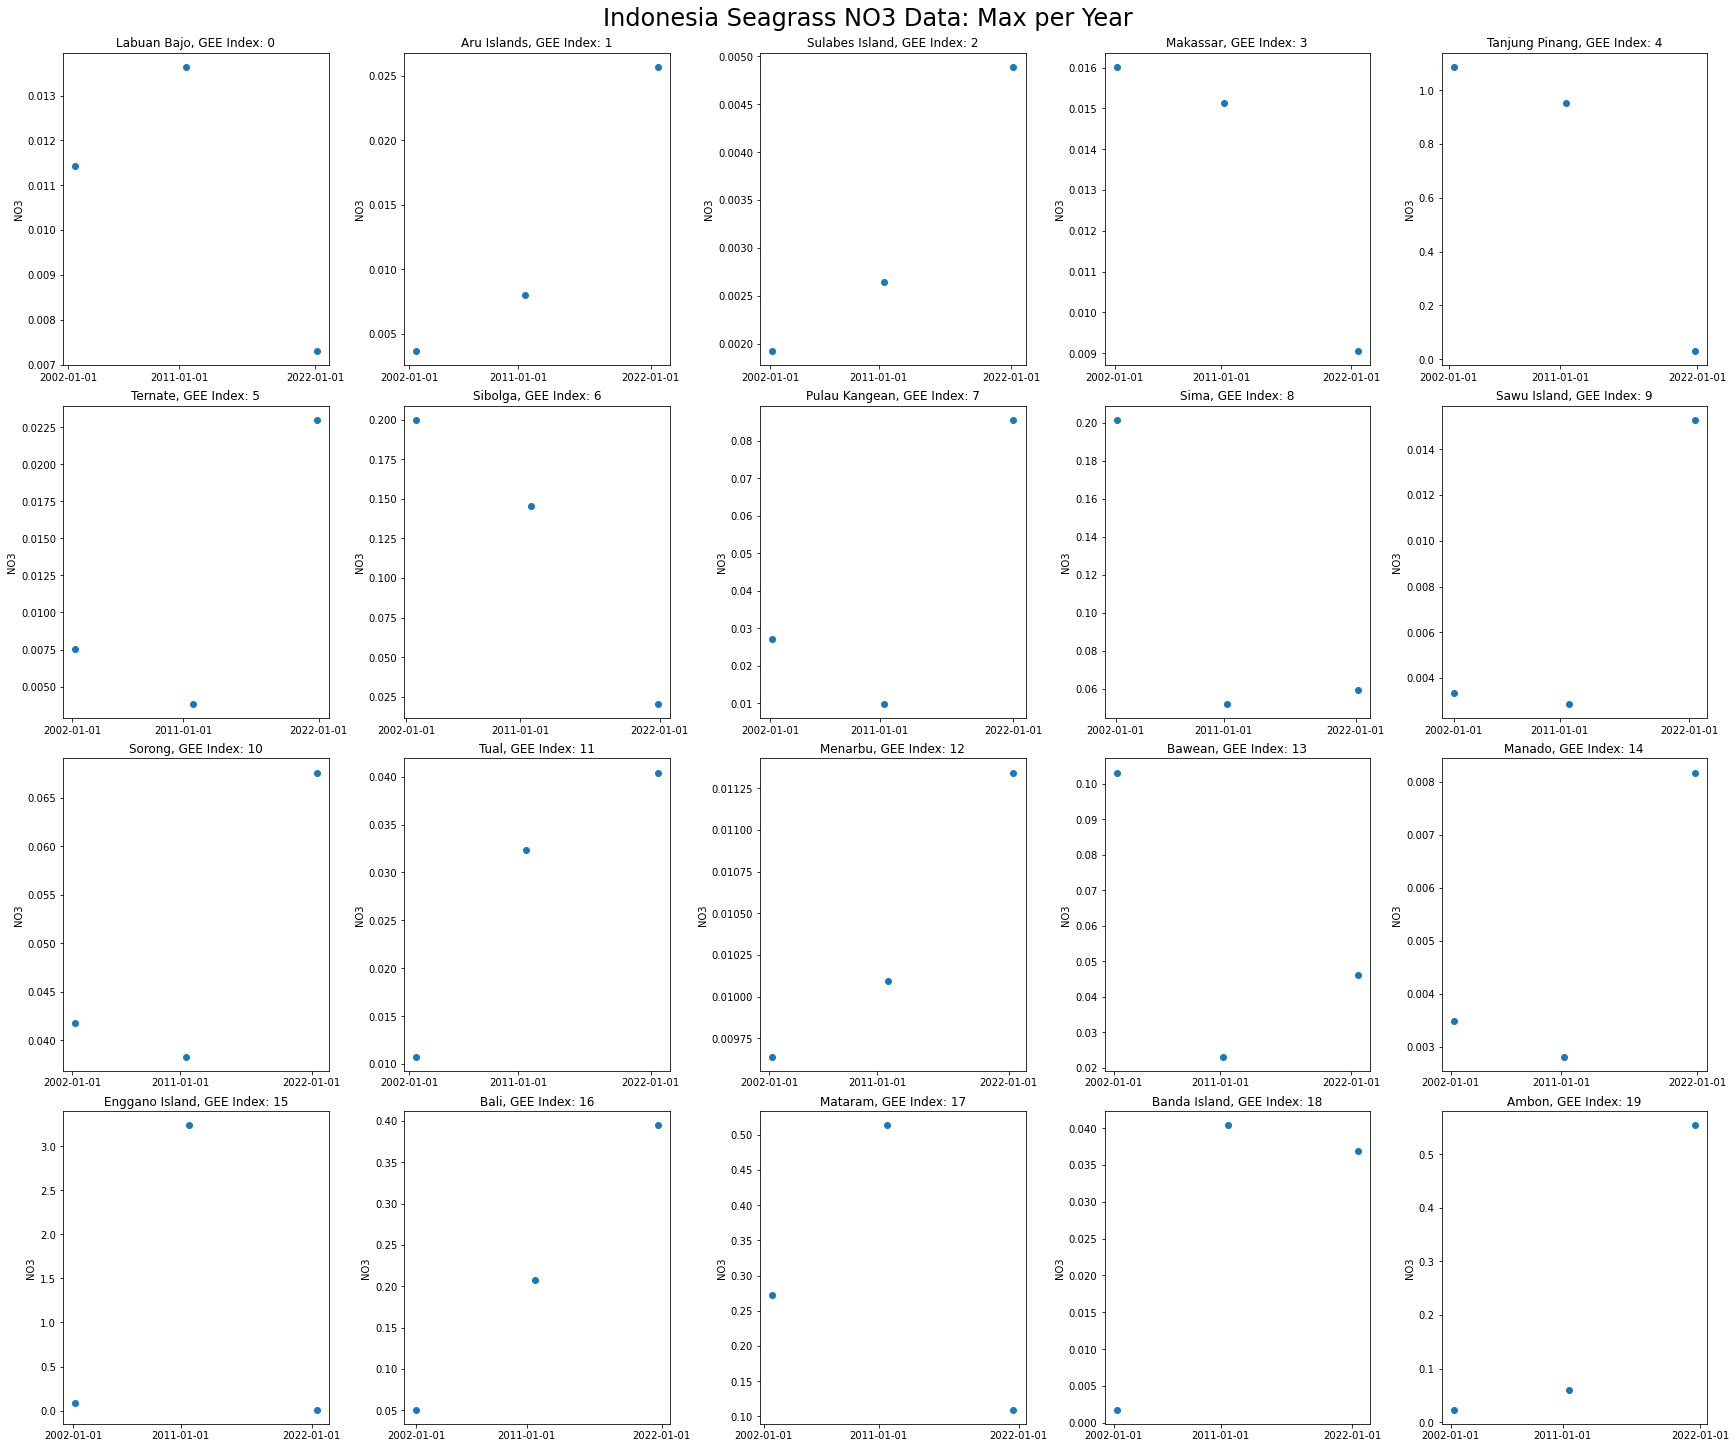

In [166]:
for file in no3_files_buff:
    country_data = pd.read_excel(file)
    iso3 = file[-19:-16]
    num_regions = len(country_data['GEE_index'].unique())
    rows = num_regions // 5 + (num_regions % 5 > 0)
    fig, axs = plt.subplots(rows,5, constrained_layout=True, facecolor='white')
    fig.suptitle(f'{iso3_dict[iso3]} Seagrass NO3 Data: Max per Year', fontsize=24)
    fig.set_figwidth(24)
    fig.set_figheight(5*rows)
    ax1 = 0
    ax2 = -1
    for i in range(num_regions):
        ax2 += 1
        region = country_data[country_data['GEE_index'] == float(i)].sort_values('Date').reset_index()
        x = [region[region['no3'] == region.iloc[:12]['no3'].max()]['Date'], region[region['no3'] == region.iloc[12:24]['no3'].max()]['Date'], region[region['no3'] == region.iloc[24:]['no3'].max()]['Date']]
        y = [region.iloc[:12]['no3'].max(), region.iloc[12:24]['no3'].max(), region.iloc[24:]['no3'].max()]
        region_name = region['Region'].iloc[0]
        if i>0 and i%5 == 0:
            ax1 += 1
            ax2 = 0
        if not np.any(np.isnan(y)):
            if rows == 1:
                axs[ax2].scatter(x,y)
                axs[ax2].set_title(f'{region_name}, GEE Index: {i}')
                axs[ax2].set_xticks(['2002', '2011', '2022'])
                axs[ax2].set_ylabel('NO3')
            else:
                axs[ax1, ax2].scatter(x,y)
                axs[ax1, ax2].set_title(f'{region_name}, GEE Index: {i}')
                axs[ax1, ax2].set_xticks(['2002', '2011', '2022'])
                axs[ax1, ax2].set_ylabel('NO3')
    plt.savefig(f'{iso3}_NO3_Max.png') 
    plt.show()

NO3 all values for countries with 3km buffer on seagrass polygons

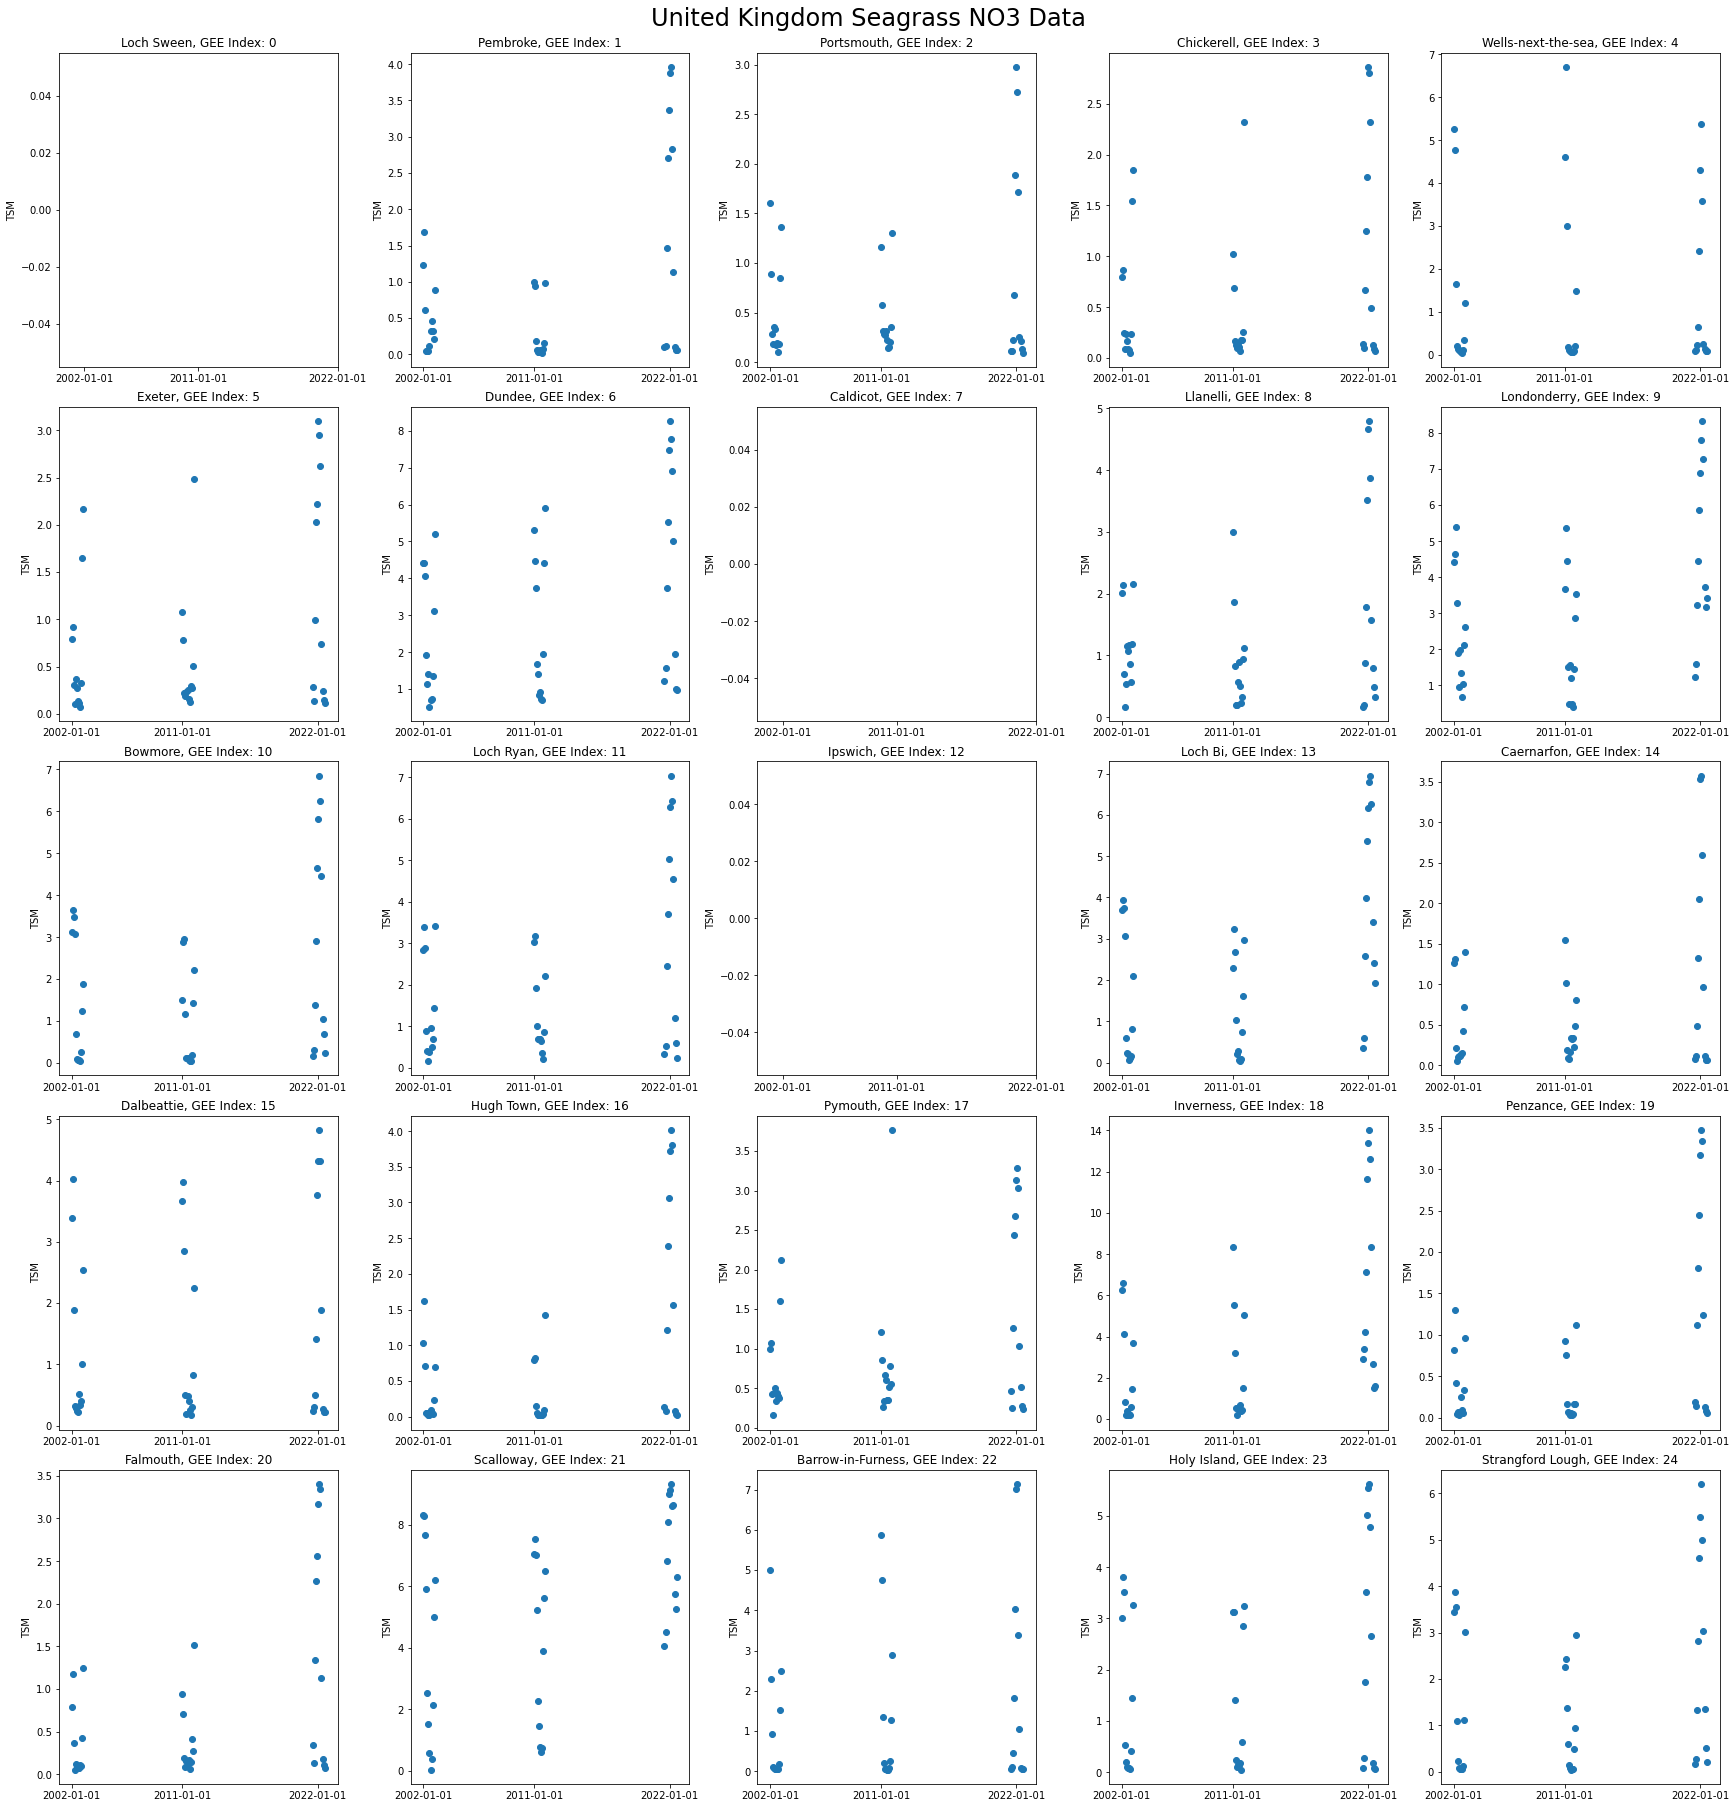

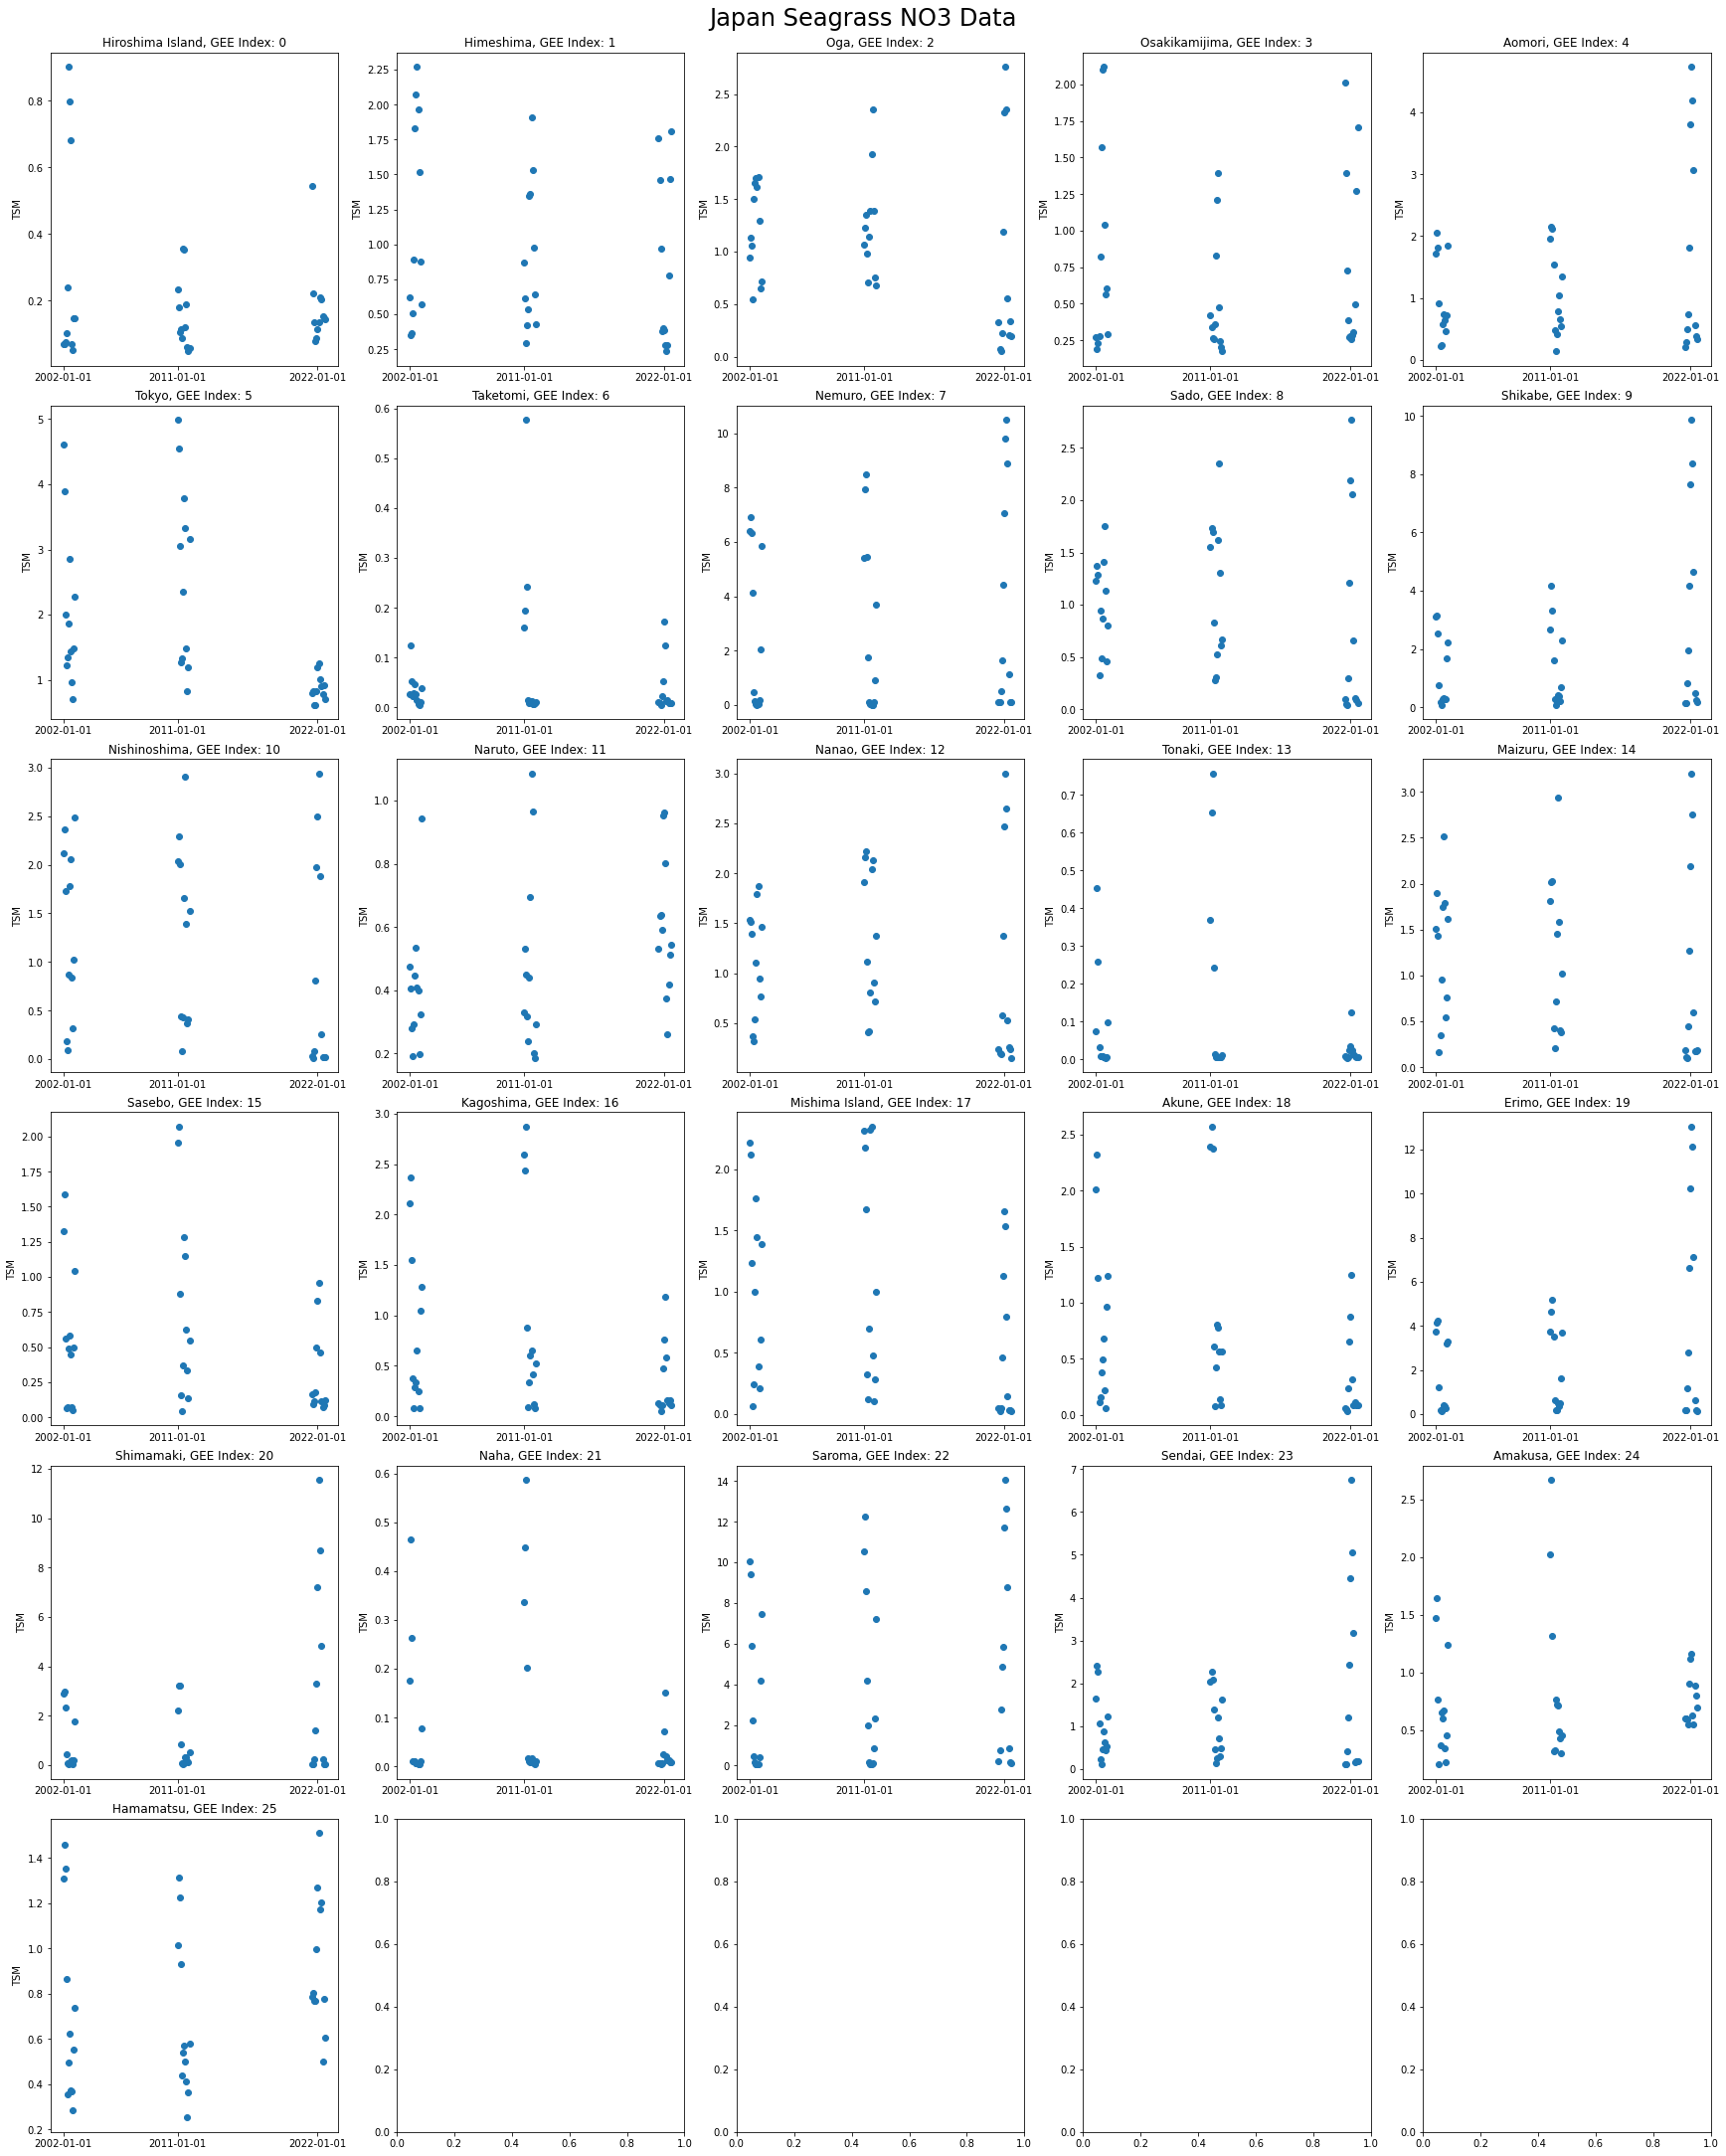

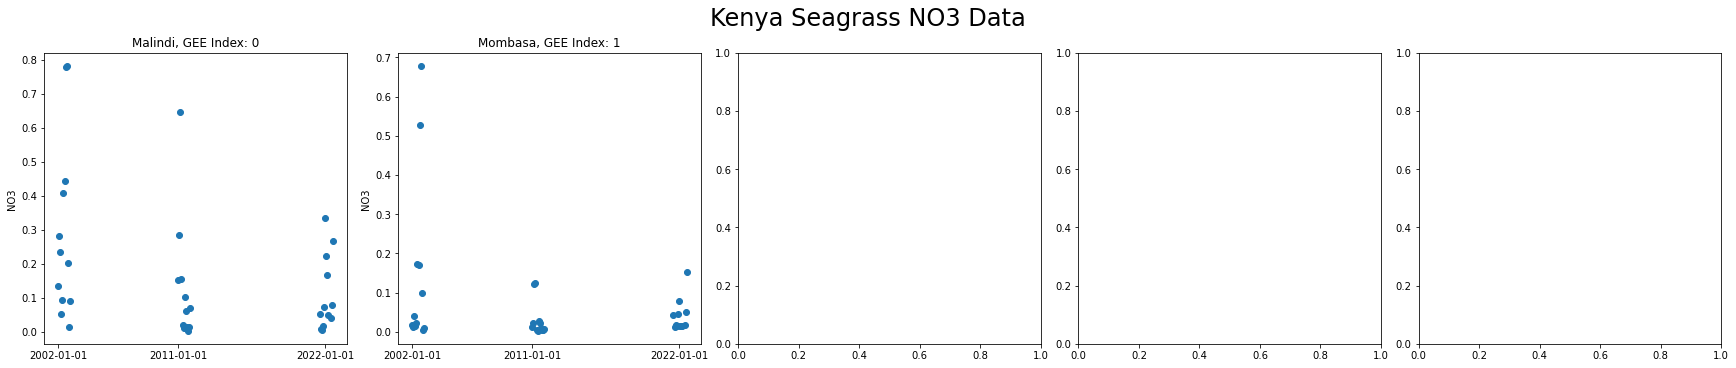

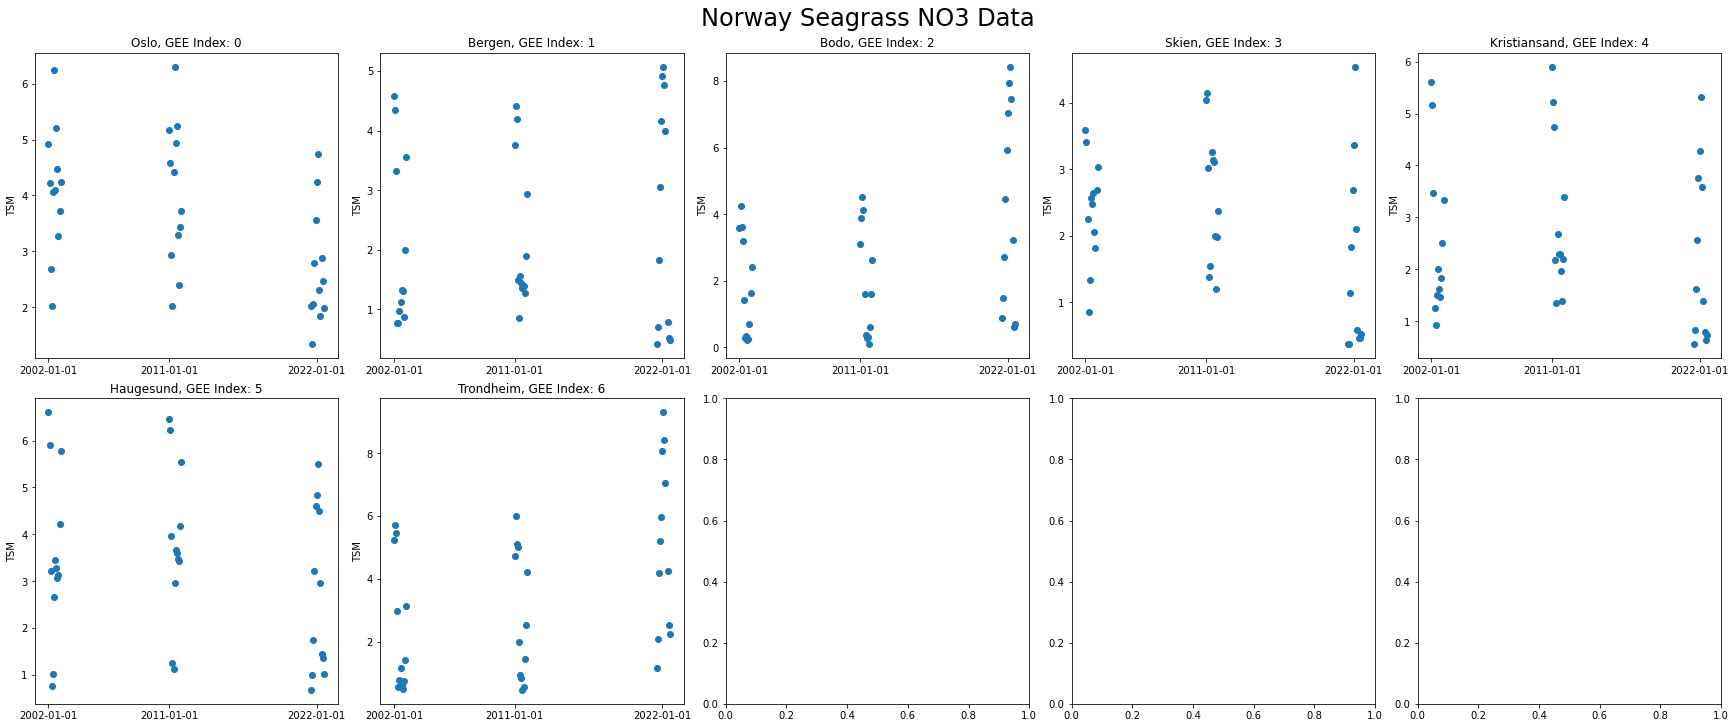

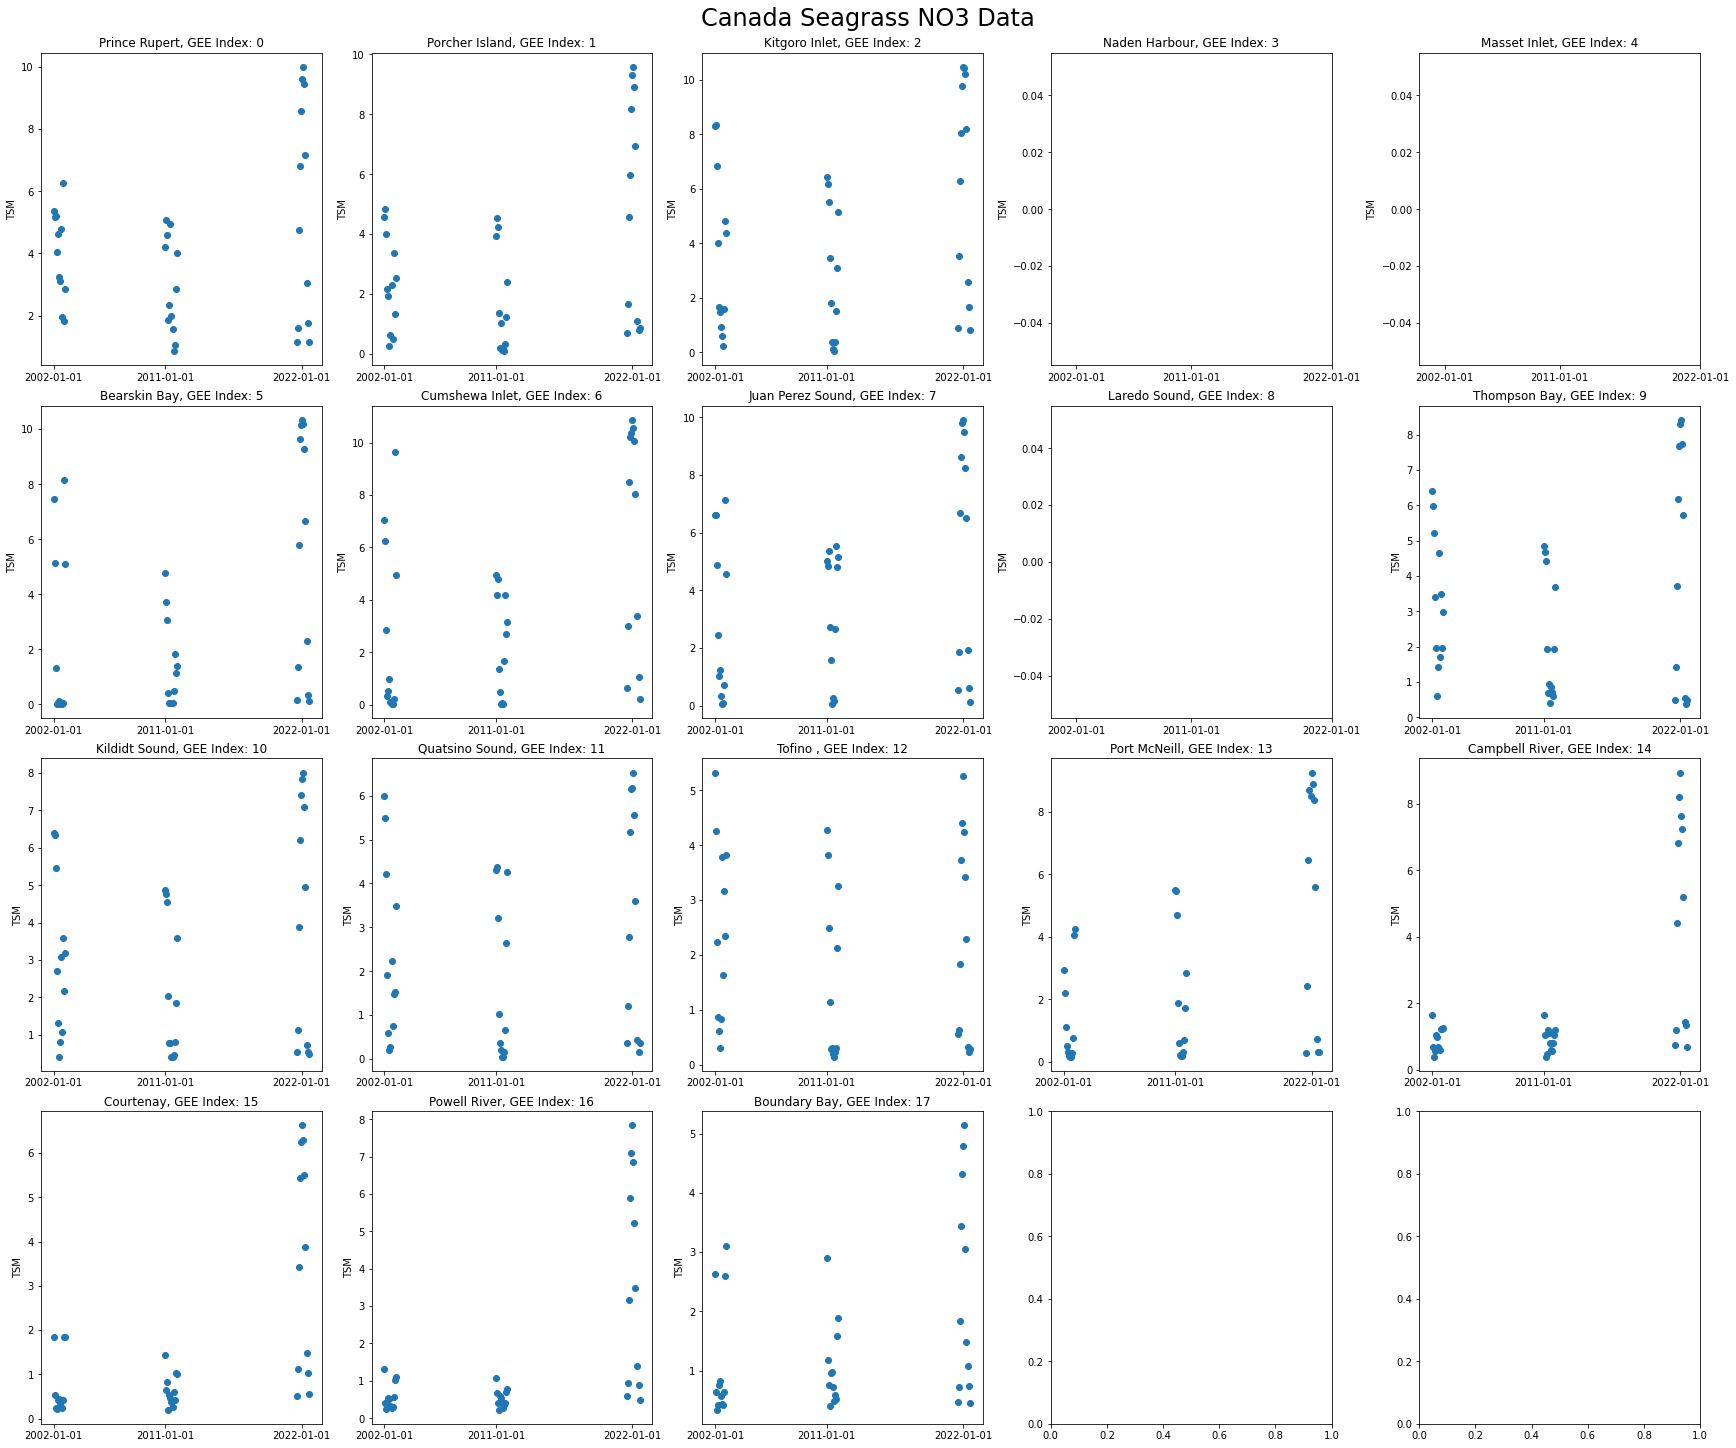

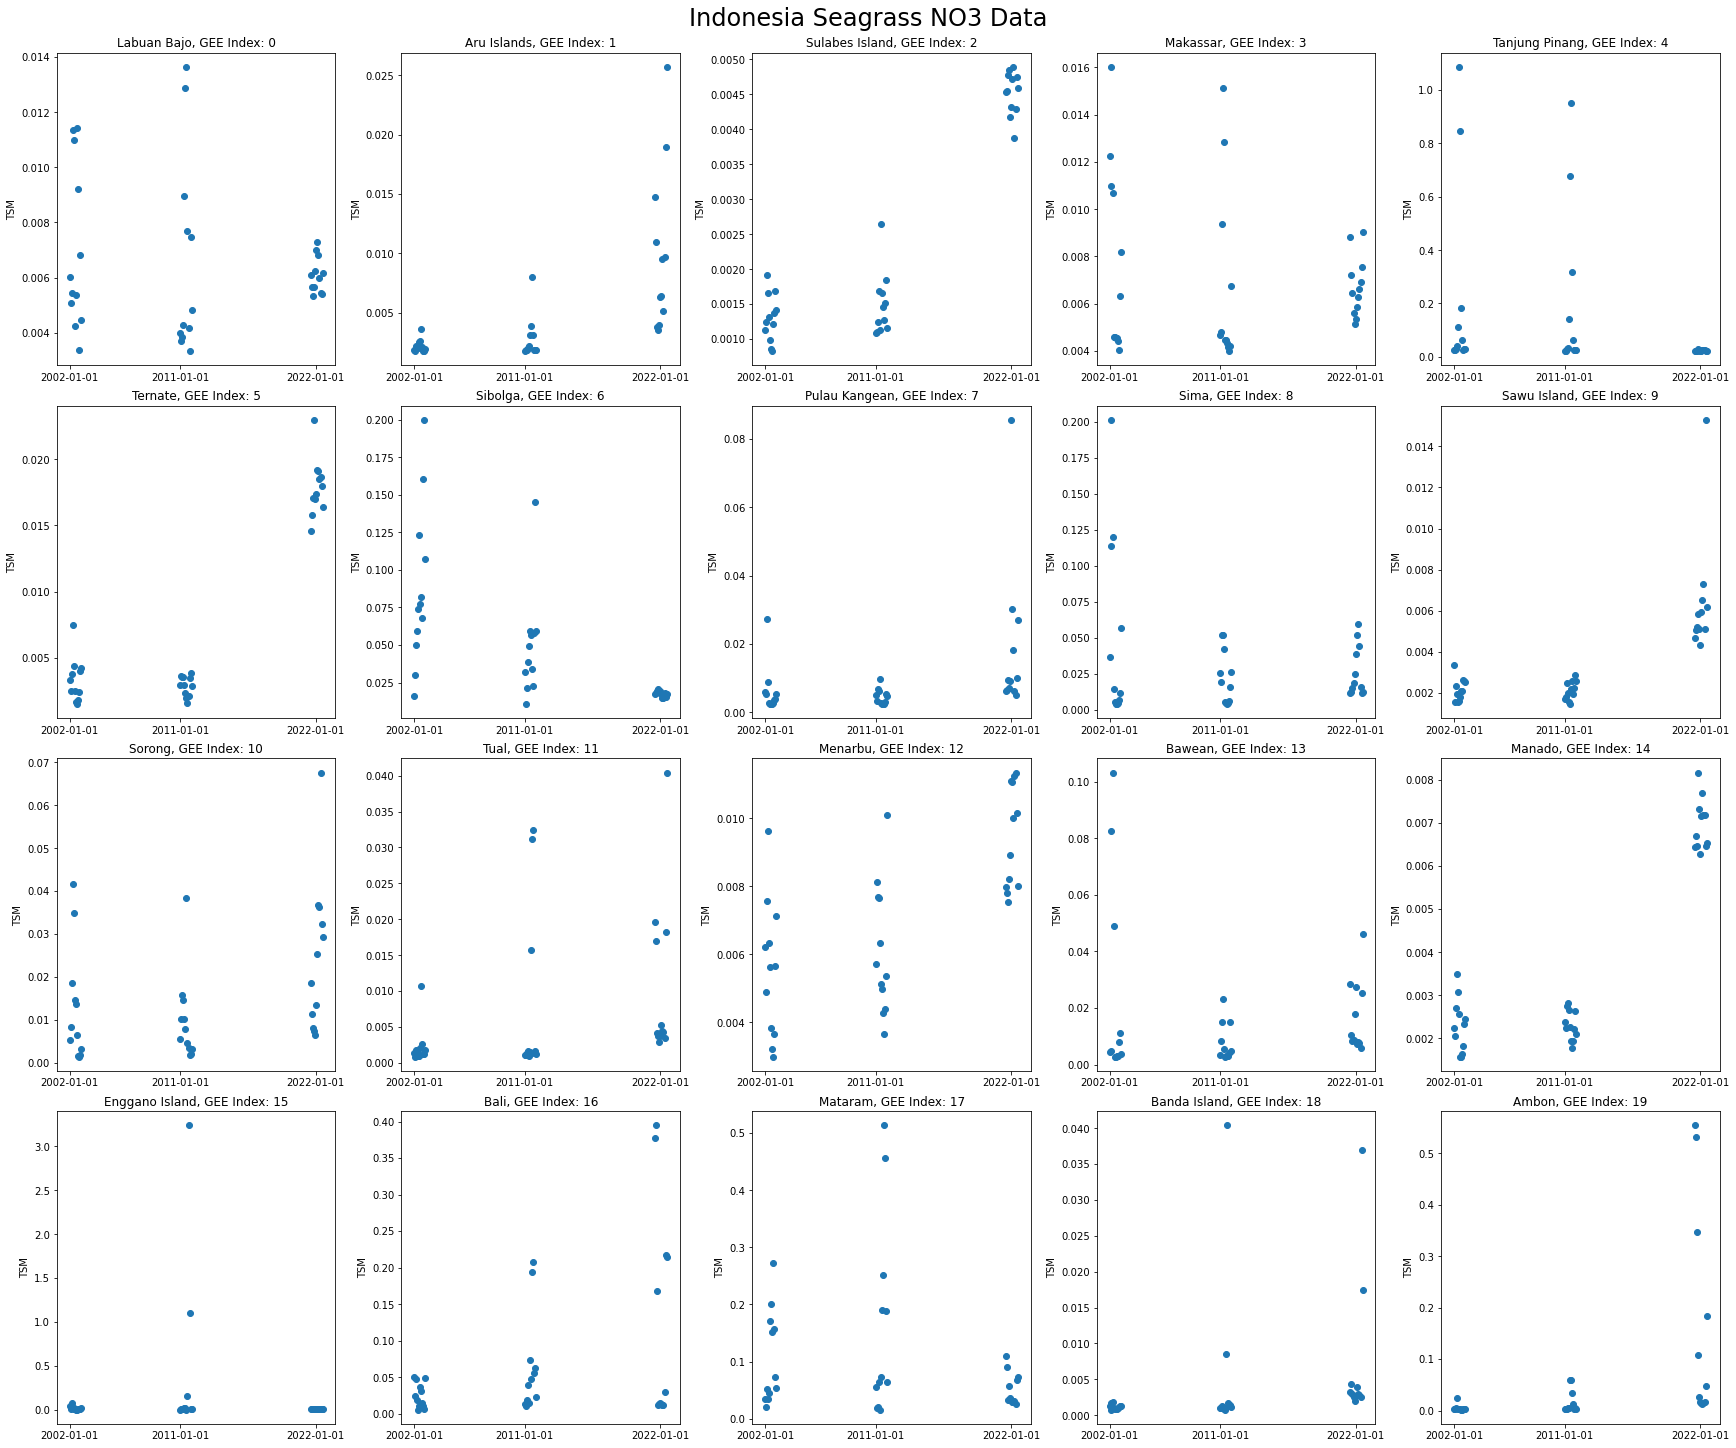

In [168]:
for file in no3_files_buff:
    country_data = pd.read_excel(file)
    iso3 = file[-19:-16]
    num_regions = len(country_data['GEE_index'].unique())
    rows = num_regions // 5 + (num_regions % 5 > 0)
    fig, axs = plt.subplots(rows,5, constrained_layout=True, facecolor='white')
    fig.suptitle(f'{iso3_dict[iso3]} Seagrass NO3 Data', fontsize=24)
    fig.set_figwidth(24)
    fig.set_figheight(5*rows)
    ax1 = 0
    ax2 = -1
    for i in range(num_regions):
        ax2 += 1
        region = country_data[country_data['GEE_index'] == float(i)].sort_values('Date').reset_index()
        x = region['Date']
        y = region['no3']
        region_name = region['Region'].iloc[0]
        if i>0 and i%5 == 0:
            ax1 += 1
            ax2 = 0
        if rows == 1:
            axs[ax2].scatter(x,y)
            axs[ax2].set_title(f'{region_name}, GEE Index: {i}')
            axs[ax2].set_xticks(['2002', '2011', '2022'])
            axs[ax2].set_ylabel('NO3')
        else:
            axs[ax1, ax2].scatter(x,y)
            axs[ax1, ax2].set_title(f'{region_name}, GEE Index: {i}')
            axs[ax1, ax2].set_xticks(['2002', '2011', '2022'])
            axs[ax1, ax2].set_ylabel('TSM')
    plt.savefig(f'{iso3}_NO3_All.png') 
    plt.show()